In [2]:
demograph = pd.read_csv("Downloads/dunnhumby_The-Complete-Journey/CSVfiles/hh_demographic.csv")
transactions = pd.read_csv("Downloads/dunnhumby_The-Complete-Journey/CSVfiles/transaction_data.csv")
products = pd.read_csv("Downloads/dunnhumby_The-Complete-Journey/CSVfiles/product.csv")

In [3]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [4]:
products.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [5]:
#this will be the main data looked at, price and name of product
trans_prod = pd.merge(transactions, products, on = "PRODUCT_ID", how = "left")
trans_prod.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0,2,PRODUCE,National,ONIONS,ONIONS SWEET (BULK&BAG),40 LB
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0,69,PRODUCE,Private,ORGANICS FRUIT & VEGETABLES,ORGANIC CARROTS,1 LB


In [6]:
#splitting the data set, train test and dv
df = trans_prod[trans_prod["WEEK_NO"] <= 78]
dv = trans_prod[(trans_prod["WEEK_NO"] > 78) &(trans_prod["WEEK_NO"] <= 90)]
#builiding validation data set
vdf = trans_prod[(trans_prod["WEEK_NO"] > 12) &(trans_prod["WEEK_NO"] <= 90)]
vdv = trans_prod[(trans_prod["WEEK_NO"] > 90)]

In [7]:
vdf.to_csv('oot_data_x.csv')
vdv.to_csv('oot_data_y.csv')
vdf.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
106789,1510,27950497988,83,935959,1,1.00,414,-0.29,52,13,0.0,0.0,103,GROCERY,National,SOFT DRINKS,SFT DRNK SNGL SRV BTL CARB (EX,20 OZ
106790,1510,27950497988,83,937330,1,3.00,414,-0.99,52,13,0.0,0.0,1225,GROCERY,National,CAT FOOD,DRY CAT FOOD (CAT CHOW/FRISKIE,3.15 LB
106791,1510,27950497988,83,8293732,1,0.69,414,0.00,52,13,0.0,0.0,857,DRUG GM,National,CANDY - PACKAGED,CANDY BARS (SINGLES)(INCLUDING,2.17 OZ
109312,196,27950967204,83,822524,1,1.39,346,-0.90,27,13,0.0,0.0,69,GROCERY,Private,SEAFOOD - SHELF STABLE,TUNA,12 OZ
109313,196,27950967204,83,835604,1,4.99,346,-1.80,27,13,0.0,0.0,1156,DRUG GM,National,SHAVING CARE PRODUCTS,RAZORS AND BLADES,


In [8]:
len(trans_prod["household_key"].unique())

2500

In [9]:
df = pd.get_dummies(df, columns = ["DEPARTMENT"])
dv_dummies = pd.get_dummies(dv, columns= ["DEPARTMENT"])
df.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,DEPARTMENT_PRODUCE,DEPARTMENT_RESTAURANT,DEPARTMENT_RX,DEPARTMENT_SALAD BAR,DEPARTMENT_SEAFOOD,DEPARTMENT_SEAFOOD-PCKGD,DEPARTMENT_SPIRITS,DEPARTMENT_TOYS,DEPARTMENT_TRAVEL & LEISUR,DEPARTMENT_VIDEO RENTAL
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,...,True,False,False,False,False,False,False,False,False,False
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,...,True,False,False,False,False,False,False,False,False,False
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,...,True,False,False,False,False,False,False,False,False,False
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,...,True,False,False,False,False,False,False,False,False,False
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,...,True,False,False,False,False,False,False,False,False,False


In [10]:
dv.shape

(337412, 18)

In [11]:
dv_dummies.shape

(337412, 49)

In [12]:
dv_hh = dv_dummies.groupby('household_key',as_index = False).agg(DEPARTMENT_NUTRITION = ("DEPARTMENT_NUTRITION", "sum"))

dv_hh["DEPARTMENT_NUTRITION"].sum()

4279

In [13]:
dv_hh["DEPARTMENT_NUTRITION"] = np.where(dv_hh["DEPARTMENT_NUTRITION"]>=1, 1, 0)
dv_hh.shape

(2312, 2)

In [14]:
dv_hh["DEPARTMENT_NUTRITION"].sum()

775

In [15]:
demograph.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [16]:
#checking to see all exisiting null values
demograph.isna().sum()

AGE_DESC               0
MARITAL_STATUS_CODE    0
INCOME_DESC            0
HOMEOWNER_DESC         0
HH_COMP_DESC           0
HOUSEHOLD_SIZE_DESC    0
KID_CATEGORY_DESC      0
household_key          0
dtype: int64

In [17]:
demograph['KID_CATEGORY_DESC'].unique()

array(['None/Unknown', '1', '2', '3+'], dtype=object)

In [18]:
#derived variables in demographics
#fixing age
demograph["AVG_AGE"] = np.where(demograph['AGE_DESC'] == "19-24", (19+24)/2,
                    np.where(demograph['AGE_DESC'] == "25-34", (25+34)/2,
                    np.where(demograph['AGE_DESC'] == "35-44", (35+44)/2,
                    np.where(demograph['AGE_DESC'] == "45-54", (45+54)/2,
                    np.where(demograph['AGE_DESC'] == "55-64", (55+64)/2, 
                    np.where(demograph['AGE_DESC'] == "65+", 65, demograph['AGE_DESC']))))))
age_mean = demograph["AVG_AGE"].mean()
demograph["AVG_AGE"] = demograph["AVG_AGE"].astype(int)
#fixing marital code
demograph["MARITAL_STATUS_CODE"] = np.where(demograph['MARITAL_STATUS_CODE'] == "A", 2,
                                            np.where(demograph["MARITAL_STATUS_CODE"] == "B", 1, 0))
#fixing income desc
demograph["AVG_INC_K"] = np.where(demograph['INCOME_DESC'] == "35-49K", (35+49)/2,
                    np.where(demograph['INCOME_DESC'] == '50-74K', (50+74)/2,
                    np.where(demograph['INCOME_DESC'] == '25-34K', (25+34)/2,
                    np.where(demograph['INCOME_DESC'] == '75-99K', (75+99)/2,
                    np.where(demograph['INCOME_DESC'] == 'Under 15K', 15, 
                    np.where(demograph['INCOME_DESC'] == '100-124K', (100+124)/2,
                    np.where(demograph['INCOME_DESC'] == '15-24K', (15+24)/2,
                    np.where(demograph['INCOME_DESC'] == '125-149K', (125+149)/2,
                    np.where(demograph['INCOME_DESC'] == '150-174K', (150+174)/2,
                    np.where(demograph['INCOME_DESC'] == '250K+', 250, 
                    np.where(demograph['INCOME_DESC'] == '175-199K', (175+199)/2,
                    np.where(demograph['INCOME_DESC'] == '200-249K', (200+249)/2, demograph['AGE_DESC']))))))))))))
income_mean = demograph["AVG_INC_K"].mean()
demograph["AVG_INC_K"] = demograph["AVG_INC_K"].astype(int)

#fixing description, 1 represent single male, 2 represent single female
demograph["HH_COMP_DESC"]  = np.where(demograph["HH_COMP_DESC"] == "Single Female",2,
                                            np.where(demograph["HH_COMP_DESC"] == "Single Male", 1, 0))

#fixing household size
demograph["HOUSEHOLD_SIZE_DESC"] = np.where(demograph["HOUSEHOLD_SIZE_DESC"] == "5+",5, demograph["HOUSEHOLD_SIZE_DESC"])
demograph["HOUSEHOLD_SIZE_DESC"] = demograph["HOUSEHOLD_SIZE_DESC"].astype(int)
hh_size_mean = int(demograph["HOUSEHOLD_SIZE_DESC"].mean())

#fixing kids size
demograph["KID_CATEGORY_DESC"] = np.where(demograph["KID_CATEGORY_DESC"] == "3+",3, demograph["KID_CATEGORY_DESC"])
demograph["KID_CATEGORY_DESC"] = np.where(demograph["KID_CATEGORY_DESC"] == "None/Unknown",0, demograph["KID_CATEGORY_DESC"])
demograph["KID_CATEGORY_DESC"] = demograph["KID_CATEGORY_DESC"].astype(int)
hh_kids_mean = int(demograph["KID_CATEGORY_DESC"].mean())

#fixing homeowner desc
demograph = pd.get_dummies(demograph, columns = ["HOMEOWNER_DESC"])
demograph.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key,AVG_AGE,AVG_INC_K,HOMEOWNER_DESC_Homeowner,HOMEOWNER_DESC_Probable Owner,HOMEOWNER_DESC_Probable Renter,HOMEOWNER_DESC_Renter,HOMEOWNER_DESC_Unknown
0,65+,2,35-49K,0,2,0,1,65,42,True,False,False,False,False
1,45-54,2,50-74K,0,2,0,7,49,62,True,False,False,False,False
2,25-34,0,25-34K,0,3,1,8,29,29,False,False,False,False,True
3,25-34,0,75-99K,0,4,2,13,29,87,True,False,False,False,False
4,45-54,1,50-74K,2,1,0,16,49,62,True,False,False,False,False


In [19]:
demograph["ADULTS_PER_HH"] = demograph["HOUSEHOLD_SIZE_DESC"]-demograph["KID_CATEGORY_DESC"]
demograph["AVG_INC_PER_ADULT_IN_K"] = demograph['AVG_INC_K']/demograph["ADULTS_PER_HH"]
demograph["AVG_INC_PER_ADULT_IN_K"] = demograph["AVG_INC_PER_ADULT_IN_K"].astype(int)
avg_inc_per_adult_mean = demograph["AVG_INC_PER_ADULT_IN_K"].mean()
demograph = demograph[['household_key', 'AVG_AGE', 'AVG_INC_K','MARITAL_STATUS_CODE', 'HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC','KID_CATEGORY_DESC', 'AVG_INC_PER_ADULT_IN_K','ADULTS_PER_HH', 'HOMEOWNER_DESC_Homeowner','HOMEOWNER_DESC_Probable Owner', 'HOMEOWNER_DESC_Probable Renter', 'HOMEOWNER_DESC_Renter']]
demograph.head()

,household_key,AVG_AGE,AVG_INC_K,MARITAL_STATUS_CODE,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,AVG_INC_PER_ADULT_IN_K,ADULTS_PER_HH,HOMEOWNER_DESC_Homeowner,HOMEOWNER_DESC_Probable Owner,HOMEOWNER_DESC_Probable Renter,HOMEOWNER_DESC_Renter
0,1,65,42,2,0,2,0,21,2,True,False,False,False
1,7,49,62,2,0,2,0,31,2,True,False,False,False
2,8,29,29,0,0,3,1,14,2,False,False,False,False
3,13,29,87,0,0,4,2,43,2,True,False,False,False
4,16,49,62,1,2,1,0,62,1,True,False,False,False


In [20]:
trans_prod[trans_prod["household_key"] == 1][["household_key", "BASKET_ID", "DAY"]].drop_duplicates()

,household_key,BASKET_ID,DAY
46996,1,27601281299,51
71711,1,27774192959,67
123815,1,28024266849,88
140773,1,28106322445,94
172266,1,28235481967,101
...,...,...,...
2514844,1,42030901169,691
2532004,1,42076695221,695
2532010,1,42076695251,695
2539682,1,42097600916,697


In [21]:
df.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,DEPARTMENT_PRODUCE,DEPARTMENT_RESTAURANT,DEPARTMENT_RX,DEPARTMENT_SALAD BAR,DEPARTMENT_SEAFOOD,DEPARTMENT_SEAFOOD-PCKGD,DEPARTMENT_SPIRITS,DEPARTMENT_TOYS,DEPARTMENT_TRAVEL & LEISUR,DEPARTMENT_VIDEO RENTAL
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,...,True,False,False,False,False,False,False,False,False,False
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,...,True,False,False,False,False,False,False,False,False,False
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,...,True,False,False,False,False,False,False,False,False,False
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,...,True,False,False,False,False,False,False,False,False,False
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,...,True,False,False,False,False,False,False,False,False,False


In [22]:
household_weekly = df.groupby(['household_key','WEEK_NO','DAY', 'BASKET_ID'], as_index = False).agg(SALES_VALUE = ('SALES_VALUE', 'sum'),RETAIL_DISC = ('RETAIL_DISC', 'sum'),COUPON_DISC = ('COUPON_DISC', 'sum'),Coupons = ('COUPON_DISC', 'count'))
hhfreq = household_weekly.groupby(["household_key"], as_index = False).agg(DAY_max = ('DAY','max'),DAY_min = ('DAY','min'),DAY_count = ('BASKET_ID','count'))
hhfreq['frequency'] = round((hhfreq['DAY_max'] - hhfreq['DAY_min'])/hhfreq['DAY_count'],1)
avg_weekly_visit = hhfreq['frequency'].mean()
hhfreq["RECENCY"] = hhfreq["DAY_max"].max() - hhfreq["DAY_max"]
hhfreq.head()

,household_key,DAY_max,DAY_min,DAY_count,frequency,RECENCY
0,1,540,51,63,7.8,4
1,2,542,103,37,11.9,2
2,3,532,113,42,10.0,12
3,4,496,104,26,15.1,48
4,5,542,85,33,13.8,2


In [23]:
df['PRICE_PAID'] = df["SALES_VALUE"] + df["COUPON_DISC"]
df['TOTAL_SHELF_PRICE'] = df["SALES_VALUE"]-(df["RETAIL_DISC"]+df["COUPON_DISC"])
df['SHELF_PRICE_PQ'] = np.where(df["QUANTITY"] > 0,(df["SALES_VALUE"]-(df["RETAIL_DISC"]+df["COUPON_DISC"]))/df["QUANTITY"],0)
df[['SALES_VALUE', 'SHELF_PRICE_PQ', 'TOTAL_SHELF_PRICE','PRICE_PAID', 'QUANTITY']].head()

,SALES_VALUE,SHELF_PRICE_PQ,TOTAL_SHELF_PRICE,PRICE_PAID,QUANTITY
0,1.39,1.99,1.99,1.39,1
1,0.82,0.82,0.82,0.82,1
2,0.99,1.29,1.29,0.99,1
3,1.21,1.21,1.21,1.21,1
4,1.50,1.89,1.89,1.50,1


In [24]:
df["NUTRITION_PRICE"] = np.where(df['DEPARTMENT_NUTRITION'] > 0, df['PRICE_PAID'], 0) 

In [25]:
hhquan = df.groupby(['household_key','WEEK_NO','DAY', 'BASKET_ID', 'PRODUCT_ID'], as_index = False).agg(SALES_VALUE = ('SALES_VALUE', 'sum'), RETAIL_DISC = ('RETAIL_DISC', 'sum'), COUPON_DISC = ('COUPON_DISC', 'sum'), QUANTITY = ('QUANTITY', 'sum'), DEPARTMENT_NUTRITION = ('DEPARTMENT_NUTRITION', 'sum'),  PRICE_PAID = ('PRICE_PAID', 'sum'))
hhquan.head()

,household_key,WEEK_NO,DAY,BASKET_ID,PRODUCT_ID,SALES_VALUE,RETAIL_DISC,COUPON_DISC,QUANTITY,DEPARTMENT_NUTRITION,PRICE_PAID
0,1,8,51,27601281299,825123,3.99,0.00,0.0,1,0,3.99
1,1,8,51,27601281299,831447,2.99,0.00,0.0,1,0,2.99
2,1,8,51,27601281299,840361,1.09,-0.30,0.0,1,0,1.09
3,1,8,51,27601281299,845307,3.71,-0.62,0.0,1,0,3.71
4,1,8,51,27601281299,852014,2.79,-1.20,0.0,1,0,2.79


In [26]:
hhquan = df.groupby(['household_key','WEEK_NO','DAY', 'BASKET_ID'], as_index = False).agg(SALES_VALUE = ('SALES_VALUE', 'sum'), RETAIL_DISC = ('RETAIL_DISC', 'sum'), COUPON_DISC = ('COUPON_DISC', 'sum'), PRICE_PAID = ('PRICE_PAID', 'sum'), QUANTITY = ('QUANTITY', 'sum'), DEPARTMENT_NUTRITION = ('DEPARTMENT_NUTRITION', 'sum'), NUTRITION_PRICE = ('NUTRITION_PRICE', 'sum'), MOST_EXPENSIVE_PURCHASE = ('SHELF_PRICE_PQ', 'max'))
hhquan["%_NUTRITION"] = round((hhquan["DEPARTMENT_NUTRITION"]/hhquan['QUANTITY']) *100, 2)
hhquan["%_NUTRITION_PRICE"] = round((hhquan["NUTRITION_PRICE"]/hhquan['PRICE_PAID']) *100, 2)
hhquan["PRICE_PER_QUANTITY"] = round(hhquan["PRICE_PAID"]/hhquan["QUANTITY"],2)
hhquan.head()

,household_key,WEEK_NO,DAY,BASKET_ID,SALES_VALUE,RETAIL_DISC,COUPON_DISC,PRICE_PAID,QUANTITY,DEPARTMENT_NUTRITION,NUTRITION_PRICE,MOST_EXPENSIVE_PURCHASE,%_NUTRITION,%_NUTRITION_PRICE,PRICE_PER_QUANTITY
0,1,8,51,27601281299,78.66,-16.54,-1.0,77.66,34,0,0.0,8.49,0.0,0.0,2.28
1,1,10,67,27774192959,41.10,-8.59,0.0,41.10,14,0,0.0,10.99,0.0,0.0,2.94
2,1,13,88,28024266849,26.90,-6.72,0.0,26.90,13,0,0.0,4.69,0.0,0.0,2.07
3,1,14,94,28106322445,63.43,-11.08,-1.5,61.93,32,0,0.0,4.59,0.0,0.0,1.94
4,1,15,101,28235481967,53.45,-16.42,0.0,53.45,20,0,0.0,8.49,0.0,0.0,2.67


In [27]:
hhquantity = hhquan.groupby('household_key', as_index = False).agg(SALES_VALUE = ('SALES_VALUE', 'sum'), RETAIL_DISC = ('RETAIL_DISC', 'sum'), COUPON_DISC = ('COUPON_DISC', 'sum'), PRICE_PAID = ('PRICE_PAID', 'sum'), QUANTITY = ('QUANTITY', 'sum'), DEPARTMENT_NUTRITION = ('DEPARTMENT_NUTRITION', 'sum'), NUTRITION_PRICE = ('NUTRITION_PRICE', 'sum'), MOST_EXPENSIVE_PURCHASE = ('MOST_EXPENSIVE_PURCHASE', 'max'),
                                                             cent_NUTRITION = ('%_NUTRITION', 'mean'), cent_NUTRITION_PRICE = ("%_NUTRITION_PRICE", 'mean'))
hhquantity["PRICE_PER_QUANTITY"] = round(hhquantity["PRICE_PAID"]/hhquantity["QUANTITY"],2)
hhquantity["cent_NUTRITION"] = round(hhquantity["cent_NUTRITION"],2)
hhquantity["cent_NUTRITION_PRICE"] = round(hhquantity["cent_NUTRITION_PRICE"],2)
hhquantity.head()

,household_key,SALES_VALUE,RETAIL_DISC,COUPON_DISC,PRICE_PAID,QUANTITY,DEPARTMENT_NUTRITION,NUTRITION_PRICE,MOST_EXPENSIVE_PURCHASE,cent_NUTRITION,cent_NUTRITION_PRICE,PRICE_PER_QUANTITY
0,1,3142.66,-534.91,-65.68,3076.98,1454,14,35.57,13.89,0.77,0.90,2.12
1,2,1492.76,-265.50,-7.00,1485.76,621,3,7.47,21.99,0.44,0.44,2.39
2,3,2518.80,-647.15,-61.19,2457.61,8444,0,0.00,37.20,0.00,0.00,0.29
3,4,1058.18,-104.17,-2.50,1055.68,330,1,3.29,37.34,3.85,3.85,3.20
4,5,670.12,-112.35,0.00,670.12,227,0,0.00,19.99,0.00,0.00,2.95


In [28]:
hh_day = df.groupby(['household_key', 'DAY'],as_index = False).agg(SALES_VALUE = ('SALES_VALUE', 'sum'),RETAIL_DISC = ('RETAIL_DISC', 'sum'),COUPON_DISC = ('COUPON_DISC', 'sum'),PRICE_PAID = ('PRICE_PAID', 'sum'), TOTAL_SHELF_PRICE = ('TOTAL_SHELF_PRICE', 'sum'))
hh_weekly = df.groupby(['household_key', 'WEEK_NO'],as_index = False).agg(SALES_VALUE = ('SALES_VALUE', 'sum'),RETAIL_DISC = ('RETAIL_DISC', 'sum'),COUPON_DISC = ('COUPON_DISC', 'sum'),PRICE_PAID = ('PRICE_PAID', 'sum'))
hh_day.head()

,household_key,DAY,SALES_VALUE,RETAIL_DISC,COUPON_DISC,PRICE_PAID,TOTAL_SHELF_PRICE
0,1,51,78.66,-16.54,-1.0,77.66,96.20
1,1,67,41.10,-8.59,0.0,41.10,49.69
2,1,88,26.90,-6.72,0.0,26.90,33.62
3,1,94,63.43,-11.08,-1.5,61.93,76.01
4,1,101,53.45,-16.42,0.0,53.45,69.87


In [29]:
hh_table = hh_day.groupby('household_key', as_index = False).agg(SALES_VALUE = ('SALES_VALUE', 'sum'), RETAIL_DISC = ('RETAIL_DISC', 'sum'), COUPON_DISC = ('COUPON_DISC', 'sum'), PRICE_PAID = ('PRICE_PAID', 'sum'),DAY_nb = ('DAY', 'count'), TOTAL_SHELF_PRICE = ('TOTAL_SHELF_PRICE', 'sum'))
hh_table['SALES_VALUE_pd'] = round(hh_table['SALES_VALUE']/hh_table['DAY_nb'],2)
hh_table['PRICE_PAID_pd'] = round(hh_table['PRICE_PAID']/hh_table['DAY_nb'],2)
hh_table['RETAIL_DISC_pd'] = round(hh_table['RETAIL_DISC']/hh_table['DAY_nb'],2)
hh_table['COUPON_DISC_pd'] = round(hh_table['COUPON_DISC']/hh_table['DAY_nb'],2)
hh_table['Use_coupon'] = hh_table['COUPON_DISC'] != 0
coupon_count = df[df['COUPON_DISC'] != 0]
hh_coupon = coupon_count.groupby('household_key', as_index = False).agg(nb_coupon = ('COUPON_DISC','count'))

hh_table = hh_table.merge(hh_coupon, on = "household_key", how="left")
hh_table["cent_SAVED"] = 100 - round((hh_table["PRICE_PAID"]/hh_table["TOTAL_SHELF_PRICE"])*100,2)#shelf price instead
hh_table


,household_key,SALES_VALUE,RETAIL_DISC,COUPON_DISC,PRICE_PAID,DAY_nb,TOTAL_SHELF_PRICE,SALES_VALUE_pd,PRICE_PAID_pd,RETAIL_DISC_pd,COUPON_DISC_pd,Use_coupon,nb_coupon,cent_SAVED
0,1,3142.66,-534.91,-65.68,3076.98,57,3743.25,55.13,53.98,-9.38,-1.15,True,84.0,17.80
1,2,1492.76,-265.50,-7.00,1485.76,37,1765.26,40.34,40.16,-7.18,-0.19,True,4.0,15.83
2,3,2518.80,-647.15,-61.19,2457.61,41,3227.14,61.43,59.94,-15.78,-1.49,True,53.0,23.85
3,4,1058.18,-104.17,-2.50,1055.68,26,1164.85,40.70,40.60,-4.01,-0.10,True,1.0,9.37
4,5,670.12,-112.35,0.00,670.12,27,782.47,24.82,24.82,-4.16,0.00,False,NaN,14.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,2496,3314.26,-816.80,-26.55,3287.71,37,4157.61,89.57,88.86,-22.08,-0.72,True,32.0,20.92
2494,2497,5363.24,-1032.21,-10.50,5352.74,152,6405.95,35.28,35.22,-6.79,-0.07,True,7.0,16.44
2495,2498,1889.86,-207.20,0.00,1889.86,103,2097.06,18.35,18.35,-2.01,0.00,False,NaN,9.88
2496,2499,2024.04,-285.44,0.00,2024.04,63,2309.48,32.13,32.13,-4.53,0.00,False,NaN,12.36


In [30]:
hh_table_w = hh_weekly.groupby('household_key', as_index = False).agg(SALES_VALUE = ('SALES_VALUE', 'sum'), RETAIL_DISC = ('RETAIL_DISC', 'sum'), COUPON_DISC = ('COUPON_DISC', 'sum'), PRICE_PAID = ('PRICE_PAID', 'sum'),TOTAL_WEEK_VISITED = ('WEEK_NO', 'count'))
hh_table_w['SALES_VALUE_pw'] = round(hh_table_w['SALES_VALUE']/hh_table_w['TOTAL_WEEK_VISITED'],2)
hh_table_w['PRICE_PAID_pw'] = round(hh_table_w['PRICE_PAID']/hh_table_w['TOTAL_WEEK_VISITED'],2)
hh_table_w['RETAIL_DISC_pw'] = round(hh_table_w['RETAIL_DISC']/hh_table_w['TOTAL_WEEK_VISITED'],2)
hh_table_w['COUPON_DISC_pw'] = round(hh_table_w['COUPON_DISC']/hh_table_w['TOTAL_WEEK_VISITED'],2)
hh_table_w = hh_table_w[['household_key', 'TOTAL_WEEK_VISITED','SALES_VALUE_pw', 'RETAIL_DISC_pw',  'COUPON_DISC_pw','PRICE_PAID_pw']]
hh_table_w.head()

,household_key,TOTAL_WEEK_VISITED,SALES_VALUE_pw,RETAIL_DISC_pw,COUPON_DISC_pw,PRICE_PAID_pw
0,1,50,62.85,-10.70,-1.31,61.54
1,2,28,53.31,-9.48,-0.25,53.06
2,3,32,78.71,-20.22,-1.91,76.80
3,4,22,48.10,-4.74,-0.11,47.99
4,5,22,30.46,-5.11,0.00,30.46


In [31]:
trainingset = pd.merge(hh_table, demograph, on = "household_key", how = "left")
trainingset = pd.merge(trainingset, hh_table_w, on = "household_key", how = "left")
trainingset = pd.merge(trainingset, hhquantity[['household_key','QUANTITY',
 'DEPARTMENT_NUTRITION',
 'NUTRITION_PRICE',
 'MOST_EXPENSIVE_PURCHASE',
 'cent_NUTRITION',
 'cent_NUTRITION_PRICE',
 'PRICE_PER_QUANTITY']], on = "household_key", how = "left")
trainingset = pd.merge(trainingset, hhfreq, on = "household_key", how = "left")
trainingset["nb_coupon"] = trainingset["nb_coupon"].fillna(0)
trainingset

,household_key,SALES_VALUE,RETAIL_DISC,COUPON_DISC,PRICE_PAID,DAY_nb,TOTAL_SHELF_PRICE,SALES_VALUE_pd,PRICE_PAID_pd,RETAIL_DISC_pd,...,NUTRITION_PRICE,MOST_EXPENSIVE_PURCHASE,cent_NUTRITION,cent_NUTRITION_PRICE,PRICE_PER_QUANTITY,DAY_max,DAY_min,DAY_count,frequency,RECENCY
0,1,3142.66,-534.91,-65.68,3076.98,57,3743.25,55.13,53.98,-9.38,...,35.57,13.89,0.77,0.90,2.12,540,51,63,7.8,4
1,2,1492.76,-265.50,-7.00,1485.76,37,1765.26,40.34,40.16,-7.18,...,7.47,21.99,0.44,0.44,2.39,542,103,37,11.9,2
2,3,2518.80,-647.15,-61.19,2457.61,41,3227.14,61.43,59.94,-15.78,...,0.00,37.20,0.00,0.00,0.29,532,113,42,10.0,12
3,4,1058.18,-104.17,-2.50,1055.68,26,1164.85,40.70,40.60,-4.01,...,3.29,37.34,3.85,3.85,3.20,496,104,26,15.1,48
4,5,670.12,-112.35,0.00,670.12,27,782.47,24.82,24.82,-4.16,...,0.00,19.99,0.00,0.00,2.95,542,85,33,13.8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,2496,3314.26,-816.80,-26.55,3287.71,37,4157.61,89.57,88.86,-22.08,...,7.79,20.26,0.19,0.31,0.03,529,117,48,8.6,15
2494,2497,5363.24,-1032.21,-10.50,5352.74,152,6405.95,35.28,35.22,-6.79,...,0.00,38.58,0.00,0.00,2.30,540,78,172,2.7,4
2495,2498,1889.86,-207.20,0.00,1889.86,103,2097.06,18.35,18.35,-2.01,...,32.41,19.99,0.50,0.62,0.09,540,105,117,3.7,4
2496,2499,2024.04,-285.44,0.00,2024.04,63,2309.48,32.13,32.13,-4.53,...,5.50,59.99,0.04,0.04,0.01,544,70,71,6.7,0


In [32]:
trainingset.columns.values.tolist() 

['household_key',
 'SALES_VALUE',
 'RETAIL_DISC',
 'COUPON_DISC',
 'PRICE_PAID',
 'DAY_nb',
 'TOTAL_SHELF_PRICE',
 'SALES_VALUE_pd',
 'PRICE_PAID_pd',
 'RETAIL_DISC_pd',
 'COUPON_DISC_pd',
 'Use_coupon',
 'nb_coupon',
 'cent_SAVED',
 'AVG_AGE',
 'AVG_INC_K',
 'MARITAL_STATUS_CODE',
 'HH_COMP_DESC',
 'HOUSEHOLD_SIZE_DESC',
 'KID_CATEGORY_DESC',
 'AVG_INC_PER_ADULT_IN_K',
 'ADULTS_PER_HH',
 'HOMEOWNER_DESC_Homeowner',
 'HOMEOWNER_DESC_Probable Owner',
 'HOMEOWNER_DESC_Probable Renter',
 'HOMEOWNER_DESC_Renter',
 'TOTAL_WEEK_VISITED',
 'SALES_VALUE_pw',
 'RETAIL_DISC_pw',
 'COUPON_DISC_pw',
 'PRICE_PAID_pw',
 'QUANTITY',
 'DEPARTMENT_NUTRITION',
 'NUTRITION_PRICE',
 'MOST_EXPENSIVE_PURCHASE',
 'cent_NUTRITION',
 'cent_NUTRITION_PRICE',
 'PRICE_PER_QUANTITY',
 'DAY_max',
 'DAY_min',
 'DAY_count',
 'frequency',
 'RECENCY']

In [33]:
trainingset["NUTRI_PER_HOUSEHOLD"] = trainingset["DEPARTMENT_NUTRITION"]/trainingset['HOUSEHOLD_SIZE_DESC']
trainingset["NUTRI_PER_ADULT"] = trainingset["DEPARTMENT_NUTRITION"]/trainingset['ADULTS_PER_HH']
trainingset["NUTRI_PER_KID"] = np.where(trainingset['KID_CATEGORY_DESC'] != 0, trainingset["DEPARTMENT_NUTRITION"]/trainingset['KID_CATEGORY_DESC'], 0)
trainingset.head()

,household_key,SALES_VALUE,RETAIL_DISC,COUPON_DISC,PRICE_PAID,DAY_nb,TOTAL_SHELF_PRICE,SALES_VALUE_pd,PRICE_PAID_pd,RETAIL_DISC_pd,...,cent_NUTRITION_PRICE,PRICE_PER_QUANTITY,DAY_max,DAY_min,DAY_count,frequency,RECENCY,NUTRI_PER_HOUSEHOLD,NUTRI_PER_ADULT,NUTRI_PER_KID
0,1,3142.66,-534.91,-65.68,3076.98,57,3743.25,55.13,53.98,-9.38,...,0.90,2.12,540,51,63,7.8,4,7.0,7.0,0.0
1,2,1492.76,-265.50,-7.00,1485.76,37,1765.26,40.34,40.16,-7.18,...,0.44,2.39,542,103,37,11.9,2,NaN,NaN,NaN
2,3,2518.80,-647.15,-61.19,2457.61,41,3227.14,61.43,59.94,-15.78,...,0.00,0.29,532,113,42,10.0,12,NaN,NaN,NaN
3,4,1058.18,-104.17,-2.50,1055.68,26,1164.85,40.70,40.60,-4.01,...,3.85,3.20,496,104,26,15.1,48,NaN,NaN,NaN
4,5,670.12,-112.35,0.00,670.12,27,782.47,24.82,24.82,-4.16,...,0.00,2.95,542,85,33,13.8,2,NaN,NaN,NaN


In [34]:
nutri_at_visits = df[['household_key', 'BASKET_ID', 'DAY', 'DEPARTMENT_NUTRITION']]
nutri_at_visits = nutri_at_visits.groupby(['household_key', 'DAY'], as_index = False).agg(DEPARTMENT_NUTRITION = ("DEPARTMENT_NUTRITION","sum"))
recency_nutri = nutri_at_visits[nutri_at_visits["DEPARTMENT_NUTRITION"] > 0]
recency_nutri = recency_nutri.groupby('household_key', as_index = False).agg(SINCE_LAST_BOUGHT = ("DAY", "max"))
recency_nutri["SINCE_LAST_BOUGHT"] = 544 - recency_nutri["SINCE_LAST_BOUGHT"]
recency_nutri.head()

,household_key,SINCE_LAST_BOUGHT
0,1,28
1,2,66
2,4,190
3,6,2
4,8,245


In [35]:
trainingset = pd.merge(trainingset, recency_nutri, on = "household_key", how = "left")
trainingset["SINCE_LAST_BOUGHT"] = trainingset["SINCE_LAST_BOUGHT"].fillna(544)
trainingset

,household_key,SALES_VALUE,RETAIL_DISC,COUPON_DISC,PRICE_PAID,DAY_nb,TOTAL_SHELF_PRICE,SALES_VALUE_pd,PRICE_PAID_pd,RETAIL_DISC_pd,...,PRICE_PER_QUANTITY,DAY_max,DAY_min,DAY_count,frequency,RECENCY,NUTRI_PER_HOUSEHOLD,NUTRI_PER_ADULT,NUTRI_PER_KID,SINCE_LAST_BOUGHT
0,1,3142.66,-534.91,-65.68,3076.98,57,3743.25,55.13,53.98,-9.38,...,2.12,540,51,63,7.8,4,7.0,7.0,0.0,28.0
1,2,1492.76,-265.50,-7.00,1485.76,37,1765.26,40.34,40.16,-7.18,...,2.39,542,103,37,11.9,2,NaN,NaN,NaN,66.0
2,3,2518.80,-647.15,-61.19,2457.61,41,3227.14,61.43,59.94,-15.78,...,0.29,532,113,42,10.0,12,NaN,NaN,NaN,544.0
3,4,1058.18,-104.17,-2.50,1055.68,26,1164.85,40.70,40.60,-4.01,...,3.20,496,104,26,15.1,48,NaN,NaN,NaN,190.0
4,5,670.12,-112.35,0.00,670.12,27,782.47,24.82,24.82,-4.16,...,2.95,542,85,33,13.8,2,NaN,NaN,NaN,544.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,2496,3314.26,-816.80,-26.55,3287.71,37,4157.61,89.57,88.86,-22.08,...,0.03,529,117,48,8.6,15,1.0,1.5,3.0,173.0
2494,2497,5363.24,-1032.21,-10.50,5352.74,152,6405.95,35.28,35.22,-6.79,...,2.30,540,78,172,2.7,4,0.0,0.0,0.0,544.0
2495,2498,1889.86,-207.20,0.00,1889.86,103,2097.06,18.35,18.35,-2.01,...,0.09,540,105,117,3.7,4,6.0,6.0,0.0,61.0
2496,2499,2024.04,-285.44,0.00,2024.04,63,2309.48,32.13,32.13,-4.53,...,0.01,544,70,71,6.7,0,1.0,1.5,3.0,36.0


In [36]:
nutri_at_visits.head()

,household_key,DAY,DEPARTMENT_NUTRITION
0,1,51,0
1,1,67,0
2,1,88,0
3,1,94,0
4,1,101,0


In [37]:
nutri_at_visits.loc[nutri_at_visits["DEPARTMENT_NUTRITION"] >= 1, "DEPARTMENT_NUTRITION"] = 1
nutri_at_visits["DEPARTMENT_NUTRITION"].max()

1

In [38]:
last_eighteen = nutri_at_visits
last_twelve = nutri_at_visits[(nutri_at_visits["DAY"] >= 184)]
last_six = nutri_at_visits[(nutri_at_visits["DAY"] >= 364)]
last_three = nutri_at_visits[(nutri_at_visits["DAY"] >= 454)]

In [39]:
eighteen = last_eighteen.groupby("household_key", as_index = False).agg(TOTAL_VISITS = ("DAY", "count"), BOUGHT_TOTAL = ("DEPARTMENT_NUTRITION", "sum"))
eighteen["%_BOUGHT_VISIT_TOTAL"] = round((eighteen["BOUGHT_TOTAL"]/eighteen["TOTAL_VISITS"])*100,2)
eighteen.head()

,household_key,TOTAL_VISITS,BOUGHT_TOTAL,%_BOUGHT_VISIT_TOTAL
0,1,57,10,17.54
1,2,37,3,8.11
2,3,41,0,0.00
3,4,26,1,3.85
4,5,27,0,0.00


In [40]:
twelve = last_twelve.groupby("household_key", as_index = False).agg(TOTAL_VISITS_L_TWELVE = ("DAY", "count"), BOUGHT_TOTAL = ("DEPARTMENT_NUTRITION", "sum"))
twelve["%_BOUGHT_VISIT_TWELVE"] = round((twelve["BOUGHT_TOTAL"]/twelve["TOTAL_VISITS_L_TWELVE"])*100,2)
twelve.head()

,household_key,TOTAL_VISITS_L_TWELVE,BOUGHT_TOTAL,%_BOUGHT_VISIT_TWELVE
0,1,43,10,23.26
1,2,22,1,4.55
2,3,30,0,0.00
3,4,22,1,4.55
4,5,17,0,0.00


In [41]:
six = last_six.groupby("household_key", as_index = False).agg(TOTAL_VISITS_L_SIX = ("DAY", "count"), BOUGHT_TOTAL = ("DEPARTMENT_NUTRITION", "sum"))
six["%_BOUGHT_VISIT_SIX"] = round((six["BOUGHT_TOTAL"]/six["TOTAL_VISITS_L_SIX"])*100,2)
six.head()

,household_key,TOTAL_VISITS_L_SIX,BOUGHT_TOTAL,%_BOUGHT_VISIT_SIX
0,1,24,9,37.50
1,2,9,1,11.11
2,3,13,0,0.00
3,4,4,0,0.00
4,5,9,0,0.00


In [42]:
three = last_three.groupby("household_key", as_index = False).agg(TOTAL_VISITS_L_THREE = ("DAY", "count"), BOUGHT_TOTAL = ("DEPARTMENT_NUTRITION", "sum"))
three["%_BOUGHT_VISIT_THREE"] = round((three["BOUGHT_TOTAL"]/three["TOTAL_VISITS_L_THREE"])*100,2)
three.head()

,household_key,TOTAL_VISITS_L_THREE,BOUGHT_TOTAL,%_BOUGHT_VISIT_THREE
0,1,14,3,21.43
1,2,6,1,16.67
2,3,5,0,0.00
3,4,2,0,0.00
4,5,4,0,0.00


In [43]:
# trainingset = pd.merge(trainingset, eighteen[["%_BOUGHT_VISIT_TOTAL", "household_key"]], twelve[["%_BOUGHT_VISIT_TWELVE","household_key"]],
#                        six[["%_BOUGHT_VISIT_SIX","household_key"]], three[["%_BOUGHT_VISIT_THREE","household_key"]], on = "household_key", how = "left")

trainingset = pd.merge(trainingset, eighteen[["%_BOUGHT_VISIT_TOTAL", "TOTAL_VISITS","household_key"]], on = "household_key", how = "left")
trainingset = pd.merge(trainingset, twelve[["%_BOUGHT_VISIT_TWELVE","TOTAL_VISITS_L_TWELVE","household_key"]], on = "household_key", how = "left")
trainingset = pd.merge(trainingset, six[["%_BOUGHT_VISIT_SIX","TOTAL_VISITS_L_SIX","household_key"]], on = "household_key", how = "left")
trainingset = pd.merge(trainingset, three[["%_BOUGHT_VISIT_THREE","TOTAL_VISITS_L_THREE", "household_key"]], how = "left")
trainingset["NUTRI_PER_HOUSEHOLD"] = round(trainingset["NUTRI_PER_HOUSEHOLD"],2)
trainingset["Use_coupon"] = trainingset["Use_coupon"].astype(int)
trainingset["DEPARTMENT_NUTRITION"] = trainingset["DEPARTMENT_NUTRITION"].astype(int)
trainingset["cent_NUTRITION"] = trainingset["cent_NUTRITION"].fillna(0)
trainingset["cent_NUTRITION_PRICE"] = trainingset["cent_NUTRITION_PRICE"].fillna(0)
trainingset

,household_key,SALES_VALUE,RETAIL_DISC,COUPON_DISC,PRICE_PAID,DAY_nb,TOTAL_SHELF_PRICE,SALES_VALUE_pd,PRICE_PAID_pd,RETAIL_DISC_pd,...,NUTRI_PER_KID,SINCE_LAST_BOUGHT,%_BOUGHT_VISIT_TOTAL,TOTAL_VISITS,%_BOUGHT_VISIT_TWELVE,TOTAL_VISITS_L_TWELVE,%_BOUGHT_VISIT_SIX,TOTAL_VISITS_L_SIX,%_BOUGHT_VISIT_THREE,TOTAL_VISITS_L_THREE
0,1,3142.66,-534.91,-65.68,3076.98,57,3743.25,55.13,53.98,-9.38,...,0.0,28.0,17.54,57,23.26,43.0,37.50,24.0,21.43,14.0
1,2,1492.76,-265.50,-7.00,1485.76,37,1765.26,40.34,40.16,-7.18,...,NaN,66.0,8.11,37,4.55,22.0,11.11,9.0,16.67,6.0
2,3,2518.80,-647.15,-61.19,2457.61,41,3227.14,61.43,59.94,-15.78,...,NaN,544.0,0.00,41,0.00,30.0,0.00,13.0,0.00,5.0
3,4,1058.18,-104.17,-2.50,1055.68,26,1164.85,40.70,40.60,-4.01,...,NaN,190.0,3.85,26,4.55,22.0,0.00,4.0,0.00,2.0
4,5,670.12,-112.35,0.00,670.12,27,782.47,24.82,24.82,-4.16,...,NaN,544.0,0.00,27,0.00,17.0,0.00,9.0,0.00,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,2496,3314.26,-816.80,-26.55,3287.71,37,4157.61,89.57,88.86,-22.08,...,3.0,173.0,5.41,37,6.45,31.0,5.56,18.0,0.00,8.0
2494,2497,5363.24,-1032.21,-10.50,5352.74,152,6405.95,35.28,35.22,-6.79,...,0.0,544.0,0.00,152,0.00,113.0,0.00,58.0,0.00,28.0
2495,2498,1889.86,-207.20,0.00,1889.86,103,2097.06,18.35,18.35,-2.01,...,0.0,61.0,5.83,103,6.12,98.0,8.51,47.0,17.65,17.0
2496,2499,2024.04,-285.44,0.00,2024.04,63,2309.48,32.13,32.13,-4.53,...,3.0,36.0,4.76,63,6.67,45.0,12.50,24.0,6.67,15.0


In [44]:
trainingset.columns.values.tolist() 

['household_key',
 'SALES_VALUE',
 'RETAIL_DISC',
 'COUPON_DISC',
 'PRICE_PAID',
 'DAY_nb',
 'TOTAL_SHELF_PRICE',
 'SALES_VALUE_pd',
 'PRICE_PAID_pd',
 'RETAIL_DISC_pd',
 'COUPON_DISC_pd',
 'Use_coupon',
 'nb_coupon',
 'cent_SAVED',
 'AVG_AGE',
 'AVG_INC_K',
 'MARITAL_STATUS_CODE',
 'HH_COMP_DESC',
 'HOUSEHOLD_SIZE_DESC',
 'KID_CATEGORY_DESC',
 'AVG_INC_PER_ADULT_IN_K',
 'ADULTS_PER_HH',
 'HOMEOWNER_DESC_Homeowner',
 'HOMEOWNER_DESC_Probable Owner',
 'HOMEOWNER_DESC_Probable Renter',
 'HOMEOWNER_DESC_Renter',
 'TOTAL_WEEK_VISITED',
 'SALES_VALUE_pw',
 'RETAIL_DISC_pw',
 'COUPON_DISC_pw',
 'PRICE_PAID_pw',
 'QUANTITY',
 'DEPARTMENT_NUTRITION',
 'NUTRITION_PRICE',
 'MOST_EXPENSIVE_PURCHASE',
 'cent_NUTRITION',
 'cent_NUTRITION_PRICE',
 'PRICE_PER_QUANTITY',
 'DAY_max',
 'DAY_min',
 'DAY_count',
 'frequency',
 'RECENCY',
 'NUTRI_PER_HOUSEHOLD',
 'NUTRI_PER_ADULT',
 'NUTRI_PER_KID',
 'SINCE_LAST_BOUGHT',
 '%_BOUGHT_VISIT_TOTAL',
 'TOTAL_VISITS',
 '%_BOUGHT_VISIT_TWELVE',
 'TOTAL_VISITS_L_T

In [45]:
#rename couple variable names
#shelf price- cent_SAVED
#add department nutrition price
#add visits in las 12-6-3
#class imbalance sampling 
#classification python model 
trainingset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 55 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   household_key                   2498 non-null   int64  
 1   SALES_VALUE                     2498 non-null   float64
 2   RETAIL_DISC                     2498 non-null   float64
 3   COUPON_DISC                     2498 non-null   float64
 4   PRICE_PAID                      2498 non-null   float64
 5   DAY_nb                          2498 non-null   int64  
 6   TOTAL_SHELF_PRICE               2498 non-null   float64
 7   SALES_VALUE_pd                  2498 non-null   float64
 8   PRICE_PAID_pd                   2498 non-null   float64
 9   RETAIL_DISC_pd                  2498 non-null   float64
 10  COUPON_DISC_pd                  2498 non-null   float64
 11  Use_coupon                      2498 non-null   int64  
 12  nb_coupon                       24

In [46]:
trainingset[['%_BOUGHT_VISIT_TWELVE',
 'TOTAL_VISITS_L_TWELVE',
 '%_BOUGHT_VISIT_SIX',
 'TOTAL_VISITS_L_SIX',
 '%_BOUGHT_VISIT_THREE',
 'TOTAL_VISITS_L_THREE']] = trainingset[['%_BOUGHT_VISIT_TWELVE',
 'TOTAL_VISITS_L_TWELVE',
 '%_BOUGHT_VISIT_SIX',
 'TOTAL_VISITS_L_SIX',
 '%_BOUGHT_VISIT_THREE',
 'TOTAL_VISITS_L_THREE']].fillna(0)
trainingset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 55 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   household_key                   2498 non-null   int64  
 1   SALES_VALUE                     2498 non-null   float64
 2   RETAIL_DISC                     2498 non-null   float64
 3   COUPON_DISC                     2498 non-null   float64
 4   PRICE_PAID                      2498 non-null   float64
 5   DAY_nb                          2498 non-null   int64  
 6   TOTAL_SHELF_PRICE               2498 non-null   float64
 7   SALES_VALUE_pd                  2498 non-null   float64
 8   PRICE_PAID_pd                   2498 non-null   float64
 9   RETAIL_DISC_pd                  2498 non-null   float64
 10  COUPON_DISC_pd                  2498 non-null   float64
 11  Use_coupon                      2498 non-null   int64  
 12  nb_coupon                       24

In [47]:
df_age = trainingset[[
 'SALES_VALUE',
 'RETAIL_DISC',
 'COUPON_DISC',
 'PRICE_PAID',
 'DAY_nb',
 'TOTAL_SHELF_PRICE',
 'SALES_VALUE_pd',
 'PRICE_PAID_pd',
 'RETAIL_DISC_pd',
 'COUPON_DISC_pd',
 'Use_coupon',
 'nb_coupon',
 'cent_SAVED',
 'AVG_AGE',
 'TOTAL_WEEK_VISITED',
 'SALES_VALUE_pw',
 'RETAIL_DISC_pw',
 'COUPON_DISC_pw',
 'PRICE_PAID_pw',
 'QUANTITY',
 'DEPARTMENT_NUTRITION',
 'NUTRITION_PRICE',
 'MOST_EXPENSIVE_PURCHASE',
 'cent_NUTRITION',
 'cent_NUTRITION_PRICE',
 'PRICE_PER_QUANTITY',
 'DAY_max',
 'DAY_min',
 'DAY_count',
 'frequency',
 'RECENCY',
 'SINCE_LAST_BOUGHT',
 '%_BOUGHT_VISIT_TOTAL',
 'TOTAL_VISITS',
 '%_BOUGHT_VISIT_TWELVE',
 'TOTAL_VISITS_L_TWELVE',
 '%_BOUGHT_VISIT_SIX',
 'TOTAL_VISITS_L_SIX',
 '%_BOUGHT_VISIT_THREE',
 'TOTAL_VISITS_L_THREE']]
df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SALES_VALUE              2498 non-null   float64
 1   RETAIL_DISC              2498 non-null   float64
 2   COUPON_DISC              2498 non-null   float64
 3   PRICE_PAID               2498 non-null   float64
 4   DAY_nb                   2498 non-null   int64  
 5   TOTAL_SHELF_PRICE        2498 non-null   float64
 6   SALES_VALUE_pd           2498 non-null   float64
 7   PRICE_PAID_pd            2498 non-null   float64
 8   RETAIL_DISC_pd           2498 non-null   float64
 9   COUPON_DISC_pd           2498 non-null   float64
 10  Use_coupon               2498 non-null   int64  
 11  nb_coupon                2498 non-null   float64
 12  cent_SAVED               2498 non-null   float64
 13  AVG_AGE                  801 non-null    float64
 14  TOTAL_WEEK_VISITED      

In [48]:
df_age_test = df_age[df_age["AVG_AGE"].isnull()]
df_age_test.shape

(1697, 40)

In [49]:
x_age_test = df_age_test.drop("AVG_AGE", axis = 1)
x_age_test.head()

,SALES_VALUE,RETAIL_DISC,COUPON_DISC,PRICE_PAID,DAY_nb,TOTAL_SHELF_PRICE,SALES_VALUE_pd,PRICE_PAID_pd,RETAIL_DISC_pd,COUPON_DISC_pd,...,RECENCY,SINCE_LAST_BOUGHT,%_BOUGHT_VISIT_TOTAL,TOTAL_VISITS,%_BOUGHT_VISIT_TWELVE,TOTAL_VISITS_L_TWELVE,%_BOUGHT_VISIT_SIX,TOTAL_VISITS_L_SIX,%_BOUGHT_VISIT_THREE,TOTAL_VISITS_L_THREE
1,1492.76,-265.50,-7.00,1485.76,37,1765.26,40.34,40.16,-7.18,-0.19,...,2,66.0,8.11,37,4.55,22.0,11.11,9.0,16.67,6.0
2,2518.80,-647.15,-61.19,2457.61,41,3227.14,61.43,59.94,-15.78,-1.49,...,12,544.0,0.00,41,0.00,30.0,0.00,13.0,0.00,5.0
3,1058.18,-104.17,-2.50,1055.68,26,1164.85,40.70,40.60,-4.01,-0.10,...,48,190.0,3.85,26,4.55,22.0,0.00,4.0,0.00,2.0
4,670.12,-112.35,0.00,670.12,27,782.47,24.82,24.82,-4.16,0.00,...,2,544.0,0.00,27,0.00,17.0,0.00,9.0,0.00,4.0
5,4734.60,-635.15,-2.55,4732.05,170,5372.30,27.85,27.84,-3.74,-0.02,...,1,2.0,5.29,170,6.21,145.0,3.90,77.0,2.38,42.0


In [50]:
df_age_train = df_age.dropna()
df_age_train.shape 

(801, 40)

In [51]:
x_age_train = df_age_train.drop("AVG_AGE", axis = 1)
x_age_train

,SALES_VALUE,RETAIL_DISC,COUPON_DISC,PRICE_PAID,DAY_nb,TOTAL_SHELF_PRICE,SALES_VALUE_pd,PRICE_PAID_pd,RETAIL_DISC_pd,COUPON_DISC_pd,...,RECENCY,SINCE_LAST_BOUGHT,%_BOUGHT_VISIT_TOTAL,TOTAL_VISITS,%_BOUGHT_VISIT_TWELVE,TOTAL_VISITS_L_TWELVE,%_BOUGHT_VISIT_SIX,TOTAL_VISITS_L_SIX,%_BOUGHT_VISIT_THREE,TOTAL_VISITS_L_THREE
0,3142.66,-534.91,-65.68,3076.98,57,3743.25,55.13,53.98,-9.38,-1.15,...,4,28.0,17.54,57,23.26,43.0,37.50,24.0,21.43,14.0
6,2008.07,-263.59,-16.00,1992.07,34,2287.66,59.06,58.59,-7.75,-0.47,...,10,544.0,0.00,34,0.00,27.0,0.00,15.0,0.00,4.0
7,3700.34,-730.87,-25.05,3675.29,71,4456.26,52.12,51.76,-10.29,-0.35,...,3,245.0,1.41,71,1.82,55.0,0.00,26.0,0.00,12.0
12,9307.52,-1123.40,-229.94,9077.58,138,10660.86,67.45,65.78,-8.14,-1.67,...,1,97.0,0.72,138,0.90,111.0,1.82,55.0,0.00,26.0
15,1447.34,-162.13,0.00,1447.34,82,1609.47,17.65,17.65,-1.98,0.00,...,0,133.0,4.88,82,6.25,64.0,9.09,22.0,0.00,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,1433.69,-276.18,-3.50,1430.19,21,1713.37,68.27,68.10,-13.15,-0.17,...,8,119.0,4.76,21,5.56,18.0,10.00,10.0,0.00,3.0
2493,3314.26,-816.80,-26.55,3287.71,37,4157.61,89.57,88.86,-22.08,-0.72,...,15,173.0,5.41,37,6.45,31.0,5.56,18.0,0.00,8.0
2494,5363.24,-1032.21,-10.50,5352.74,152,6405.95,35.28,35.22,-6.79,-0.07,...,4,544.0,0.00,152,0.00,113.0,0.00,58.0,0.00,28.0
2495,1889.86,-207.20,0.00,1889.86,103,2097.06,18.35,18.35,-2.01,0.00,...,4,61.0,5.83,103,6.12,98.0,8.51,47.0,17.65,17.0


In [52]:
y_age_train = df_age_train["AVG_AGE"]
y_age_train.shape

(801,)

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
LR_model_age = LinearRegression()
LR_model_age.fit(x_age_train, y_age_train)

LinearRegression()

In [55]:
y_pred_age = LR_model_age.predict(x_age_test)
type(y_pred_age)

numpy.ndarray

In [56]:
x_age_test["AVG_AGE"] = y_pred_age
x_age_test["AVG_AGE"] = np.where(x_age_test["AVG_AGE"]>80, 80, x_age_test["AVG_AGE"])
x_age_test["AVG_AGE"].head()

1    46.768011
2    41.016866
3    50.103611
4    43.594217
5    44.599540
Name: AVG_AGE, dtype: float64

In [57]:
df_final_age = pd.concat([df_age_train, x_age_test])
df_final_age

,SALES_VALUE,RETAIL_DISC,COUPON_DISC,PRICE_PAID,DAY_nb,TOTAL_SHELF_PRICE,SALES_VALUE_pd,PRICE_PAID_pd,RETAIL_DISC_pd,COUPON_DISC_pd,...,RECENCY,SINCE_LAST_BOUGHT,%_BOUGHT_VISIT_TOTAL,TOTAL_VISITS,%_BOUGHT_VISIT_TWELVE,TOTAL_VISITS_L_TWELVE,%_BOUGHT_VISIT_SIX,TOTAL_VISITS_L_SIX,%_BOUGHT_VISIT_THREE,TOTAL_VISITS_L_THREE
0,3142.66,-534.91,-65.68,3076.98,57,3743.25,55.13,53.98,-9.38,-1.15,...,4,28.0,17.54,57,23.26,43.0,37.50,24.0,21.43,14.0
6,2008.07,-263.59,-16.00,1992.07,34,2287.66,59.06,58.59,-7.75,-0.47,...,10,544.0,0.00,34,0.00,27.0,0.00,15.0,0.00,4.0
7,3700.34,-730.87,-25.05,3675.29,71,4456.26,52.12,51.76,-10.29,-0.35,...,3,245.0,1.41,71,1.82,55.0,0.00,26.0,0.00,12.0
12,9307.52,-1123.40,-229.94,9077.58,138,10660.86,67.45,65.78,-8.14,-1.67,...,1,97.0,0.72,138,0.90,111.0,1.82,55.0,0.00,26.0
15,1447.34,-162.13,0.00,1447.34,82,1609.47,17.65,17.65,-1.98,0.00,...,0,133.0,4.88,82,6.25,64.0,9.09,22.0,0.00,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2488,918.48,-162.74,-7.78,910.70,50,1089.00,18.37,18.21,-3.25,-0.16,...,22,544.0,0.00,50,0.00,41.0,0.00,16.0,0.00,1.0
2489,1691.59,-263.92,-2.50,1689.09,67,1958.01,25.25,25.21,-3.94,-0.04,...,1,544.0,0.00,67,0.00,32.0,0.00,13.0,0.00,9.0
2490,2588.73,-421.75,0.00,2588.73,96,3010.48,26.97,26.97,-4.39,0.00,...,1,544.0,0.00,96,0.00,67.0,0.00,18.0,0.00,4.0
2492,206.51,-33.58,0.00,206.51,18,240.09,11.47,11.47,-1.87,0.00,...,33,100.0,5.56,18,7.69,13.0,8.33,12.0,0.00,2.0


In [58]:
df_final_age.sort_index(inplace = True)
df_final_age["AVG_AGE"] = round(df_final_age["AVG_AGE"],2)
df_final_age.shape

(2498, 40)

In [59]:
trainingset["AVG_AGE"] = df_final_age["AVG_AGE"]
trainingset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 55 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   household_key                   2498 non-null   int64  
 1   SALES_VALUE                     2498 non-null   float64
 2   RETAIL_DISC                     2498 non-null   float64
 3   COUPON_DISC                     2498 non-null   float64
 4   PRICE_PAID                      2498 non-null   float64
 5   DAY_nb                          2498 non-null   int64  
 6   TOTAL_SHELF_PRICE               2498 non-null   float64
 7   SALES_VALUE_pd                  2498 non-null   float64
 8   PRICE_PAID_pd                   2498 non-null   float64
 9   RETAIL_DISC_pd                  2498 non-null   float64
 10  COUPON_DISC_pd                  2498 non-null   float64
 11  Use_coupon                      2498 non-null   int64  
 12  nb_coupon                       24

In [60]:
# df_age_test = df_age[df_age["AVG_AGE"].isnull()]
# x_age_test = df_age_test.drop("AVG_AGE", axis = 1)
# df_age_train = df_age.dropna()
# x_age_train = df_age_train.drop("AVG_AGE", axis = 1)
# y_age_train = df_age_train["AVG_AGE"]
# LR_model_age = LinearRegression()
# LR_model_age.fit(x_age_train, y_age_train)
# y_pred_age = LR_model_age.predict(x_age_test)
# x_age_test["AVG_AGE"] = y_pred_age
#df_final_age = pd.concat([df_age_train, x_age_test])
# df_final_age.sort_index(inplace = True)
# df_final_age["AVG_AGE"] = round(df_final_age["AVG_AGE"],2)


def fix_missing(df_missing,column_name, df_main):
    df_test = df_main[df_missing.isnull()]
    x_test = df_test.drop(column_name, axis = 1)
    df_train = df_main.dropna()
    x_train = df_train.drop(column_name, axis = 1)
    y_train = df_train[column_name]
    LR_model = LinearRegression()
    LR_model.fit(x_train, y_train)
    y_pred = LR_model.predict(x_test)
    x_test[column_name] = y_pred
    df_final = pd.concat([df_train, x_test])
    df_final.sort_index(inplace = True)
    df_final[column_name] = df_final[column_name].astype(float)
    df_final[column_name] = round(df_final[column_name],2)
    return df_final

In [61]:
df_inc = trainingset[['SALES_VALUE','RETAIL_DISC','COUPON_DISC','PRICE_PAID','DAY_nb','TOTAL_SHELF_PRICE','SALES_VALUE_pd','PRICE_PAID_pd','RETAIL_DISC_pd','COUPON_DISC_pd','Use_coupon','nb_coupon','cent_SAVED','TOTAL_WEEK_VISITED','SALES_VALUE_pw','RETAIL_DISC_pw','COUPON_DISC_pw','PRICE_PAID_pw','QUANTITY','DEPARTMENT_NUTRITION','NUTRITION_PRICE','MOST_EXPENSIVE_PURCHASE','cent_NUTRITION','cent_NUTRITION_PRICE','PRICE_PER_QUANTITY','DAY_max','DAY_min','DAY_count','frequency','RECENCY','SINCE_LAST_BOUGHT','%_BOUGHT_VISIT_TOTAL','TOTAL_VISITS','%_BOUGHT_VISIT_TWELVE','TOTAL_VISITS_L_TWELVE','%_BOUGHT_VISIT_SIX','TOTAL_VISITS_L_SIX','%_BOUGHT_VISIT_THREE','TOTAL_VISITS_L_THREE',
'AVG_AGE','AVG_INC_K']]

final = fix_missing(df_inc["AVG_INC_K"],"AVG_INC_K",df_inc)
trainingset["AVG_INC_K"] = final['AVG_INC_K']


In [62]:
df_msc = trainingset[['SALES_VALUE','RETAIL_DISC','COUPON_DISC','PRICE_PAID','DAY_nb','TOTAL_SHELF_PRICE','SALES_VALUE_pd','PRICE_PAID_pd','RETAIL_DISC_pd','COUPON_DISC_pd','Use_coupon','nb_coupon','cent_SAVED','TOTAL_WEEK_VISITED','SALES_VALUE_pw','RETAIL_DISC_pw','COUPON_DISC_pw','PRICE_PAID_pw','QUANTITY','DEPARTMENT_NUTRITION','NUTRITION_PRICE','MOST_EXPENSIVE_PURCHASE','cent_NUTRITION','cent_NUTRITION_PRICE','PRICE_PER_QUANTITY','DAY_max','DAY_min','DAY_count','frequency','RECENCY','SINCE_LAST_BOUGHT','%_BOUGHT_VISIT_TOTAL','TOTAL_VISITS','%_BOUGHT_VISIT_TWELVE','TOTAL_VISITS_L_TWELVE','%_BOUGHT_VISIT_SIX','TOTAL_VISITS_L_SIX','%_BOUGHT_VISIT_THREE','TOTAL_VISITS_L_THREE',
'AVG_AGE','AVG_INC_K','MARITAL_STATUS_CODE']]

final = fix_missing(df_msc["MARITAL_STATUS_CODE"],"MARITAL_STATUS_CODE",df_msc)
trainingset["MARITAL_STATUS_CODE"] = final['MARITAL_STATUS_CODE']

In [63]:
df_hh_desc = trainingset[['SALES_VALUE','RETAIL_DISC','COUPON_DISC','PRICE_PAID','DAY_nb','TOTAL_SHELF_PRICE','SALES_VALUE_pd','PRICE_PAID_pd','RETAIL_DISC_pd','COUPON_DISC_pd','Use_coupon','nb_coupon','cent_SAVED','TOTAL_WEEK_VISITED','SALES_VALUE_pw','RETAIL_DISC_pw','COUPON_DISC_pw','PRICE_PAID_pw','QUANTITY','DEPARTMENT_NUTRITION','NUTRITION_PRICE','MOST_EXPENSIVE_PURCHASE','cent_NUTRITION','cent_NUTRITION_PRICE','PRICE_PER_QUANTITY','DAY_max','DAY_min','DAY_count','frequency','RECENCY','SINCE_LAST_BOUGHT','%_BOUGHT_VISIT_TOTAL','TOTAL_VISITS','%_BOUGHT_VISIT_TWELVE','TOTAL_VISITS_L_TWELVE','%_BOUGHT_VISIT_SIX','TOTAL_VISITS_L_SIX','%_BOUGHT_VISIT_THREE','TOTAL_VISITS_L_THREE',
'AVG_AGE','AVG_INC_K','MARITAL_STATUS_CODE', 'HH_COMP_DESC']]

final = fix_missing(df_hh_desc["HH_COMP_DESC"],"HH_COMP_DESC",df_hh_desc)
trainingset["HH_COMP_DESC"] = final['HH_COMP_DESC']

In [64]:
df_hh_size = trainingset[['SALES_VALUE','RETAIL_DISC','COUPON_DISC','PRICE_PAID','DAY_nb','TOTAL_SHELF_PRICE','SALES_VALUE_pd','PRICE_PAID_pd','RETAIL_DISC_pd','COUPON_DISC_pd','Use_coupon','nb_coupon','cent_SAVED','TOTAL_WEEK_VISITED','SALES_VALUE_pw','RETAIL_DISC_pw','COUPON_DISC_pw','PRICE_PAID_pw','QUANTITY','DEPARTMENT_NUTRITION','NUTRITION_PRICE','MOST_EXPENSIVE_PURCHASE','cent_NUTRITION','cent_NUTRITION_PRICE','PRICE_PER_QUANTITY','DAY_max','DAY_min','DAY_count','frequency','RECENCY','SINCE_LAST_BOUGHT','%_BOUGHT_VISIT_TOTAL','TOTAL_VISITS','%_BOUGHT_VISIT_TWELVE','TOTAL_VISITS_L_TWELVE','%_BOUGHT_VISIT_SIX','TOTAL_VISITS_L_SIX','%_BOUGHT_VISIT_THREE','TOTAL_VISITS_L_THREE',
'AVG_AGE','AVG_INC_K','MARITAL_STATUS_CODE', 'HH_COMP_DESC','HOUSEHOLD_SIZE_DESC']]

final = fix_missing(df_hh_size["HOUSEHOLD_SIZE_DESC"],"HOUSEHOLD_SIZE_DESC",df_hh_size)
trainingset["HOUSEHOLD_SIZE_DESC"] = final['HOUSEHOLD_SIZE_DESC']

In [65]:
df_kid_size = trainingset[['SALES_VALUE','RETAIL_DISC','COUPON_DISC','PRICE_PAID','DAY_nb','TOTAL_SHELF_PRICE','SALES_VALUE_pd','PRICE_PAID_pd','RETAIL_DISC_pd','COUPON_DISC_pd','Use_coupon','nb_coupon','cent_SAVED','TOTAL_WEEK_VISITED','SALES_VALUE_pw','RETAIL_DISC_pw','COUPON_DISC_pw','PRICE_PAID_pw','QUANTITY','DEPARTMENT_NUTRITION','NUTRITION_PRICE','MOST_EXPENSIVE_PURCHASE','cent_NUTRITION','cent_NUTRITION_PRICE','PRICE_PER_QUANTITY','DAY_max','DAY_min','DAY_count','frequency','RECENCY','SINCE_LAST_BOUGHT','%_BOUGHT_VISIT_TOTAL','TOTAL_VISITS','%_BOUGHT_VISIT_TWELVE','TOTAL_VISITS_L_TWELVE','%_BOUGHT_VISIT_SIX','TOTAL_VISITS_L_SIX','%_BOUGHT_VISIT_THREE','TOTAL_VISITS_L_THREE',
'AVG_AGE','AVG_INC_K','MARITAL_STATUS_CODE', 'HH_COMP_DESC','HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC']]

final = fix_missing(df_kid_size["KID_CATEGORY_DESC"],"KID_CATEGORY_DESC",df_kid_size)
trainingset["KID_CATEGORY_DESC"] = final['KID_CATEGORY_DESC']

In [66]:
df_ho_homeowner = trainingset[['SALES_VALUE','RETAIL_DISC','COUPON_DISC','PRICE_PAID','DAY_nb','TOTAL_SHELF_PRICE','SALES_VALUE_pd','PRICE_PAID_pd','RETAIL_DISC_pd','COUPON_DISC_pd','Use_coupon','nb_coupon','cent_SAVED','TOTAL_WEEK_VISITED','SALES_VALUE_pw','RETAIL_DISC_pw','COUPON_DISC_pw','PRICE_PAID_pw','QUANTITY','DEPARTMENT_NUTRITION','NUTRITION_PRICE','MOST_EXPENSIVE_PURCHASE','cent_NUTRITION','cent_NUTRITION_PRICE','PRICE_PER_QUANTITY','DAY_max','DAY_min','DAY_count','frequency','RECENCY','SINCE_LAST_BOUGHT','%_BOUGHT_VISIT_TOTAL','TOTAL_VISITS','%_BOUGHT_VISIT_TWELVE','TOTAL_VISITS_L_TWELVE','%_BOUGHT_VISIT_SIX','TOTAL_VISITS_L_SIX','%_BOUGHT_VISIT_THREE','TOTAL_VISITS_L_THREE',
'AVG_AGE','AVG_INC_K','MARITAL_STATUS_CODE', 'HH_COMP_DESC','HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC', 'HOMEOWNER_DESC_Homeowner']]

final = fix_missing(df_ho_homeowner["HOMEOWNER_DESC_Homeowner"],"HOMEOWNER_DESC_Homeowner",df_ho_homeowner)
trainingset["HOMEOWNER_DESC_Homeowner"] = final['HOMEOWNER_DESC_Homeowner']

In [67]:
df_ho_po = trainingset[['SALES_VALUE','RETAIL_DISC','COUPON_DISC','PRICE_PAID','DAY_nb','TOTAL_SHELF_PRICE','SALES_VALUE_pd','PRICE_PAID_pd','RETAIL_DISC_pd','COUPON_DISC_pd','Use_coupon','nb_coupon','cent_SAVED','TOTAL_WEEK_VISITED','SALES_VALUE_pw','RETAIL_DISC_pw','COUPON_DISC_pw','PRICE_PAID_pw','QUANTITY','DEPARTMENT_NUTRITION','NUTRITION_PRICE','MOST_EXPENSIVE_PURCHASE','cent_NUTRITION','cent_NUTRITION_PRICE','PRICE_PER_QUANTITY','DAY_max','DAY_min','DAY_count','frequency','RECENCY','SINCE_LAST_BOUGHT','%_BOUGHT_VISIT_TOTAL','TOTAL_VISITS','%_BOUGHT_VISIT_TWELVE','TOTAL_VISITS_L_TWELVE','%_BOUGHT_VISIT_SIX','TOTAL_VISITS_L_SIX','%_BOUGHT_VISIT_THREE','TOTAL_VISITS_L_THREE',
'AVG_AGE','AVG_INC_K','MARITAL_STATUS_CODE', 'HH_COMP_DESC','HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC', 'HOMEOWNER_DESC_Homeowner', 'HOMEOWNER_DESC_Probable Owner']]

final = fix_missing(df_ho_po["HOMEOWNER_DESC_Probable Owner"],"HOMEOWNER_DESC_Probable Owner",df_ho_po)
trainingset["HOMEOWNER_DESC_Probable Owner"] = np.where(trainingset["HOMEOWNER_DESC_Homeowner"]!= 1, final['HOMEOWNER_DESC_Probable Owner'], 0)

In [68]:
df_ho_pr = trainingset[['SALES_VALUE','RETAIL_DISC','COUPON_DISC','PRICE_PAID','DAY_nb','TOTAL_SHELF_PRICE','SALES_VALUE_pd','PRICE_PAID_pd','RETAIL_DISC_pd','COUPON_DISC_pd','Use_coupon','nb_coupon','cent_SAVED','TOTAL_WEEK_VISITED','SALES_VALUE_pw','RETAIL_DISC_pw','COUPON_DISC_pw','PRICE_PAID_pw','QUANTITY','DEPARTMENT_NUTRITION','NUTRITION_PRICE','MOST_EXPENSIVE_PURCHASE','cent_NUTRITION','cent_NUTRITION_PRICE','PRICE_PER_QUANTITY','DAY_max','DAY_min','DAY_count','frequency','RECENCY','SINCE_LAST_BOUGHT','%_BOUGHT_VISIT_TOTAL','TOTAL_VISITS','%_BOUGHT_VISIT_TWELVE','TOTAL_VISITS_L_TWELVE','%_BOUGHT_VISIT_SIX','TOTAL_VISITS_L_SIX','%_BOUGHT_VISIT_THREE','TOTAL_VISITS_L_THREE',
'AVG_AGE','AVG_INC_K','MARITAL_STATUS_CODE', 'HH_COMP_DESC','HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC', 'HOMEOWNER_DESC_Homeowner', 'HOMEOWNER_DESC_Probable Owner', 'HOMEOWNER_DESC_Probable Renter']]

final = fix_missing(df_ho_pr["HOMEOWNER_DESC_Probable Renter"],"HOMEOWNER_DESC_Probable Renter",df_ho_pr)
trainingset["HOMEOWNER_DESC_Probable Renter"] = np.where((trainingset["HOMEOWNER_DESC_Homeowner"]!= 1) & (trainingset["HOMEOWNER_DESC_Probable Owner"]!= 1), final['HOMEOWNER_DESC_Probable Renter'], 0)


In [69]:
df_ho_renter = trainingset[['SALES_VALUE','RETAIL_DISC','COUPON_DISC','PRICE_PAID','DAY_nb','TOTAL_SHELF_PRICE','SALES_VALUE_pd','PRICE_PAID_pd','RETAIL_DISC_pd','COUPON_DISC_pd','Use_coupon','nb_coupon','cent_SAVED','TOTAL_WEEK_VISITED','SALES_VALUE_pw','RETAIL_DISC_pw','COUPON_DISC_pw','PRICE_PAID_pw','QUANTITY','DEPARTMENT_NUTRITION','NUTRITION_PRICE','MOST_EXPENSIVE_PURCHASE','cent_NUTRITION','cent_NUTRITION_PRICE','PRICE_PER_QUANTITY','DAY_max','DAY_min','DAY_count','frequency','RECENCY','SINCE_LAST_BOUGHT','%_BOUGHT_VISIT_TOTAL','TOTAL_VISITS','%_BOUGHT_VISIT_TWELVE','TOTAL_VISITS_L_TWELVE','%_BOUGHT_VISIT_SIX','TOTAL_VISITS_L_SIX','%_BOUGHT_VISIT_THREE','TOTAL_VISITS_L_THREE',
'AVG_AGE','AVG_INC_K','MARITAL_STATUS_CODE', 'HH_COMP_DESC','HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC', 'HOMEOWNER_DESC_Homeowner', 'HOMEOWNER_DESC_Probable Owner', 'HOMEOWNER_DESC_Probable Renter', 'HOMEOWNER_DESC_Renter']]

final = fix_missing(df_ho_renter["HOMEOWNER_DESC_Renter"],"HOMEOWNER_DESC_Renter",df_ho_renter)
trainingset["HOMEOWNER_DESC_Renter"] = np.where((trainingset["HOMEOWNER_DESC_Homeowner"]!= 1) & (trainingset["HOMEOWNER_DESC_Probable Owner"]!= 1) & (trainingset["HOMEOWNER_DESC_Probable Renter"]!= 1), final['HOMEOWNER_DESC_Renter'], 0)


In [70]:
trainingset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 55 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   household_key                   2498 non-null   int64  
 1   SALES_VALUE                     2498 non-null   float64
 2   RETAIL_DISC                     2498 non-null   float64
 3   COUPON_DISC                     2498 non-null   float64
 4   PRICE_PAID                      2498 non-null   float64
 5   DAY_nb                          2498 non-null   int64  
 6   TOTAL_SHELF_PRICE               2498 non-null   float64
 7   SALES_VALUE_pd                  2498 non-null   float64
 8   PRICE_PAID_pd                   2498 non-null   float64
 9   RETAIL_DISC_pd                  2498 non-null   float64
 10  COUPON_DISC_pd                  2498 non-null   float64
 11  Use_coupon                      2498 non-null   int64  
 12  nb_coupon                       24

In [71]:
trainingset["AVG_INC_K"] = np.where(trainingset["AVG_INC_K"] < 0, 0, trainingset["AVG_INC_K"])
trainingset["MARITAL_STATUS_CODE"] = np.where(trainingset["MARITAL_STATUS_CODE"] > 2, 2, trainingset["MARITAL_STATUS_CODE"])
trainingset["HH_COMP_DESC"] = np.where(trainingset["HH_COMP_DESC"] > 2, 2, trainingset["HH_COMP_DESC"])
trainingset["MARITAL_STATUS_CODE"] = round(trainingset["MARITAL_STATUS_CODE"],0)
trainingset["HH_COMP_DESC"] = round(trainingset["HH_COMP_DESC"],0)
trainingset["HOUSEHOLD_SIZE_DESC"] = round(trainingset["HOUSEHOLD_SIZE_DESC"],0)
trainingset["KID_CATEGORY_DESC"] = round(trainingset["KID_CATEGORY_DESC"],0)
trainingset[["AVG_AGE", "AVG_INC_K", "MARITAL_STATUS_CODE", "HH_COMP_DESC", "HOUSEHOLD_SIZE_DESC", "KID_CATEGORY_DESC"]]

,AVG_AGE,AVG_INC_K,MARITAL_STATUS_CODE,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC
0,65.00,42.00,2.0,0.0,2.0,0.0
1,46.77,61.71,1.0,1.0,2.0,0.0
2,41.02,63.11,1.0,0.0,3.0,1.0
3,50.10,77.23,1.0,1.0,2.0,-0.0
4,43.59,46.75,1.0,0.0,2.0,1.0
...,...,...,...,...,...,...
2493,49.00,87.00,2.0,0.0,3.0,1.0
2494,49.00,42.00,0.0,1.0,1.0,0.0
2495,29.00,62.00,0.0,0.0,2.0,0.0
2496,29.00,15.00,0.0,0.0,3.0,1.0


In [72]:
trainingset["ADULTS_PER_HH"] = trainingset["HOUSEHOLD_SIZE_DESC"]-trainingset["KID_CATEGORY_DESC"]
trainingset["AVG_INC_PER_ADULT_IN_K"] = trainingset['AVG_INC_K']/trainingset["ADULTS_PER_HH"]
trainingset.head()

,household_key,SALES_VALUE,RETAIL_DISC,COUPON_DISC,PRICE_PAID,DAY_nb,TOTAL_SHELF_PRICE,SALES_VALUE_pd,PRICE_PAID_pd,RETAIL_DISC_pd,...,NUTRI_PER_KID,SINCE_LAST_BOUGHT,%_BOUGHT_VISIT_TOTAL,TOTAL_VISITS,%_BOUGHT_VISIT_TWELVE,TOTAL_VISITS_L_TWELVE,%_BOUGHT_VISIT_SIX,TOTAL_VISITS_L_SIX,%_BOUGHT_VISIT_THREE,TOTAL_VISITS_L_THREE
0,1,3142.66,-534.91,-65.68,3076.98,57,3743.25,55.13,53.98,-9.38,...,0.0,28.0,17.54,57,23.26,43.0,37.50,24.0,21.43,14.0
1,2,1492.76,-265.50,-7.00,1485.76,37,1765.26,40.34,40.16,-7.18,...,NaN,66.0,8.11,37,4.55,22.0,11.11,9.0,16.67,6.0
2,3,2518.80,-647.15,-61.19,2457.61,41,3227.14,61.43,59.94,-15.78,...,NaN,544.0,0.00,41,0.00,30.0,0.00,13.0,0.00,5.0
3,4,1058.18,-104.17,-2.50,1055.68,26,1164.85,40.70,40.60,-4.01,...,NaN,190.0,3.85,26,4.55,22.0,0.00,4.0,0.00,2.0
4,5,670.12,-112.35,0.00,670.12,27,782.47,24.82,24.82,-4.16,...,NaN,544.0,0.00,27,0.00,17.0,0.00,9.0,0.00,4.0


In [73]:
trainingset["NUTRI_PER_HOUSEHOLD"] = trainingset["DEPARTMENT_NUTRITION"]/trainingset['HOUSEHOLD_SIZE_DESC']
trainingset["NUTRI_PER_HOUSEHOLD"] = trainingset["NUTRI_PER_HOUSEHOLD"].fillna(0)
trainingset["NUTRI_PER_ADULT"] = trainingset["DEPARTMENT_NUTRITION"]/trainingset['ADULTS_PER_HH']
trainingset["NUTRI_PER_KID"] = np.where(trainingset['KID_CATEGORY_DESC'] != 0, trainingset["DEPARTMENT_NUTRITION"]/trainingset['KID_CATEGORY_DESC'], 0)
trainingset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 55 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   household_key                   2498 non-null   int64  
 1   SALES_VALUE                     2498 non-null   float64
 2   RETAIL_DISC                     2498 non-null   float64
 3   COUPON_DISC                     2498 non-null   float64
 4   PRICE_PAID                      2498 non-null   float64
 5   DAY_nb                          2498 non-null   int64  
 6   TOTAL_SHELF_PRICE               2498 non-null   float64
 7   SALES_VALUE_pd                  2498 non-null   float64
 8   PRICE_PAID_pd                   2498 non-null   float64
 9   RETAIL_DISC_pd                  2498 non-null   float64
 10  COUPON_DISC_pd                  2498 non-null   float64
 11  Use_coupon                      2498 non-null   int64  
 12  nb_coupon                       24

In [74]:
trainingset.head()
trainingset.to_csv("trainingset.csv")

In [75]:
trainingset.columns.values.tolist() 

['household_key',
 'SALES_VALUE',
 'RETAIL_DISC',
 'COUPON_DISC',
 'PRICE_PAID',
 'DAY_nb',
 'TOTAL_SHELF_PRICE',
 'SALES_VALUE_pd',
 'PRICE_PAID_pd',
 'RETAIL_DISC_pd',
 'COUPON_DISC_pd',
 'Use_coupon',
 'nb_coupon',
 'cent_SAVED',
 'AVG_AGE',
 'AVG_INC_K',
 'MARITAL_STATUS_CODE',
 'HH_COMP_DESC',
 'HOUSEHOLD_SIZE_DESC',
 'KID_CATEGORY_DESC',
 'AVG_INC_PER_ADULT_IN_K',
 'ADULTS_PER_HH',
 'HOMEOWNER_DESC_Homeowner',
 'HOMEOWNER_DESC_Probable Owner',
 'HOMEOWNER_DESC_Probable Renter',
 'HOMEOWNER_DESC_Renter',
 'TOTAL_WEEK_VISITED',
 'SALES_VALUE_pw',
 'RETAIL_DISC_pw',
 'COUPON_DISC_pw',
 'PRICE_PAID_pw',
 'QUANTITY',
 'DEPARTMENT_NUTRITION',
 'NUTRITION_PRICE',
 'MOST_EXPENSIVE_PURCHASE',
 'cent_NUTRITION',
 'cent_NUTRITION_PRICE',
 'PRICE_PER_QUANTITY',
 'DAY_max',
 'DAY_min',
 'DAY_count',
 'frequency',
 'RECENCY',
 'NUTRI_PER_HOUSEHOLD',
 'NUTRI_PER_ADULT',
 'NUTRI_PER_KID',
 'SINCE_LAST_BOUGHT',
 '%_BOUGHT_VISIT_TOTAL',
 'TOTAL_VISITS',
 '%_BOUGHT_VISIT_TWELVE',
 'TOTAL_VISITS_L_T

In [76]:
#modeling
#dv- test and train
#stratified sampling
#model performance

In [77]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix

In [78]:
trainingset.shape

(2498, 55)

In [79]:
household_keys = trainingset[["household_key"]]
household_keys.shape


(2498, 1)

In [80]:
dy = pd.merge(household_keys, dv_hh, on = "household_key", how = "left")
dy["DEPARTMENT_NUTRITION"] = dy["DEPARTMENT_NUTRITION"].fillna(0)
dy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   household_key         2498 non-null   int64  
 1   DEPARTMENT_NUTRITION  2498 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 39.2 KB


In [81]:
y = dy.drop(columns = "household_key")
y.head()

,DEPARTMENT_NUTRITION
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0


In [82]:
sum(dv_hh["DEPARTMENT_NUTRITION"])/len(dv_hh["DEPARTMENT_NUTRITION"])
trainingset[['RETAIL_DISC',
 'COUPON_DISC', 'RETAIL_DISC_pd',
 'COUPON_DISC_pd', 'RETAIL_DISC_pw',
 'COUPON_DISC_pw',
            ]] = np.where(trainingset[['RETAIL_DISC',
 'COUPON_DISC', 'RETAIL_DISC_pd',
 'COUPON_DISC_pd', 'RETAIL_DISC_pw',
 'COUPON_DISC_pw',
            ]] < 0, trainingset[['RETAIL_DISC',
 'COUPON_DISC', 'RETAIL_DISC_pd',
 'COUPON_DISC_pd', 'RETAIL_DISC_pw',
 'COUPON_DISC_pw',
            ]] * -1 , trainingset[['RETAIL_DISC',
 'COUPON_DISC', 'RETAIL_DISC_pd',
 'COUPON_DISC_pd', 'RETAIL_DISC_pw',
 'COUPON_DISC_pw',
            ]])
trainingset = trainingset.drop(columns = ["DAY_min", "DAY_max"]) 

In [83]:
x = trainingset.drop(columns = "household_key")
x.describe()

,SALES_VALUE,RETAIL_DISC,COUPON_DISC,PRICE_PAID,DAY_nb,TOTAL_SHELF_PRICE,SALES_VALUE_pd,PRICE_PAID_pd,RETAIL_DISC_pd,COUPON_DISC_pd,...,NUTRI_PER_KID,SINCE_LAST_BOUGHT,%_BOUGHT_VISIT_TOTAL,TOTAL_VISITS,%_BOUGHT_VISIT_TWELVE,TOTAL_VISITS_L_TWELVE,%_BOUGHT_VISIT_SIX,TOTAL_VISITS_L_SIX,%_BOUGHT_VISIT_THREE,TOTAL_VISITS_L_THREE
count,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,...,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000
mean,2362.638463,415.619315,12.134540,2350.503923,67.128102,2790.392318,35.621357,35.461141,6.548539,0.160212,...,2.544569,292.585669,7.065616,67.128102,7.025620,49.981185,7.109163,25.455164,6.874043,12.817054
std,2503.929673,430.831349,30.169037,2490.146524,58.258978,2900.545288,21.507322,21.411474,4.729607,0.339813,...,19.937896,224.616138,12.166480,58.258978,12.577895,45.563038,14.218140,23.820459,15.423509,12.472306
min,3.550000,0.000000,0.000000,3.550000,1.000000,4.490000,3.160000,3.160000,0.000000,-0.000000,...,-62.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,663.410000,119.165000,0.000000,657.267500,25.000000,798.560000,20.775000,20.650000,3.350000,0.000000,...,0.000000,61.000000,0.000000,25.000000,0.000000,17.000000,0.000000,8.000000,0.000000,4.000000
50%,1571.500000,285.445000,2.500000,1567.075000,51.000000,1870.100000,30.710000,30.615000,5.585000,0.050000,...,0.000000,265.000000,2.365000,51.000000,1.785000,37.000000,0.000000,19.000000,0.000000,9.000000
75%,3197.715000,566.052500,10.185000,3182.715000,91.000000,3808.010000,45.060000,44.907500,8.407500,0.160000,...,0.000000,544.000000,8.330000,91.000000,8.000000,69.000000,7.690000,36.000000,5.880000,18.000000
max,25994.720000,3639.960000,371.670000,25966.900000,394.000000,27469.700000,180.820000,179.800000,55.320000,4.760000,...,520.000000,544.000000,96.150000,394.000000,100.000000,317.000000,100.000000,156.000000,100.000000,82.000000


In [84]:
y = y.replace(np.inf, 0)
x = x.replace(np.inf, 0)
y = y.replace(-np.inf, 0)
x = x.replace(-np.inf, 0)
x = x.replace(np.nan, 0)

In [85]:
x.shape

(2498, 52)

In [86]:
count = np.isnan(x).values.sum()
count

0

In [87]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [88]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

In [89]:
from sklearn.ensemble import RandomForestClassifier  
rf_kfold = RandomForestClassifier(random_state=0)
rf_result = cross_validation(rf_kfold, x, y, 5)
print(rf_result)

/Users/kyransinha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/kyransinha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/kyransinha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/kyransinha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_valida

{'Training Accuracy scores': array([1.        , 1.        , 1.        , 0.99949975, 0.99949975]), 'Mean Training Accuracy': 99.9799899949975, 'Training Precision scores': array([1., 1., 1., 1., 1.]), 'Mean Training Precision': 1.0, 'Training Recall scores': array([1.       , 1.       , 1.       , 0.9983871, 0.9983871]), 'Mean Training Recall': 0.9993548387096775, 'Training F1 scores': array([1.       , 1.       , 1.       , 0.9991929, 0.9991929]), 'Mean Training F1 Score': 0.999677158999193, 'Validation Accuracy scores': array([0.84      , 0.788     , 0.836     , 0.81162325, 0.79158317]), 'Mean Validation Accuracy': 81.34412825651303, 'Validation Precision scores': array([0.83783784, 0.72477064, 0.82882883, 0.76521739, 0.7007874 ]), 'Mean Validation Precision': 0.7714884203495305, 'Validation Recall scores': array([0.6       , 0.50967742, 0.59354839, 0.56774194, 0.57419355]), 'Mean Validation Recall': 0.5690322580645162, 'Validation F1 scores': array([0.69924812, 0.59848485, 0.69172932

In [90]:
xgb_kfold = xgb.XGBClassifier(random_state=0)
xgb_result = cross_validation(xgb_kfold, x, y, 5)
print(rf_result)

{'Training Accuracy scores': array([1.        , 1.        , 1.        , 0.99949975, 0.99949975]), 'Mean Training Accuracy': 99.9799899949975, 'Training Precision scores': array([1., 1., 1., 1., 1.]), 'Mean Training Precision': 1.0, 'Training Recall scores': array([1.       , 1.       , 1.       , 0.9983871, 0.9983871]), 'Mean Training Recall': 0.9993548387096775, 'Training F1 scores': array([1.       , 1.       , 1.       , 0.9991929, 0.9991929]), 'Mean Training F1 Score': 0.999677158999193, 'Validation Accuracy scores': array([0.84      , 0.788     , 0.836     , 0.81162325, 0.79158317]), 'Mean Validation Accuracy': 81.34412825651303, 'Validation Precision scores': array([0.83783784, 0.72477064, 0.82882883, 0.76521739, 0.7007874 ]), 'Mean Validation Precision': 0.7714884203495305, 'Validation Recall scores': array([0.6       , 0.50967742, 0.59354839, 0.56774194, 0.57419355]), 'Mean Validation Recall': 0.5690322580645162, 'Validation F1 scores': array([0.69924812, 0.59848485, 0.69172932

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 31, stratify = y, test_size = 0.3)
x_train.columns.values.tolist()

['SALES_VALUE',
 'RETAIL_DISC',
 'COUPON_DISC',
 'PRICE_PAID',
 'DAY_nb',
 'TOTAL_SHELF_PRICE',
 'SALES_VALUE_pd',
 'PRICE_PAID_pd',
 'RETAIL_DISC_pd',
 'COUPON_DISC_pd',
 'Use_coupon',
 'nb_coupon',
 'cent_SAVED',
 'AVG_AGE',
 'AVG_INC_K',
 'MARITAL_STATUS_CODE',
 'HH_COMP_DESC',
 'HOUSEHOLD_SIZE_DESC',
 'KID_CATEGORY_DESC',
 'AVG_INC_PER_ADULT_IN_K',
 'ADULTS_PER_HH',
 'HOMEOWNER_DESC_Homeowner',
 'HOMEOWNER_DESC_Probable Owner',
 'HOMEOWNER_DESC_Probable Renter',
 'HOMEOWNER_DESC_Renter',
 'TOTAL_WEEK_VISITED',
 'SALES_VALUE_pw',
 'RETAIL_DISC_pw',
 'COUPON_DISC_pw',
 'PRICE_PAID_pw',
 'QUANTITY',
 'DEPARTMENT_NUTRITION',
 'NUTRITION_PRICE',
 'MOST_EXPENSIVE_PURCHASE',
 'cent_NUTRITION',
 'cent_NUTRITION_PRICE',
 'PRICE_PER_QUANTITY',
 'DAY_count',
 'frequency',
 'RECENCY',
 'NUTRI_PER_HOUSEHOLD',
 'NUTRI_PER_ADULT',
 'NUTRI_PER_KID',
 'SINCE_LAST_BOUGHT',
 '%_BOUGHT_VISIT_TOTAL',
 'TOTAL_VISITS',
 '%_BOUGHT_VISIT_TWELVE',
 'TOTAL_VISITS_L_TWELVE',
 '%_BOUGHT_VISIT_SIX',
 'TOTAL_VIS

In [92]:
x_test.shape

(750, 52)

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.to_numpy()) 
x_train_scaled = pd.DataFrame(x_train_scaled, columns = 
['SALES_VALUE',
 'RETAIL_DISC',
 'COUPON_DISC',
 'PRICE_PAID',
 'DAY_nb',
 'TOTAL_SHELF_PRICE',
 'SALES_VALUE_pd',
 'PRICE_PAID_pd',
 'RETAIL_DISC_pd',
 'COUPON_DISC_pd',
 'Use_coupon',
 'nb_coupon',
 'cent_SAVED',
 'AVG_AGE',
 'AVG_INC_K',
 'MARITAL_STATUS_CODE',
 'HH_COMP_DESC',
 'HOUSEHOLD_SIZE_DESC',
 'KID_CATEGORY_DESC',
 'AVG_INC_PER_ADULT_IN_K',
 'ADULTS_PER_HH',
 'HOMEOWNER_DESC_Homeowner',
 'HOMEOWNER_DESC_Probable Owner',
 'HOMEOWNER_DESC_Probable Renter',
 'HOMEOWNER_DESC_Renter',
 'TOTAL_WEEK_VISITED',
 'SALES_VALUE_pw',
 'RETAIL_DISC_pw',
 'COUPON_DISC_pw',
 'PRICE_PAID_pw',
 'QUANTITY',
 'DEPARTMENT_NUTRITION',
 'NUTRITION_PRICE',
 'MOST_EXPENSIVE_PURCHASE',
 'cent_NUTRITION',
 'cent_NUTRITION_PRICE',
 'PRICE_PER_QUANTITY',
 'DAY_count',
 'frequency',
 'RECENCY',
 'NUTRI_PER_HOUSEHOLD',
 'NUTRI_PER_ADULT',
 'NUTRI_PER_KID',
 'SINCE_LAST_BOUGHT',
 '%_BOUGHT_VISIT_TOTAL',
 'TOTAL_VISITS',
 '%_BOUGHT_VISIT_TWELVE',
 'TOTAL_VISITS_L_TWELVE',
 '%_BOUGHT_VISIT_SIX',
 'TOTAL_VISITS_L_SIX',
 '%_BOUGHT_VISIT_THREE',
 'TOTAL_VISITS_L_THREE'])
x_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748 entries, 0 to 1747
Data columns (total 52 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SALES_VALUE                     1748 non-null   float64
 1   RETAIL_DISC                     1748 non-null   float64
 2   COUPON_DISC                     1748 non-null   float64
 3   PRICE_PAID                      1748 non-null   float64
 4   DAY_nb                          1748 non-null   float64
 5   TOTAL_SHELF_PRICE               1748 non-null   float64
 6   SALES_VALUE_pd                  1748 non-null   float64
 7   PRICE_PAID_pd                   1748 non-null   float64
 8   RETAIL_DISC_pd                  1748 non-null   float64
 9   COUPON_DISC_pd                  1748 non-null   float64
 10  Use_coupon                      1748 non-null   float64
 11  nb_coupon                       1748 non-null   float64
 12  cent_SAVED                      17

In [95]:
count = np.isnan(x_test).values.sum()
count

0

In [96]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic', seed = 31)
clf_xgb.fit(x_train_scaled, y_train, verbose = True,
            early_stopping_rounds = 5,
            eval_metric = 'auc', 
            eval_set = [(x_test, y_test)])

[0]	validation_0-auc:0.57134
[1]	validation_0-auc:0.62425
[2]	validation_0-auc:0.62346
[3]	validation_0-auc:0.51296
[4]	validation_0-auc:0.52144
[5]	validation_0-auc:0.52043
[6]	validation_0-auc:0.48199


/Users/kyransinha/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/kyransinha/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [97]:
y.to_csv('dv.csv')

In [98]:
y_pred_xgb = clf_xgb.predict(x_test)
y_pred_xgb = pd.DataFrame(y_pred_xgb)
y_pred_xgb

,0
0,0
1,0
2,1
3,0
4,1
...,...
745,0
746,0
747,1
748,1


In [99]:
def plot_cm(y_test, y_predicted):
  cm = confusion_matrix(y_test, y_predicted)
  plt.figure(figsize=(15,10))
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
  classNames = ['Negative','Positive']
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
  plt.show()

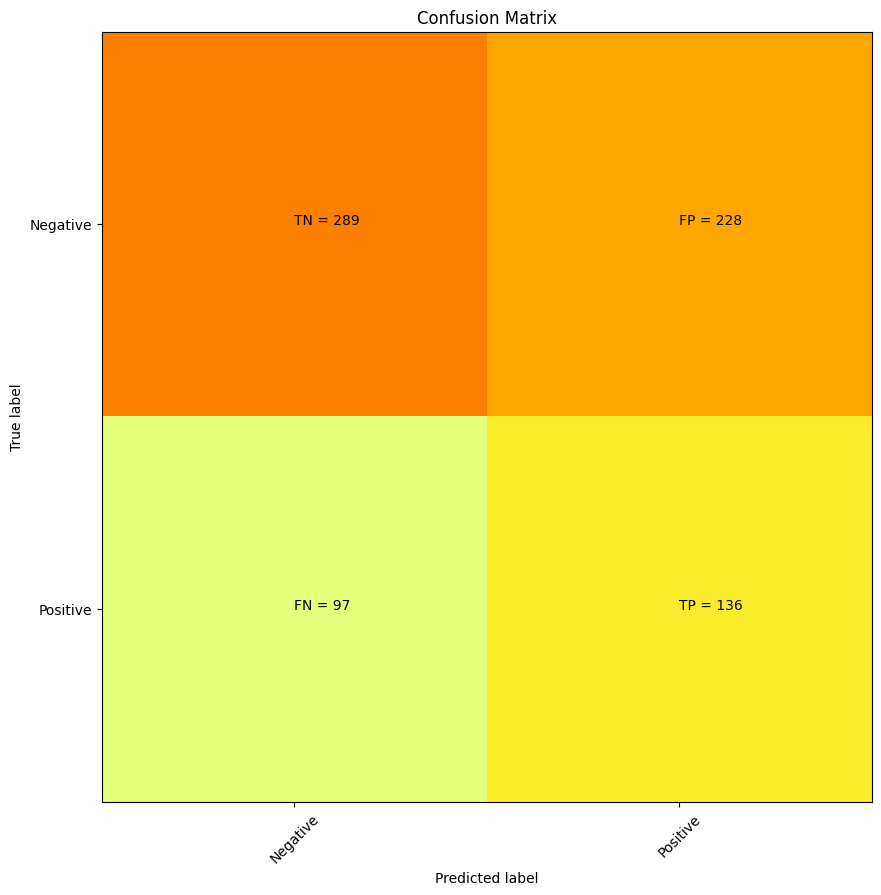

In [100]:
#plotting confusion matrix
plot_cm(y_test, y_pred_xgb)

In [101]:
from sklearn import metrics
metrics.recall_score(y_test, y_pred_xgb)
# accuracy_score(y_test, y_pred_xgb)

0.5836909871244635

In [102]:
metrics.accuracy_score(y_test, y_pred_xgb)

0.5666666666666667

In [103]:
metrics.precision_score(y_test, y_pred_xgb)

0.37362637362637363

In [104]:
print(metrics.classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.75      0.56      0.64       517
         1.0       0.37      0.58      0.46       233

    accuracy                           0.57       750
   macro avg       0.56      0.57      0.55       750
weighted avg       0.63      0.57      0.58       750



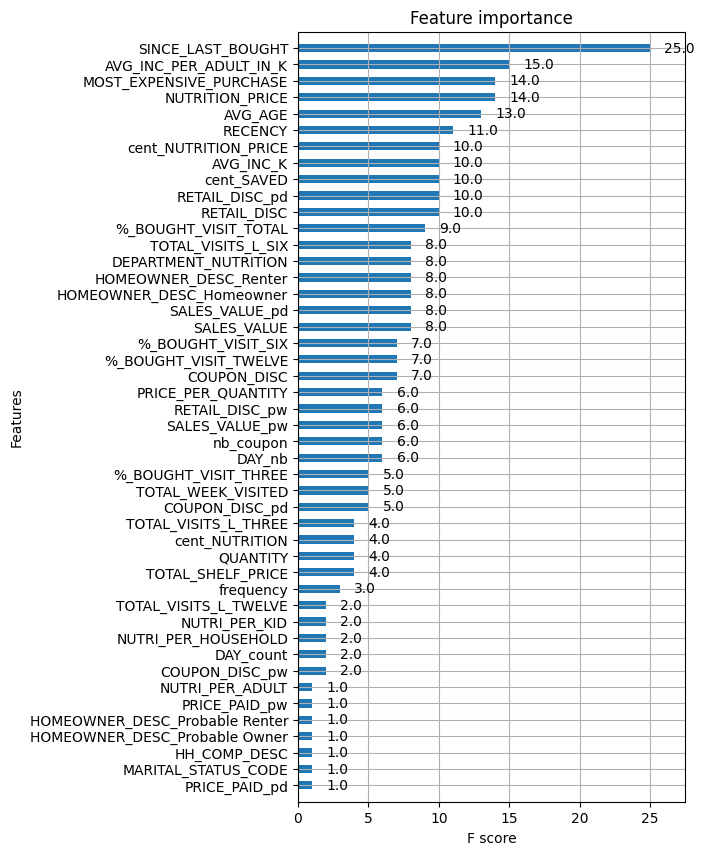

In [105]:
fig, ax = plt.subplots(figsize=(5,10))
xgb.plot_importance(clf_xgb, max_num_features=50, height=0.5, ax=ax,importance_type='weight')
plt.show()

In [106]:
from sklearn.feature_selection import SelectFromModel
xgb_sel = SelectFromModel(xgb.XGBClassifier(objective = 'binary:logistic', seed = 31))
xgb_sel.fit(x_train_scaled, y_train, verbose = True, 
            early_stopping_rounds = 5,
            eval_metric = 'auc', 
            eval_set = [(x_test, y_test)])


[0]	validation_0-auc:0.57134
[1]	validation_0-auc:0.62425
[2]	validation_0-auc:0.62346
[3]	validation_0-auc:0.51296
[4]	validation_0-auc:0.52144
[5]	validation_0-auc:0.52043


/Users/kyransinha/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/kyransinha/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


SelectFromModel(estimator=XGBClassifier(base_score=None, booster=None,
                                        callbacks=None, colsample_bylevel=None,
                                        colsample_bynode=None,
                                        colsample_bytree=None,
                                        early_stopping_rounds=None,
                                        enable_categorical=False,
                                        eval_metric=None, feature_types=None,
                                        gamma=None, gpu_id=None,
                                        grow_policy=None, importance_type=None,
                                        interaction_constraints=None,
                                        learning_rate=None, max_bin=None,
                                        max_cat_threshold=None,
                                        max_cat_to_onehot=None,
                                        max_delta_step=None, max_depth=None,
                                        max_leaves=None, min_child_weight=None,
                                        missing=nan, monotone_constraints=None,
                                        n_estimators=100, n_jobs=None,
                                        num_parallel_tree=None, predictor=None,
                                        random_state=None, ...))

In [107]:
xgb_sel.get_support()
selected_feat = x_train_scaled.columns[(xgb_sel.get_support())]
len(selected_feat)

9

In [108]:
print(selected_feat)

Index(['COUPON_DISC', 'nb_coupon', 'HOMEOWNER_DESC_Probable Owner',
       'RETAIL_DISC_pw', 'PRICE_PAID_pw', 'DEPARTMENT_NUTRITION',
       'NUTRITION_PRICE', 'frequency', 'SINCE_LAST_BOUGHT'],
      dtype='object')


In [109]:
feature_scores_xgb = pd.Series(clf_xgb.feature_importances_, index=x_train_scaled.columns).sort_values(ascending=False)
feature_scores_xgb

NUTRITION_PRICE                   0.284129
DEPARTMENT_NUTRITION              0.050580
SINCE_LAST_BOUGHT                 0.045926
frequency                         0.024152
PRICE_PAID_pw                     0.022503
nb_coupon                         0.021426
HOMEOWNER_DESC_Probable Owner     0.020973
COUPON_DISC                       0.020651
RETAIL_DISC_pw                    0.019399
TOTAL_SHELF_PRICE                 0.018624
SALES_VALUE_pw                    0.018432
HOMEOWNER_DESC_Renter             0.018078
RETAIL_DISC                       0.017301
HOMEOWNER_DESC_Homeowner          0.017110
cent_NUTRITION_PRICE              0.016923
RECENCY                           0.016402
PRICE_PER_QUANTITY                0.016296
AVG_INC_PER_ADULT_IN_K            0.015908
NUTRI_PER_HOUSEHOLD               0.015797
TOTAL_VISITS_L_SIX                0.015379
AVG_AGE                           0.015314
TOTAL_VISITS_L_THREE              0.015103
%_BOUGHT_VISIT_SIX                0.014601
SALES_VALUE

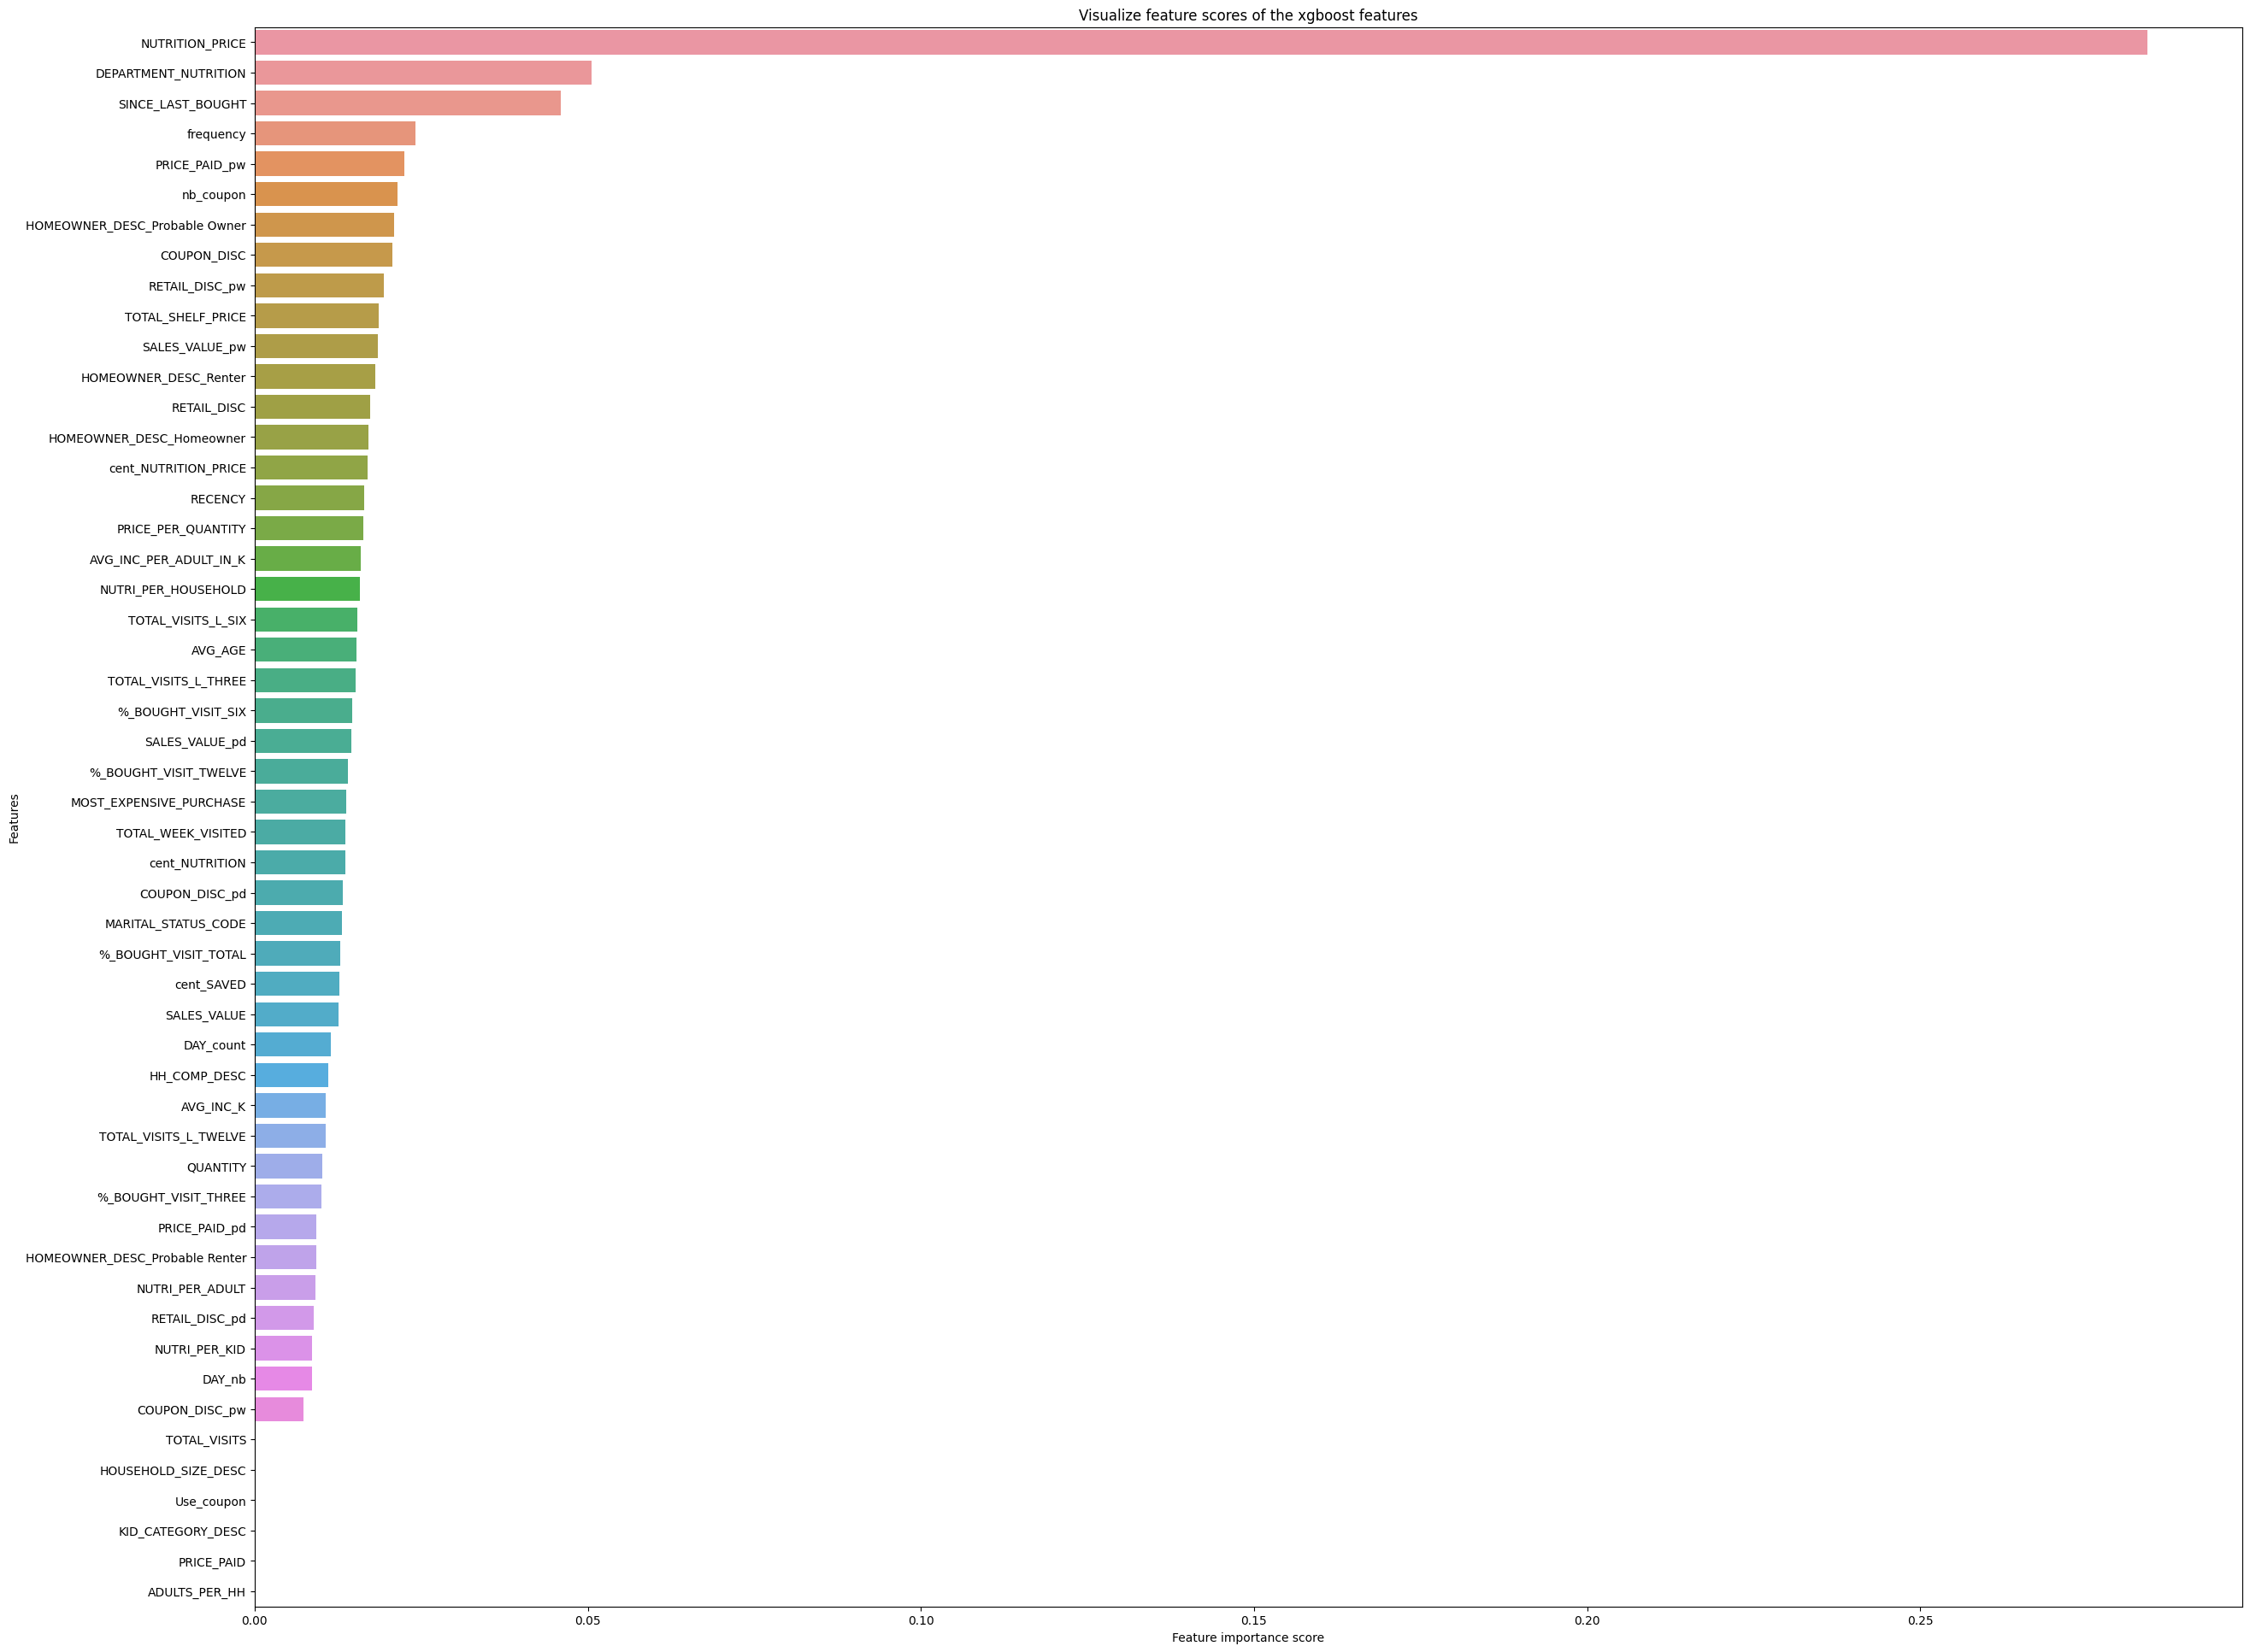

In [110]:
f, ax_xgb = plt.subplots(figsize=(30, 24))
ax_xgb = sns.barplot(x=feature_scores_xgb, y=feature_scores_xgb.index, data=df)
ax_xgb.set_title("Visualize feature scores of the xgboost features")
ax_xgb.set_yticklabels(feature_scores_xgb.index)
ax_xgb.set_xlabel("Feature importance score")
ax_xgb.set_ylabel("Features")
plt.show()

In [111]:
#logicstic regression - check
from sklearn.linear_model import LogisticRegression  
log_clf= LogisticRegression(random_state=31,  max_iter=500)  
log_clf.fit(x_train_scaled, y_train.values.ravel())

LogisticRegression(max_iter=500, random_state=31)

In [112]:
#variance inflaction factor

In [113]:
y_pred_lr= log_clf.predict(x_test)
y_pred_lr = pd.DataFrame(y_pred_lr)
y_pred_lr

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
745,0.0
746,0.0
747,0.0
748,0.0


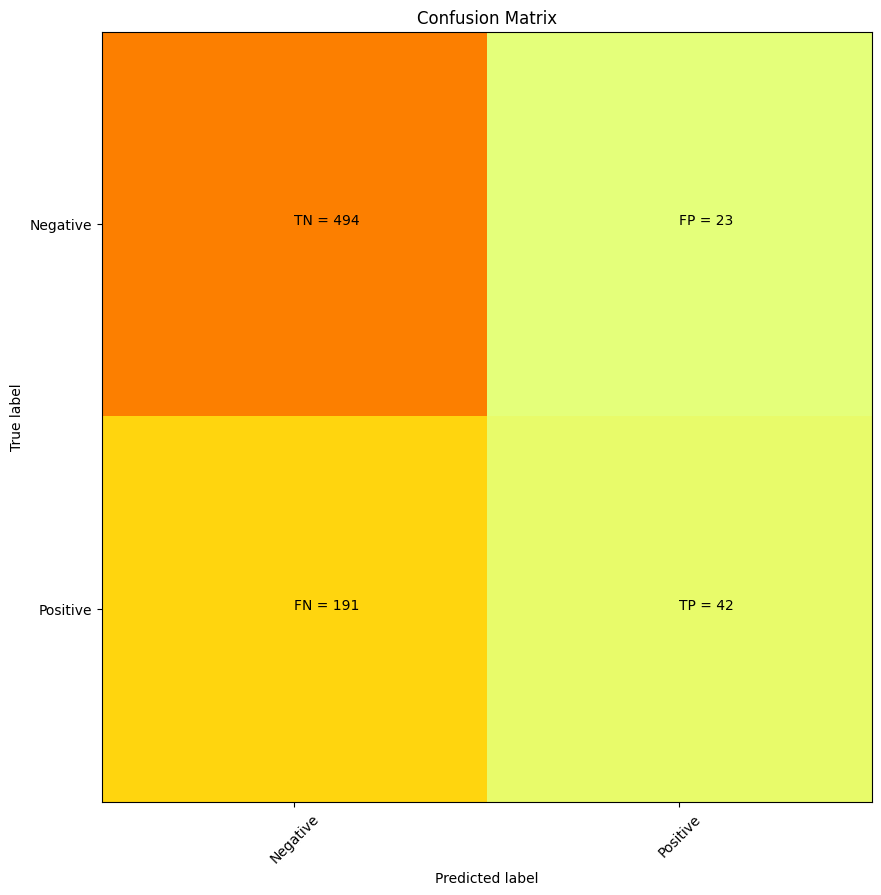

In [114]:
plot_cm(y_test, y_pred_lr)

In [115]:
metrics.accuracy_score(y_test, y_pred_lr)

0.7146666666666667

In [116]:
print(metrics.classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.75      0.56      0.64       517
         1.0       0.37      0.58      0.46       233

    accuracy                           0.57       750
   macro avg       0.56      0.57      0.55       750
weighted avg       0.63      0.57      0.58       750



In [117]:
from sklearn.feature_selection import RFE

In [118]:
import warnings
warnings.filterwarnings('ignore')

In [119]:
#using recursive feature elimination
log_clf= LogisticRegression(random_state=31) 
rfe_lr = RFE(log_clf, n_features_to_select = 12)
feature_lr = rfe_lr.fit(x_train_scaled, y_train)

In [120]:
selected_feat_lr = x_train_scaled.columns[(feature_lr.get_support())]
len(selected_feat_lr)

12

In [121]:
selected_feat_lr

Index(['DAY_nb', 'HOMEOWNER_DESC_Probable Owner', 'DEPARTMENT_NUTRITION',
       'NUTRITION_PRICE', 'cent_NUTRITION', 'RECENCY', 'NUTRI_PER_HOUSEHOLD',
       'NUTRI_PER_ADULT', 'SINCE_LAST_BOUGHT', '%_BOUGHT_VISIT_TWELVE',
       'TOTAL_VISITS_L_SIX', 'TOTAL_VISITS_L_THREE'],
      dtype='object')

In [122]:
x_train.head()

,SALES_VALUE,RETAIL_DISC,COUPON_DISC,PRICE_PAID,DAY_nb,TOTAL_SHELF_PRICE,SALES_VALUE_pd,PRICE_PAID_pd,RETAIL_DISC_pd,COUPON_DISC_pd,...,NUTRI_PER_KID,SINCE_LAST_BOUGHT,%_BOUGHT_VISIT_TOTAL,TOTAL_VISITS,%_BOUGHT_VISIT_TWELVE,TOTAL_VISITS_L_TWELVE,%_BOUGHT_VISIT_SIX,TOTAL_VISITS_L_SIX,%_BOUGHT_VISIT_THREE,TOTAL_VISITS_L_THREE
2046,652.78,99.85,1.35,651.43,16,753.98,40.80,40.71,6.24,0.08,...,0.0,544.0,0.00,16,0.00,11.0,0.00,8.0,0.00,3.0
2140,5247.03,650.92,0.40,5246.63,64,5898.35,81.98,81.98,10.17,0.01,...,5.0,171.0,6.25,64,8.51,47.0,4.35,23.0,0.00,11.0
1932,1889.24,343.86,2.99,1886.25,57,2236.09,33.14,33.09,6.03,0.05,...,0.0,13.0,3.51,57,2.78,36.0,4.17,24.0,7.69,13.0
1009,1630.03,213.02,0.00,1630.03,47,1843.05,34.68,34.68,4.53,0.00,...,0.0,65.0,17.02,47,18.92,37.0,12.00,25.0,6.67,15.0
1830,3669.94,648.33,54.73,3615.21,94,4373.00,39.04,38.46,6.90,0.58,...,0.0,19.0,11.70,94,6.41,78.0,2.27,44.0,3.33,30.0


In [123]:
from sklearn.ensemble import RandomForestClassifier  
rf_clf= RandomForestClassifier(n_estimators = 55, random_state = 31)  
rf_clf.fit(x_train_scaled, y_train.values.ravel())

RandomForestClassifier(n_estimators=55, random_state=31)

In [124]:
y_pred_rf = rf_clf.predict(x_test)
y_pred_rf = pd.DataFrame(y_pred_rf)
y_pred_rf

,0
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
745,1.0
746,1.0
747,1.0
748,1.0


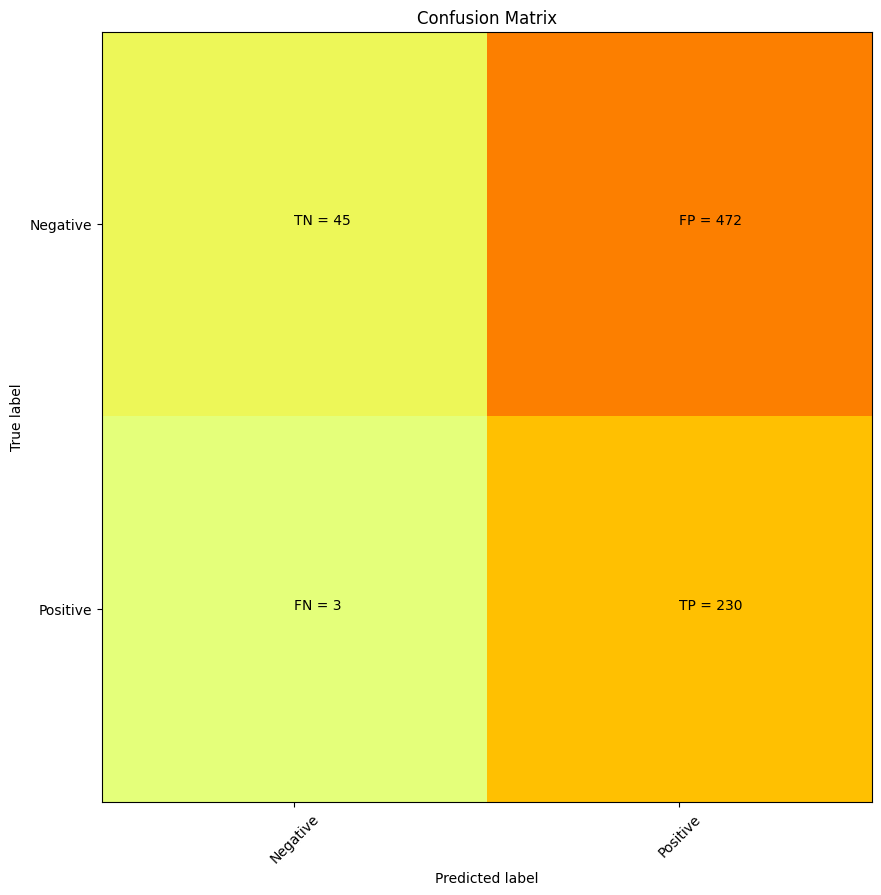

In [125]:
plot_cm(y_test, y_pred_rf)

In [126]:
metrics.accuracy_score(y_test, y_pred_rf)

0.36666666666666664

In [127]:
print(metrics.classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.94      0.09      0.16       517
         1.0       0.33      0.99      0.49       233

    accuracy                           0.37       750
   macro avg       0.63      0.54      0.33       750
weighted avg       0.75      0.37      0.26       750



In [128]:
#running feature selection on the Random Forest Model
sel = SelectFromModel(RandomForestClassifier(n_estimators = 55, random_state = 31))
sel.fit(x_train_scaled, y_train.values.ravel())

SelectFromModel(estimator=RandomForestClassifier(n_estimators=55,
                                                 random_state=31))

In [129]:
sel.get_support()

array([ True, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False,  True, False,  True,  True, False,  True,  True,
       False, False, False,  True,  True,  True, False,  True,  True,
       False,  True, False,  True, False,  True, False])

In [130]:
selected_feat = x_train_scaled.columns[(sel.get_support())]
len(selected_feat)

18

In [131]:
print(selected_feat)

Index(['SALES_VALUE', 'PRICE_PAID', 'TOTAL_SHELF_PRICE',
       'AVG_INC_PER_ADULT_IN_K', 'SALES_VALUE_pw', 'PRICE_PAID_pw',
       'DEPARTMENT_NUTRITION', 'NUTRITION_PRICE', 'cent_NUTRITION',
       'cent_NUTRITION_PRICE', 'RECENCY', 'NUTRI_PER_HOUSEHOLD',
       'NUTRI_PER_ADULT', 'SINCE_LAST_BOUGHT', '%_BOUGHT_VISIT_TOTAL',
       '%_BOUGHT_VISIT_TWELVE', '%_BOUGHT_VISIT_SIX', '%_BOUGHT_VISIT_THREE'],
      dtype='object')


In [132]:
feature_scores_rf = pd.Series(rf_clf.feature_importances_, index=x_train_scaled.columns).sort_values(ascending=False)
feature_scores_rf



NUTRITION_PRICE                   0.074685
SINCE_LAST_BOUGHT                 0.063780
NUTRI_PER_ADULT                   0.045931
DEPARTMENT_NUTRITION              0.045404
NUTRI_PER_HOUSEHOLD               0.037021
%_BOUGHT_VISIT_TOTAL              0.036500
%_BOUGHT_VISIT_THREE              0.031799
%_BOUGHT_VISIT_TWELVE             0.026407
cent_NUTRITION                    0.026105
%_BOUGHT_VISIT_SIX                0.024489
PRICE_PAID_pw                     0.023318
cent_NUTRITION_PRICE              0.022214
PRICE_PAID                        0.021184
SALES_VALUE                       0.020319
SALES_VALUE_pw                    0.019667
RECENCY                           0.019652
TOTAL_SHELF_PRICE                 0.019616
AVG_INC_PER_ADULT_IN_K            0.019385
MOST_EXPENSIVE_PURCHASE           0.018629
PRICE_PER_QUANTITY                0.018598
cent_SAVED                        0.018219
RETAIL_DISC_pd                    0.018135
AVG_INC_K                         0.017863
RETAIL_DISC

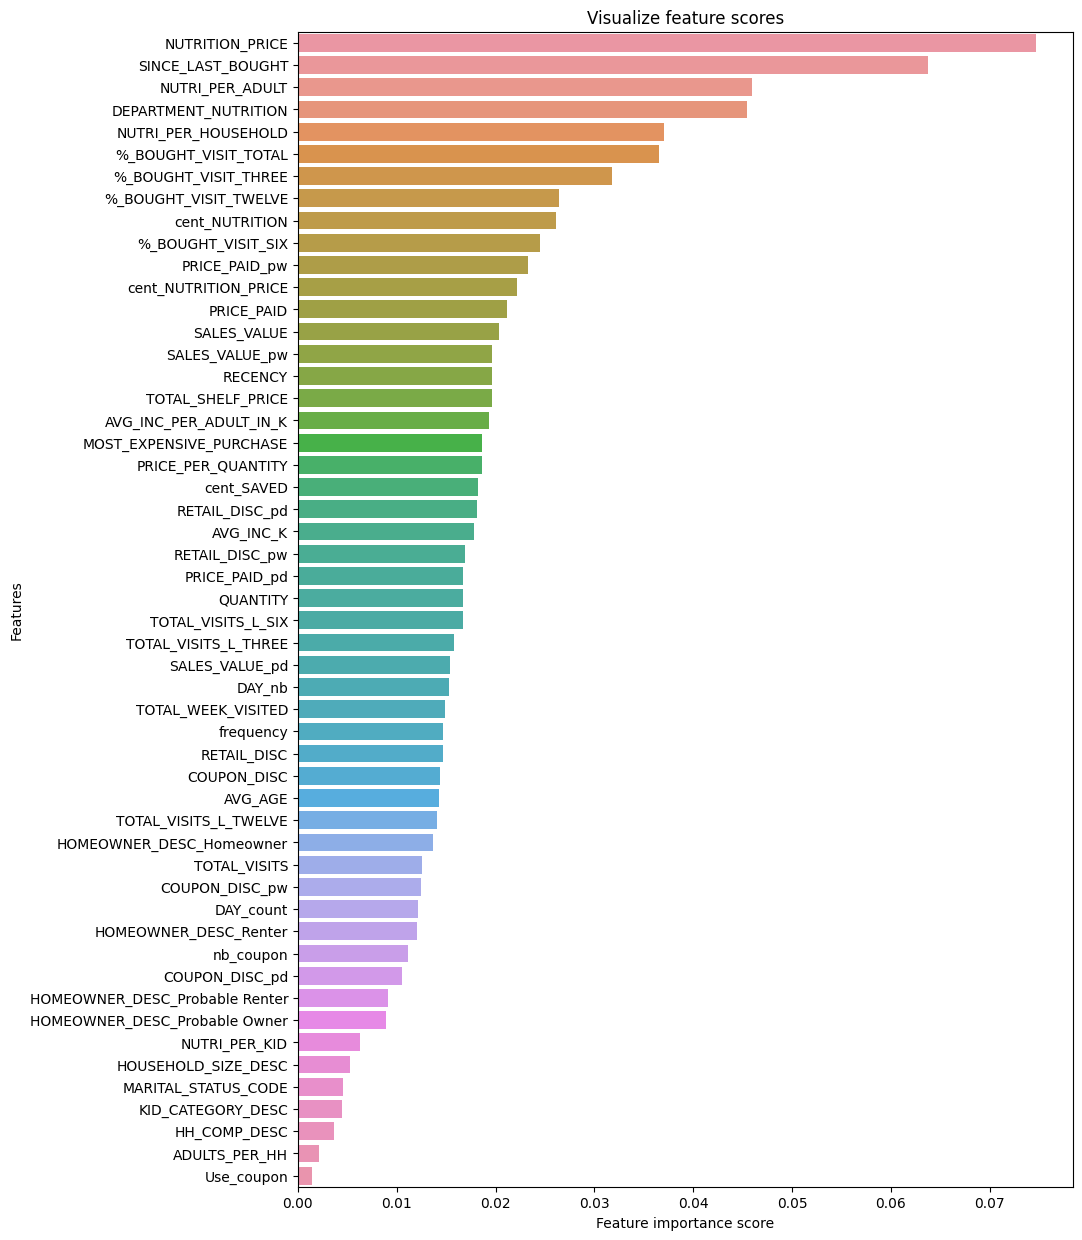

In [286]:
f, ax_rf = plt.subplots(figsize=(10,15))
ax_rf = sns.barplot(x=feature_scores_rf, y=feature_scores_rf.index, data=df)
ax_rf.set_title("Visualize feature scores")
ax_rf.set_yticklabels(feature_scores_rf.index)
ax_rf.set_xlabel("Feature importance score")
ax_rf.set_ylabel("Features")
plt.show()

In [134]:
#vif on variables (threshold = 6)
#model enhancement- parameters- threshold, scale_pos_weight
#weight of evidence
#grid search 

In [135]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
X = x_train_scaled[['SALES_VALUE', 'AVG_INC_PER_ADULT_IN_K', 'PRICE_PAID_pw',
       'DEPARTMENT_NUTRITION', 'NUTRITION_PRICE', 'MOST_EXPENSIVE_PURCHASE',
       'cent_NUTRITION', 'cent_NUTRITION_PRICE', 'RECENCY',
       'NUTRI_PER_HOUSEHOLD', 'NUTRI_PER_ADULT', 'SINCE_LAST_BOUGHT',
       '%_BOUGHT_VISIT_TOTAL', '%_BOUGHT_VISIT_TWELVE', '%_BOUGHT_VISIT_SIX',
       '%_BOUGHT_VISIT_THREE']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                    feature        VIF
0               SALES_VALUE   5.472903
1    AVG_INC_PER_ADULT_IN_K   1.215807
2             PRICE_PAID_pw   4.875949
3      DEPARTMENT_NUTRITION  26.153942
4           NUTRITION_PRICE  18.885557
5   MOST_EXPENSIVE_PURCHASE   1.122787
6            cent_NUTRITION  24.729606
7      cent_NUTRITION_PRICE  25.690647
8                   RECENCY   1.247271
9       NUTRI_PER_HOUSEHOLD   7.319051
10          NUTRI_PER_ADULT  11.680942
11        SINCE_LAST_BOUGHT   1.969492
12     %_BOUGHT_VISIT_TOTAL  12.920299
13    %_BOUGHT_VISIT_TWELVE  13.081406
14       %_BOUGHT_VISIT_SIX   8.222120
15     %_BOUGHT_VISIT_THREE   4.149496


In [136]:
X = x_train_scaled[['SALES_VALUE', 'AVG_INC_PER_ADULT_IN_K', 'PRICE_PAID_pw',
        'NUTRITION_PRICE', 'MOST_EXPENSIVE_PURCHASE',
       'cent_NUTRITION', 'cent_NUTRITION_PRICE', 'RECENCY',
       'NUTRI_PER_HOUSEHOLD', 'NUTRI_PER_ADULT', 'SINCE_LAST_BOUGHT',
       '%_BOUGHT_VISIT_TOTAL', '%_BOUGHT_VISIT_TWELVE', '%_BOUGHT_VISIT_SIX',
       '%_BOUGHT_VISIT_THREE']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                    feature        VIF
0               SALES_VALUE   5.467292
1    AVG_INC_PER_ADULT_IN_K   1.177792
2             PRICE_PAID_pw   4.873769
3           NUTRITION_PRICE   7.196201
4   MOST_EXPENSIVE_PURCHASE   1.122653
5            cent_NUTRITION  22.862474
6      cent_NUTRITION_PRICE  23.984773
7                   RECENCY   1.245804
8       NUTRI_PER_HOUSEHOLD   7.311230
9           NUTRI_PER_ADULT   9.521779
10        SINCE_LAST_BOUGHT   1.959041
11     %_BOUGHT_VISIT_TOTAL  12.901626
12    %_BOUGHT_VISIT_TWELVE  13.067583
13       %_BOUGHT_VISIT_SIX   8.216982
14     %_BOUGHT_VISIT_THREE   4.145563


In [137]:
X = x_train_scaled[['SALES_VALUE', 'AVG_INC_PER_ADULT_IN_K', 'PRICE_PAID_pw',
        'NUTRITION_PRICE', 'MOST_EXPENSIVE_PURCHASE',
       'cent_NUTRITION', 'RECENCY',
       'NUTRI_PER_HOUSEHOLD', 'NUTRI_PER_ADULT', 'SINCE_LAST_BOUGHT',
       '%_BOUGHT_VISIT_TOTAL', '%_BOUGHT_VISIT_TWELVE', '%_BOUGHT_VISIT_SIX',
       '%_BOUGHT_VISIT_THREE']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                    feature        VIF
0               SALES_VALUE   5.467291
1    AVG_INC_PER_ADULT_IN_K   1.177340
2             PRICE_PAID_pw   4.867821
3           NUTRITION_PRICE   6.728100
4   MOST_EXPENSIVE_PURCHASE   1.122241
5            cent_NUTRITION   3.190602
6                   RECENCY   1.245790
7       NUTRI_PER_HOUSEHOLD   7.289879
8           NUTRI_PER_ADULT   9.285493
9         SINCE_LAST_BOUGHT   1.958136
10     %_BOUGHT_VISIT_TOTAL  12.762360
11    %_BOUGHT_VISIT_TWELVE  13.059042
12       %_BOUGHT_VISIT_SIX   8.204940
13     %_BOUGHT_VISIT_THREE   4.084704


In [138]:
X = x_train_scaled[['SALES_VALUE', 'AVG_INC_PER_ADULT_IN_K', 'PRICE_PAID_pw',
        'NUTRITION_PRICE', 'MOST_EXPENSIVE_PURCHASE',
       'cent_NUTRITION', 'RECENCY',
       'NUTRI_PER_HOUSEHOLD', 'NUTRI_PER_ADULT', 'SINCE_LAST_BOUGHT',
        '%_BOUGHT_VISIT_TWELVE', '%_BOUGHT_VISIT_SIX',
       '%_BOUGHT_VISIT_THREE']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                    feature       VIF
0               SALES_VALUE  5.334439
1    AVG_INC_PER_ADULT_IN_K  1.177336
2             PRICE_PAID_pw  4.701466
3           NUTRITION_PRICE  6.654886
4   MOST_EXPENSIVE_PURCHASE  1.121645
5            cent_NUTRITION  2.237069
6                   RECENCY  1.236575
7       NUTRI_PER_HOUSEHOLD  7.287851
8           NUTRI_PER_ADULT  9.274288
9         SINCE_LAST_BOUGHT  1.936877
10    %_BOUGHT_VISIT_TWELVE  7.134782
11       %_BOUGHT_VISIT_SIX  8.140390
12     %_BOUGHT_VISIT_THREE  4.056667


In [139]:
X = x_train_scaled[['SALES_VALUE', 'AVG_INC_PER_ADULT_IN_K',
        'NUTRITION_PRICE', 'MOST_EXPENSIVE_PURCHASE',
       'cent_NUTRITION', 'RECENCY',
       'NUTRI_PER_HOUSEHOLD', 'SINCE_LAST_BOUGHT',
        '%_BOUGHT_VISIT_TWELVE', '%_BOUGHT_VISIT_SIX',
       '%_BOUGHT_VISIT_THREE']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                    feature       VIF
0               SALES_VALUE  1.596682
1    AVG_INC_PER_ADULT_IN_K  1.130497
2           NUTRITION_PRICE  4.811977
3   MOST_EXPENSIVE_PURCHASE  1.120856
4            cent_NUTRITION  2.173608
5                   RECENCY  1.157704
6       NUTRI_PER_HOUSEHOLD  4.409226
7         SINCE_LAST_BOUGHT  1.923536
8     %_BOUGHT_VISIT_TWELVE  7.000788
9        %_BOUGHT_VISIT_SIX  8.127441
10     %_BOUGHT_VISIT_THREE  4.043367


In [140]:
X = x_train_scaled[['SALES_VALUE', 'AVG_INC_PER_ADULT_IN_K',
        'NUTRITION_PRICE', 'MOST_EXPENSIVE_PURCHASE',
       'cent_NUTRITION', 'RECENCY',
       'NUTRI_PER_ADULT', 'NUTRI_PER_KID', 'SINCE_LAST_BOUGHT',
        '%_BOUGHT_VISIT_TWELVE', '%_BOUGHT_VISIT_SIX',
       '%_BOUGHT_VISIT_THREE']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                    feature       VIF
0               SALES_VALUE  1.602251
1    AVG_INC_PER_ADULT_IN_K  1.132845
2           NUTRITION_PRICE  6.949498
3   MOST_EXPENSIVE_PURCHASE  1.120019
4            cent_NUTRITION  2.186942
5                   RECENCY  1.156931
6           NUTRI_PER_ADULT  5.760790
7             NUTRI_PER_KID  1.613640
8         SINCE_LAST_BOUGHT  1.925848
9     %_BOUGHT_VISIT_TWELVE  6.980817
10       %_BOUGHT_VISIT_SIX  8.135319
11     %_BOUGHT_VISIT_THREE  4.046884


In [141]:
X = x_train_scaled[['SALES_VALUE', 'AVG_INC_PER_ADULT_IN_K',
        'NUTRITION_PRICE', 'MOST_EXPENSIVE_PURCHASE', 'NUTRI_PER_ADULT',
       'cent_NUTRITION', 'RECENCY',
       'NUTRI_PER_HOUSEHOLD', 'SINCE_LAST_BOUGHT',
         '%_BOUGHT_VISIT_SIX',
       '%_BOUGHT_VISIT_THREE']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                    feature       VIF
0               SALES_VALUE  1.587826
1    AVG_INC_PER_ADULT_IN_K  1.097018
2           NUTRITION_PRICE  6.572468
3   MOST_EXPENSIVE_PURCHASE  1.120844
4           NUTRI_PER_ADULT  9.243099
5            cent_NUTRITION  1.817998
6                   RECENCY  1.155822
7       NUTRI_PER_HOUSEHOLD  7.133647
8         SINCE_LAST_BOUGHT  1.830167
9        %_BOUGHT_VISIT_SIX  5.186707
10     %_BOUGHT_VISIT_THREE  4.012159


In [142]:
x_train_final = x_train_scaled[['SALES_VALUE', 'AVG_INC_PER_ADULT_IN_K',
        'NUTRITION_PRICE', 'MOST_EXPENSIVE_PURCHASE', 
       'cent_NUTRITION', 'RECENCY', 'NUTRI_PER_ADULT',
       'NUTRI_PER_HOUSEHOLD', 'SINCE_LAST_BOUGHT',
         '%_BOUGHT_VISIT_SIX',
       '%_BOUGHT_VISIT_THREE']]
x_test_final = x_test[['SALES_VALUE', 'AVG_INC_PER_ADULT_IN_K',
        'NUTRITION_PRICE', 'MOST_EXPENSIVE_PURCHASE', 
       'cent_NUTRITION', 'RECENCY', "NUTRI_PER_ADULT",
       'NUTRI_PER_HOUSEHOLD', 'SINCE_LAST_BOUGHT',
         '%_BOUGHT_VISIT_SIX',
       '%_BOUGHT_VISIT_THREE']]

In [143]:
rf_clf2= RandomForestClassifier(random_state = 31, bootstrap= True, class_weight= None, max_depth= 5, max_features= 'sqrt', min_samples_leaf= 10, min_samples_split= 30, n_estimators= 300, oob_score= True)  
rf_clf2.fit(x_train_final, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=30,
                       n_estimators=300, oob_score=True, random_state=31)

In [144]:
y_pred_rf2 = rf_clf2.predict(x_test_final)
y_pred_rf2 = pd.DataFrame(y_pred_rf2)
y_pred_rf2

,0
0,0.0
1,1.0
2,1.0
3,0.0
4,1.0
...,...
745,0.0
746,0.0
747,1.0
748,1.0


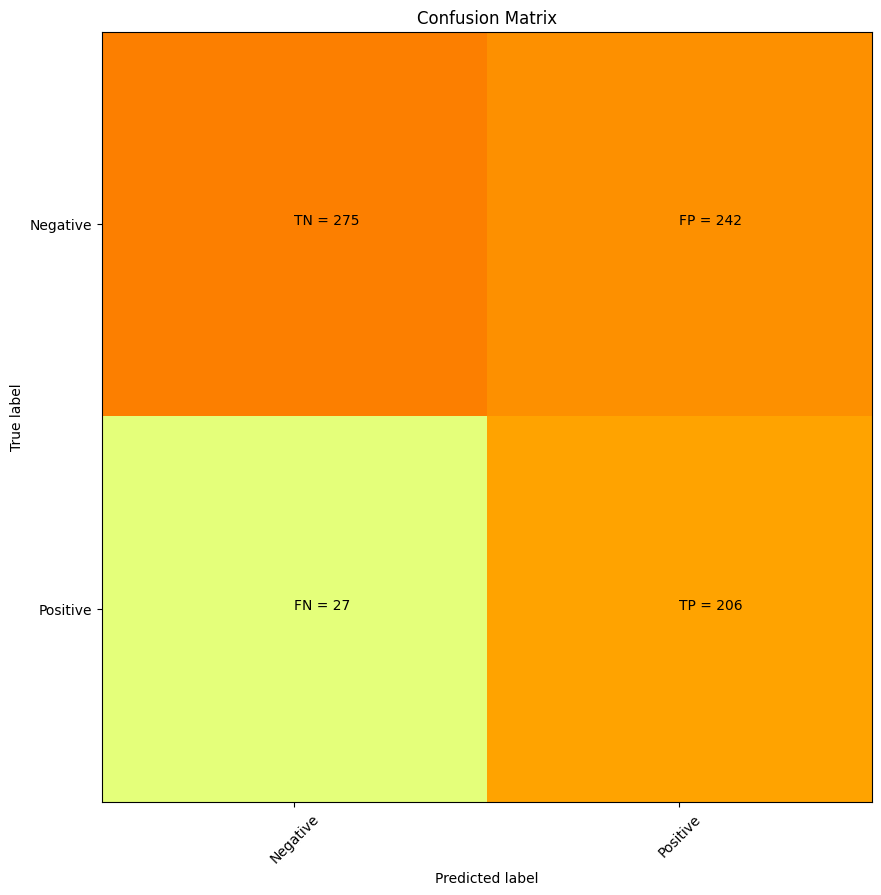

In [145]:
plot_cm(y_test, y_pred_rf2)

In [146]:
metrics.accuracy_score(y_test, y_pred_rf2)

0.6413333333333333

In [147]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf2))

              precision    recall  f1-score   support

         0.0       0.91      0.53      0.67       517
         1.0       0.46      0.88      0.60       233

    accuracy                           0.64       750
   macro avg       0.69      0.71      0.64       750
weighted avg       0.77      0.64      0.65       750



In [148]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [5, 10, 15],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced'],
    'bootstrap': [True],
    'oob_score': [True]
}

In [149]:
# grid_search = GridSearchCV(estimator=rf_clf2, param_grid=param_grid, scoring='accuracy', cv=5, verbose = 1)
# grid_search.fit(x_train_final, y_train)
#{'bootstrap': True, 'class_weight': None, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 30, 'n_estimators': 300, 'oob_score': True}

In [150]:
# print(gird_search .best_params_)

In [151]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [152]:
log_clf2= LogisticRegression(random_state=31,  max_iter=2000)  
log_clf2.fit(x_train_final, y_train)

LogisticRegression(max_iter=2000, random_state=31)

In [153]:
y_pred_lr2= log_clf2.predict(x_test_final)
y_pred_lr2 = pd.DataFrame(y_pred_lr2)
y_pred_lr2

,0
0,0.0
1,1.0
2,1.0
3,0.0
4,1.0
...,...
745,0.0
746,0.0
747,1.0
748,1.0


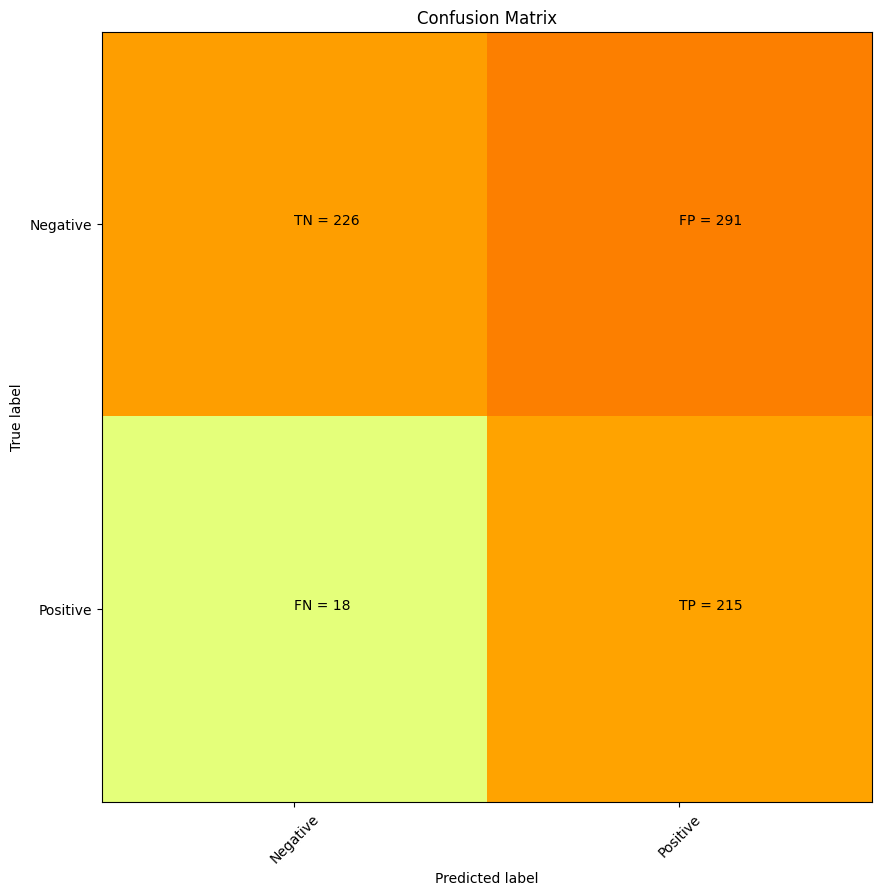

In [154]:
plot_cm(y_test, y_pred_lr2)

In [155]:
metrics.accuracy_score(y_test, y_pred_lr2)

0.588

In [156]:
clf_xgb2 = xgb.XGBClassifier(objective = 'binary:logistic', seed = 31)
clf_xgb2.fit(x_train_final, y_train)
            

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [157]:
y_pred_xgb2 = clf_xgb2.predict(x_test_final)
y_pred_xgb2 = pd.DataFrame(y_pred_xgb2)
y_pred_xgb2

,0
0,0
1,1
2,0
3,0
4,0
...,...
745,0
746,0
747,1
748,1


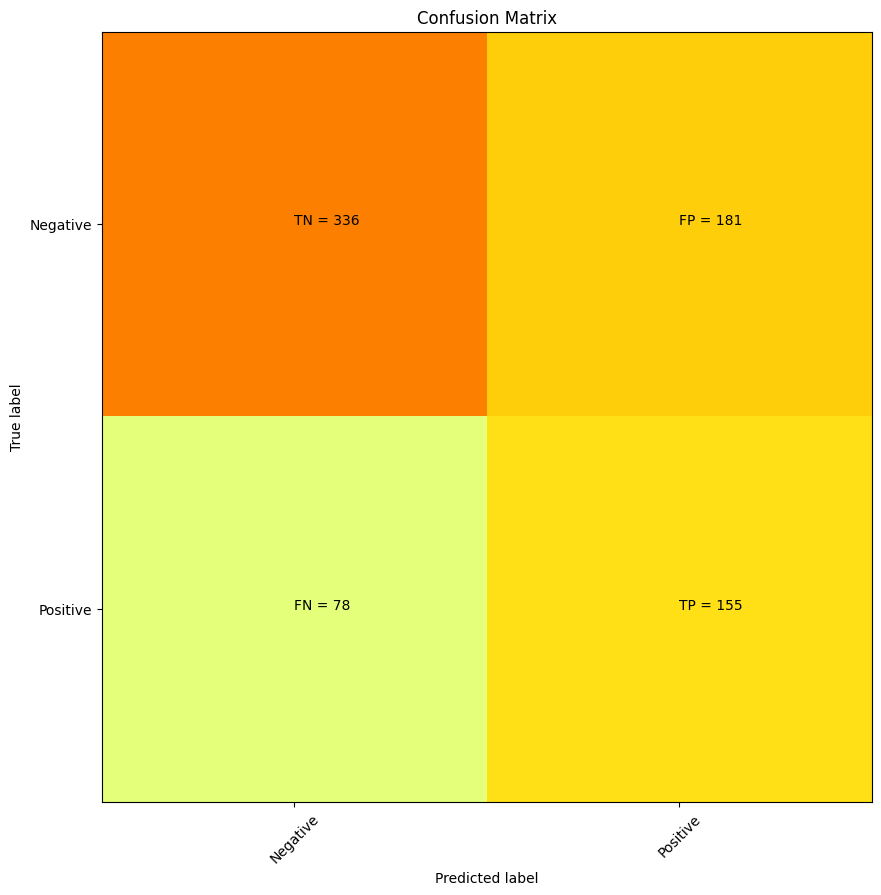

In [158]:
plot_cm(y_test,y_pred_xgb2)

In [159]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier()
ada_clf.fit(x_train_final, y_train)

AdaBoostClassifier()

In [160]:
ypred_ada = ada_clf.predict(x_test_final)
ypred_ada = pd.DataFrame(ypred_ada)
ypred_ada

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
745,0.0
746,0.0
747,0.0
748,0.0


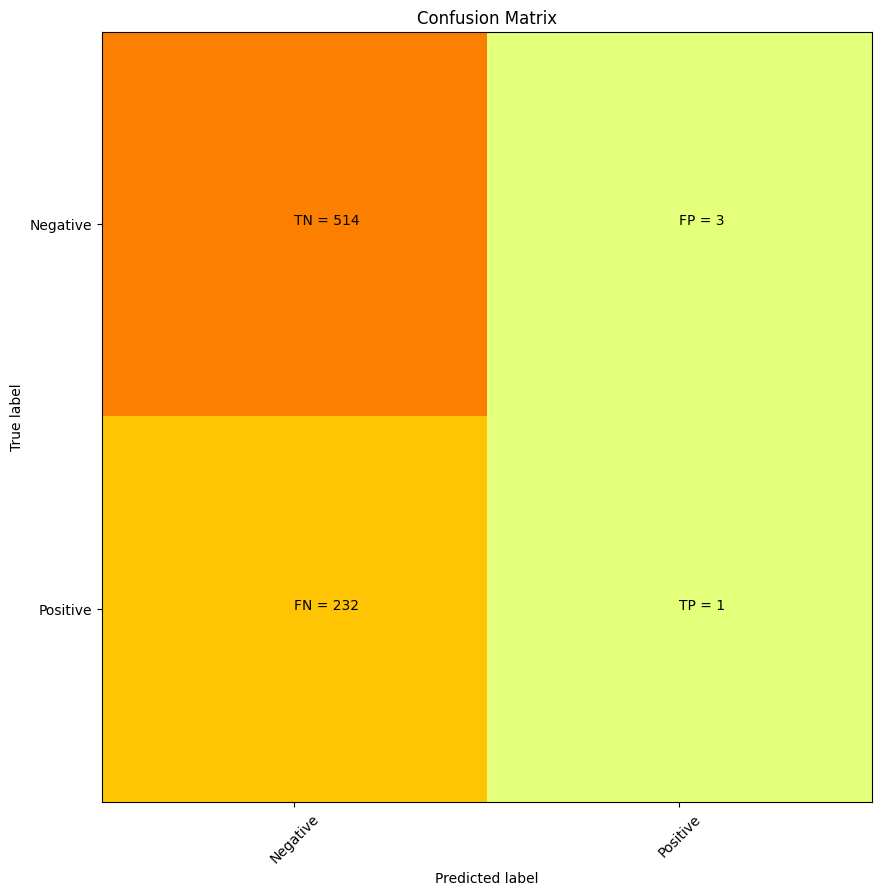

In [161]:
plot_cm(y_test, ypred_ada)

In [162]:
rf_train_pred = rf_clf2.predict_proba(x_train_final)
print('rf train r oc- auc: {}'.format(roc_auc_score(y_train,rf_train_pred[:,1])))
rf_test_pred = rf_clf2.predict_proba(x_test_final)
print('rf test roc-auc: {}'.format(roc_auc_score(y_test,rf_test_pred[:,1])))

rf train r oc- auc: 0.8773812364989321
rf test roc-auc: 0.7954441686520948


In [163]:
pred=[]
pred.append(pd.Series(rf_clf2.predict_proba(x_test_final)[:,1]))
pred = pd.concat(pred,axis =1)
pred

,0
0,0.396782
1,0.525307
2,0.541771
3,0.396782
4,0.536794
...,...
745,0.396782
746,0.396782
747,0.510282
748,0.531823


In [164]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
thresholds

array([1.54436857, 0.54436857, 0.54424254, 0.54391889, 0.54323007,
       0.54118672, 0.54084701, 0.54072716, 0.54023243, 0.54019142,
       0.54005495, 0.53982347, 0.53970851, 0.53939936, 0.53937499,
       0.53929432, 0.53904416, 0.53898352, 0.53891645, 0.53832212,
       0.5382871 , 0.53827983, 0.53819597, 0.53797725, 0.53791654,
       0.53780248, 0.53778733, 0.53758755, 0.53708711, 0.53697599,
       0.5369593 , 0.53682597, 0.53679432, 0.53675154, 0.5367329 ,
       0.53667994, 0.53660782, 0.53656655, 0.53646708, 0.53623726,
       0.53589239, 0.53577566, 0.53575906, 0.53572458, 0.53562337,
       0.53559287, 0.53550984, 0.5354441 , 0.53505713, 0.53500225,
       0.53444293, 0.53426507, 0.53391669, 0.53378647, 0.53365087,
       0.53314327, 0.53290631, 0.53195939, 0.53187297, 0.53182292,
       0.5317198 , 0.53147615, 0.53127718, 0.53119837, 0.53116733,
       0.53113579, 0.53106826, 0.53005508, 0.52996395, 0.52968451,
       0.52951934, 0.52920332, 0.52909692, 0.52872728, 0.52807

In [165]:
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(pred>thres,1,0)
    accuracy_ls.append(metrics.accuracy_score(y_test, y_pred, normalize = True))

accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)], axis = 1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by="accuracy", ascending= False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
49,0.535002,0.774667
47,0.535444,0.773333
48,0.535057,0.773333
55,0.533143,0.772000
34,0.536733,0.772000


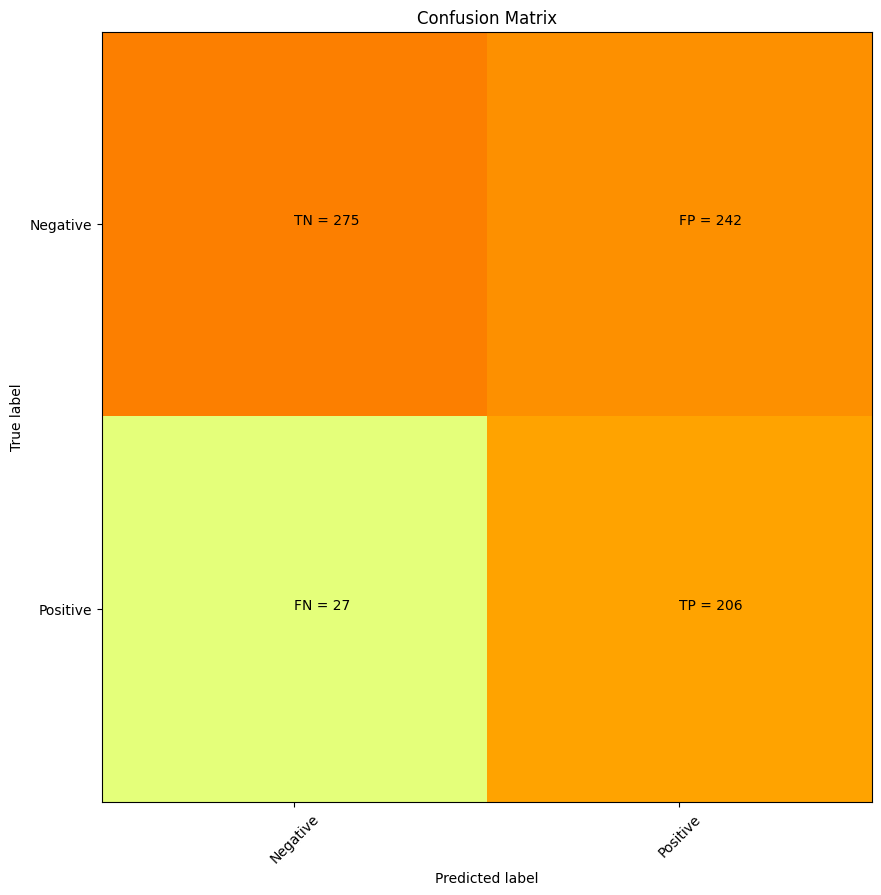

In [166]:
predicted_proba = rf_clf2.predict_proba(x_test_final)
ypred_thresh = (predicted_proba [:,1] >= 0.5).astype('int')
plot_cm(y_test, ypred_thresh)

In [167]:
metrics.accuracy_score(y_test, ypred_thresh)

0.6413333333333333

In [168]:
param_grid = {
    'n_estimators' : [100,500,200, 400,300, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,4,5,6,7,8],
    'min_samples_leaf': [1,2,3]
}

In [169]:
from sklearn.model_selection import GridSearchCV
# CV_rfc = GridSearchCV(estimator = rf_clf2, param_grid = param_grid, cv = 5)
# CV_rfc.fit(x_train_final,y_train)

In [170]:
# print(CV_rfc.best_params_)

In [171]:
rf_clf3 =RandomForestClassifier(random_state=31, max_features='auto', n_estimators= 300, max_depth=3, criterion='gini')
rf_clf3.fit(x_train_final, y_train)



RandomForestClassifier(max_depth=3, max_features='auto', n_estimators=300,
                       random_state=31)

In [172]:
rf3_ypred = rf_clf3.predict(x_test_final)
rf3_ypred = pd.DataFrame(rf3_ypred)
rf3_ypred

,0
0,0.0
1,1.0
2,1.0
3,0.0
4,1.0
...,...
745,0.0
746,0.0
747,1.0
748,1.0


In [173]:
pred=[]
pred.append(pd.Series(rf_clf3.predict_proba(x_test_final)[:,1]))
pred = pd.concat(pred,axis =1)
pred

,0
0,0.490117
1,0.598401
2,0.593290
3,0.490117
4,0.591211
...,...
745,0.490117
746,0.490117
747,0.575249
748,0.600622


In [174]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
thresholds

array([1.60655045, 0.60655045, 0.60542357, 0.60535429, 0.60419215,
       0.60388768, 0.60377762, 0.60265074, 0.60187635, 0.60122137,
       0.60103069, 0.60095789, 0.60074947, 0.60073621, 0.60062169,
       0.60053663, 0.60052877, 0.60047514, 0.6002999 , 0.59998108,
       0.5994948 , 0.59940188, 0.599313  , 0.59859956, 0.59840056,
       0.59837523, 0.5982999 , 0.59824104, 0.59816646, 0.5981009 ,
       0.59806064, 0.59797579, 0.59794611, 0.59754534, 0.59750508,
       0.59748348, 0.59740814, 0.59739055, 0.59732731, 0.5973055 ,
       0.59691215, 0.59684287, 0.59681923, 0.59676753, 0.59674995,
       0.59656501, 0.59647209, 0.59635659, 0.59628126, 0.59626367,
       0.59620668, 0.59585998, 0.59576356, 0.59530443, 0.59520801,
       0.59519668, 0.59513541, 0.59466382, 0.59420668, 0.59417754,
       0.59328953, 0.59311162, 0.59264899, 0.59262535, 0.59255078,
       0.59246994, 0.59228041, 0.59220562, 0.59208814, 0.59124775,
       0.59121123, 0.59074254, 0.59046994, 0.58990909, 0.58980

In [175]:
accuracy_ls = []
recall_ls = []
precision_ls = []
f1_ls = []

for thres in thresholds:
    y_pred = np.where(pred>thres,1,0)
    accuracy_ls.append(metrics.accuracy_score(y_test, y_pred, normalize = True))
    recall_ls.append(metrics.recall_score(y_test, y_pred))
    precision_ls.append(metrics.precision_score(y_test, y_pred))
    f1_ls.append(metrics.f1_score(y_test, y_pred))
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls), pd.Series(recall_ls), pd.Series(precision_ls), pd.Series(f1_ls)], axis = 1)
accuracy_ls.columns = ['thresholds', 'accuracy', 'recall', 'precision', 'f1']
accuracy_ls.sort_values(by="accuracy", ascending= False, inplace=True)
accuracy_ls

,thresholds,accuracy,recall,precision,f1
50,0.596207,0.786667,0.605150,0.674641,0.638009
51,0.595860,0.786667,0.609442,0.672986,0.639640
52,0.595764,0.786667,0.613734,0.671362,0.641256
57,0.594664,0.786667,0.639485,0.662222,0.650655
59,0.594178,0.786667,0.643777,0.660793,0.652174
...,...,...,...,...,...
152,0.490117,0.600000,0.909871,0.431772,0.585635
153,0.489048,0.334667,1.000000,0.318306,0.482902
154,0.487658,0.333333,1.000000,0.317872,0.482402
155,0.481240,0.330667,1.000000,0.317007,0.481405


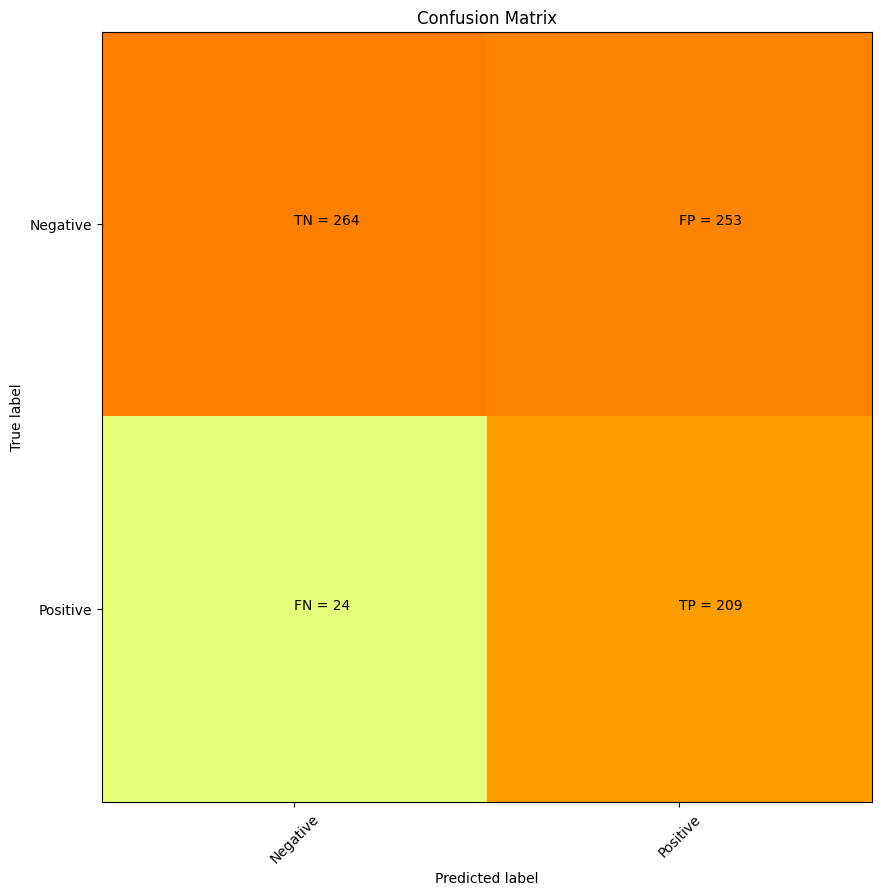

In [176]:
predicted_proba = rf_clf3.predict_proba(x_test_final)
ypred_thresh_rf = (predicted_proba [:,1] >= 0.5).astype('int')
plot_cm(y_test, ypred_thresh_rf)


In [177]:
print(metrics.classification_report(y_test, ypred_thresh_rf))

              precision    recall  f1-score   support

         0.0       0.92      0.51      0.66       517
         1.0       0.45      0.90      0.60       233

    accuracy                           0.63       750
   macro avg       0.68      0.70      0.63       750
weighted avg       0.77      0.63      0.64       750



In [178]:
print(metrics.accuracy_score(y_test, ypred_thresh_rf))

0.6306666666666667


In [179]:
print(metrics.recall_score(y_test,ypred_thresh_rf))

0.8969957081545065


In [180]:
x_train_scaled

,SALES_VALUE,RETAIL_DISC,COUPON_DISC,PRICE_PAID,DAY_nb,TOTAL_SHELF_PRICE,SALES_VALUE_pd,PRICE_PAID_pd,RETAIL_DISC_pd,COUPON_DISC_pd,...,NUTRI_PER_KID,SINCE_LAST_BOUGHT,%_BOUGHT_VISIT_TOTAL,TOTAL_VISITS,%_BOUGHT_VISIT_TWELVE,TOTAL_VISITS_L_TWELVE,%_BOUGHT_VISIT_SIX,TOTAL_VISITS_L_SIX,%_BOUGHT_VISIT_THREE,TOTAL_VISITS_L_THREE
0,-0.693970,-0.733929,-0.372176,-0.693297,-0.890030,-0.712393,0.254249,0.258357,-0.061084,-0.250395,...,-0.136684,1.125496,-0.574216,-0.890030,-0.554850,-0.868909,-0.494453,-0.741035,-0.440231,-0.800039
1,1.193622,0.550072,-0.404954,1.204977,-0.057110,1.106513,2.206222,2.222087,0.790797,-0.481419,...,0.209465,-0.541037,-0.070337,-0.057110,0.112118,-0.068858,-0.189076,-0.104134,-0.440231,-0.145364
2,-0.185959,-0.165382,-0.315592,-0.183194,-0.178578,-0.188360,-0.108843,-0.104221,-0.106605,-0.349405,...,-0.136684,-1.246968,-0.291238,-0.178578,-0.336968,-0.313318,-0.201712,-0.061674,0.054045,0.018305
3,-0.292458,-0.470241,-0.418755,-0.289038,-0.352103,-0.327328,-0.035845,-0.028565,-0.431750,-0.514422,...,-0.136684,-1.014636,0.797948,-0.352103,0.927998,-0.291094,0.347967,-0.019214,-0.011516,0.181974
4,0.545659,0.544037,1.469583,0.531039,0.463465,0.567192,0.170823,0.151297,0.081980,1.399774,...,-0.136684,-1.220160,0.369046,0.463465,-0.052468,0.620075,-0.335095,0.787528,-0.226195,1.409490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1743,-0.409857,-0.258816,0.320985,-0.415934,0.741105,-0.388694,-1.100471,-1.106309,-0.815422,0.112642,...,-0.136684,-1.036976,-0.427487,0.741105,-0.351076,0.597852,-0.359666,1.127208,-0.232623,1.491324
1744,0.366409,0.798475,-0.341124,0.372491,0.550227,0.432990,-0.131595,-0.125634,0.244552,-0.448415,...,-0.136684,-0.299770,-0.411363,0.550227,-0.363616,0.708970,-0.494453,0.447847,-0.440231,0.427477
1745,-0.833305,-0.884891,-0.358375,-0.833557,-1.046203,-0.855067,0.444327,0.441550,-0.327704,0.310662,...,-0.136684,1.125496,-0.574216,-1.046203,-0.554850,-1.068922,-0.494453,-1.080716,-0.440231,-1.045542
1746,-0.848601,-0.755855,-0.332498,-0.849247,-0.890030,-0.848384,-0.860622,-0.864114,-0.188975,0.013632,...,-0.136684,1.125496,-0.574216,-0.890030,-0.554850,-0.935580,-0.494453,-0.825956,-0.440231,-0.554536


<function matplotlib.pyplot.show(close=None, block=None)>

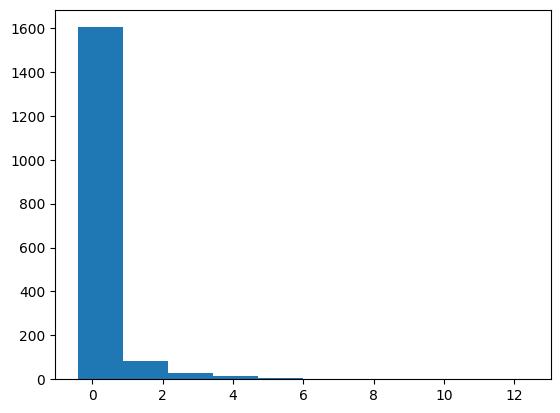

In [181]:
plt.hist(x_train_scaled.iloc[:,2])
plt.show

In [182]:
mean = x_train_scaled.mean(axis = 0)
x_train_scaled -= mean
std = x_train_scaled.std(axis = 0)
x_train_scaled /= std

x_test -= mean
x_test /= std

<function matplotlib.pyplot.show(close=None, block=None)>

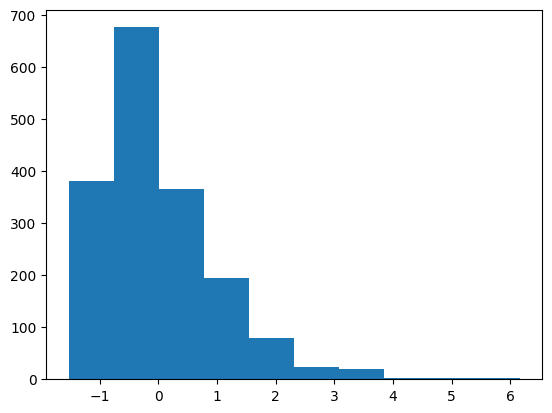

In [183]:
plt.hist(x_train_scaled.iloc[:,7])
plt.show

In [184]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [185]:
model = Sequential()
model.add(Dense(128, input_dim = len(x_train_final.iloc[0, :]), activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 10,849
Trainable params: 10,849
Non-trainable params: 0
_________________________________________________________________
None


In [186]:
model.compile(loss = 'binary_crossentropy', optimizer='rmsprop', metrics = ['accuracy'])

In [187]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

callback_a = ModelCheckpoint(filepath = 'best_model.hdf5', monitor = 'val_loss', save_best_only = True, save_weights_only = True)
callback_b = EarlyStopping(monitor = 'val_loss', patience = 20, verbose = 1)


In [188]:
x_train_final

,SALES_VALUE,AVG_INC_PER_ADULT_IN_K,NUTRITION_PRICE,MOST_EXPENSIVE_PURCHASE,cent_NUTRITION,RECENCY,NUTRI_PER_ADULT,NUTRI_PER_HOUSEHOLD,SINCE_LAST_BOUGHT,%_BOUGHT_VISIT_SIX,%_BOUGHT_VISIT_THREE
0,-0.693970,1.721618,-0.322844,-0.138413,-0.370235,-0.387482,-0.322824,-0.333474,1.125496,-0.494453,-0.440231
1,1.193622,1.347785,-0.073240,-0.035596,-0.333566,-0.326491,-0.043012,-0.159687,-0.541037,-0.189076,-0.440231
2,-0.185959,-0.520367,-0.278053,-0.299687,-0.333566,-0.356986,-0.266862,-0.263960,-1.246968,-0.201712,0.054045
3,-0.292458,-0.539160,0.152217,-0.446861,0.399808,-0.265500,0.236800,0.361674,-1.014636,0.347967,-0.011516
4,0.545659,1.903078,0.360783,2.050399,-0.158371,-0.387482,0.684499,0.917793,-1.220160,-0.335095,-0.226195
...,...,...,...,...,...,...,...,...,...,...,...
1743,-0.409857,0.892720,-0.275550,-0.299981,-0.296897,-0.356986,-0.210900,-0.194445,-1.036976,-0.359666,-0.232623
1744,0.366409,-0.440953,-0.266792,-0.429823,-0.349863,-0.326491,-0.210900,-0.194445,-0.299770,-0.494453,-0.440231
1745,-0.833305,-0.956640,-0.322844,-0.652494,-0.370235,4.446038,-0.322824,-0.333474,1.125496,-0.494453,-0.440231
1746,-0.848601,-0.071566,-0.322844,-0.675995,-0.370235,0.756096,-0.322824,-0.333474,1.125496,-0.494453,-0.440231


In [189]:
history = model.fit(x_train_final, y_train, validation_data=(x_test_final, y_test), epochs = 512, batch_size = 10, callbacks=[callback_a, callback_b])

Epoch 1/512


2023-08-14 00:26:26.881038: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


175/175 [==============================] - 0s 1ms/step - loss: 0.4702 - accuracy: 0.7981 - val_loss: 57.0655 - val_accuracy: 0.6933
Epoch 2/512
175/175 [==============================] - 0s 560us/step - loss: 0.4452 - accuracy: 0.8124 - val_loss: 97.1600 - val_accuracy: 0.6813
Epoch 3/512
175/175 [==============================] - 0s 553us/step - loss: 0.4461 - accuracy: 0.8089 - val_loss: 184.3272 - val_accuracy: 0.5880
Epoch 4/512
175/175 [==============================] - 0s 549us/step - loss: 0.4424 - accuracy: 0.8129 - val_loss: 143.5366 - val_accuracy: 0.6280
Epoch 5/512
175/175 [==============================] - 0s 561us/step - loss: 0.4376 - accuracy: 0.8124 - val_loss: 151.1116 - val_accuracy: 0.6280
Epoch 6/512
175/175 [==============================] - 0s 551us/step - loss: 0.4364 - accuracy: 0.8158 - val_loss: 194.2392 - val_accuracy: 0.6147
Epoch 7/512
175/175 [==============================] - 0s 571us/step - loss: 0.4344 - accuracy: 0.8175 - val_loss: 175.1165 - val_accu

In [190]:
print(history.params)

{'verbose': 1, 'epochs': 512, 'steps': 175}


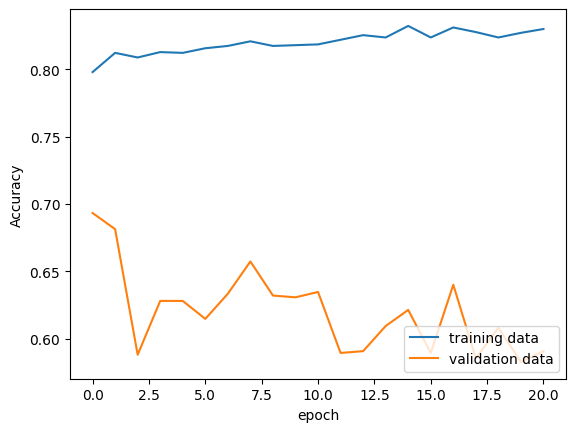

In [191]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc = 'lower right')
plt.show()

In [192]:
model.load_weights('best_model.hdf5')

In [193]:
scores = model.evaluate(x_train_final, y_train)
print(model.metrics_names)
print(scores)

55/55 [==============================] - 0s 474us/step - loss: 0.4402 - accuracy: 0.8129
['loss', 'accuracy']
[0.4401772916316986, 0.8129290342330933]


In [194]:
scores = model.evaluate(x_test_final, y_test)
print(scores)

24/24 [==============================] - 0s 518us/step - loss: 57.0655 - accuracy: 0.6933
[57.0655403137207, 0.6933333277702332]


In [195]:
X = x_train_scaled[['PRICE_PAID', 'COUPON_DISC_pd', 'KID_CATEGORY_DESC',
       'HOMEOWNER_DESC_Homeowner', 'QUANTITY', 'NUTRITION_PRICE', 'DAY_count', 'frequency', 'NUTRI_PER_KID',
       'SINCE_LAST_BOUGHT',  'TOTAL_VISITS_L_THREE']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                     feature       VIF
0                 PRICE_PAID  3.126826
1             COUPON_DISC_pd  1.114516
2          KID_CATEGORY_DESC  1.457301
3   HOMEOWNER_DESC_Homeowner  2.750349
4                   QUANTITY  1.774210
5            NUTRITION_PRICE  1.816565
6                  DAY_count  3.687689
7                  frequency  3.274880
8              NUTRI_PER_KID  1.588109
9          SINCE_LAST_BOUGHT  1.427489
10      TOTAL_VISITS_L_THREE  3.233201


In [196]:
#change frequency name

In [197]:
x_train_xgb = x_train_scaled[['PRICE_PAID', 'COUPON_DISC_pd', 'KID_CATEGORY_DESC',
       'HOMEOWNER_DESC_Homeowner', 'QUANTITY',
       'NUTRITION_PRICE', 'DAY_count', 'frequency', 'NUTRI_PER_KID',
       'SINCE_LAST_BOUGHT', 'TOTAL_VISITS_L_THREE']]
x_test_xgb = x_test[['PRICE_PAID', 'COUPON_DISC_pd', 'KID_CATEGORY_DESC',
       'HOMEOWNER_DESC_Homeowner', 'QUANTITY',
       'NUTRITION_PRICE', 'DAY_count', 'frequency', 'NUTRI_PER_KID',
       'SINCE_LAST_BOUGHT', 'TOTAL_VISITS_L_THREE']]

x_train_xgb.columns = ['PRICE_PAID', 'COUPON_DISC_pd', 'KID_CATEGORY_DESC',
       'HOMEOWNER_DESC_Homeowner', 'QUANTITY',
       'NUTRITION_PRICE', 'DAY_count', 'AVG_TIME_P_VISIT', 'NUTRI_PER_KID',
       'SINCE_LAST_BOUGHT', 'TOTAL_VISITS_L_THREE']
x_test_xgb.columns = [['PRICE_PAID', 'COUPON_DISC_pd', 'KID_CATEGORY_DESC',
       'HOMEOWNER_DESC_Homeowner', 'QUANTITY',
       'NUTRITION_PRICE', 'DAY_count', 'AVG_TIME_P_VISIT', 'NUTRI_PER_KID',
       'SINCE_LAST_BOUGHT', 'TOTAL_VISITS_L_THREE']]
eval_set = [(x_train_xgb, y_train), (x_test_xgb, y_test)]
(y_train==0).sum().sum()

1206

In [198]:
rf_xgb2= xgb.XGBClassifier(objective = 'binary:logistic' ,seed = 31, gamma = 0, learning_rate=  0.01, 
                           n_estimators = 400, scale_pos_weight = 2.333, subsample = 0.8,
                          colsample_bytree=1,reg_alpha=0.03,reg_lambda=0.2, eval_metric= 'logloss')

rf_xgb2.fit(x_train_xgb, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [199]:
# def run_xgb(num):
#     rf_xgb= xgb.XGBClassifier(objective = 'binary:logistic' ,seed = num, gamma = 0, learning_rate=  0.01, 
#                            n_estimators = 400, scale_pos_weight = 2.333, subsample = 0.8,
#                           colsample_bytree=1,reg_alpha=0.03,reg_lambda=0.2, eval_metric= 'logloss')
#     rf_xgb.fit(x_train_xgb, y_train)
#     ypred_xgb2 = rf_xgb2.predict_proba(x_test_xgb)
#     ypred_xgb2 = pd.DataFrame(ypred_xgb2)
#     return ypred_xgb2

In [200]:
# pred = []
# pred = pd.Series(pred)
# for i in range(100):
#     pred = pd.concat([pred, run_xgb(1)], axis = 1)
#     print(i)
# pred

In [201]:
ypred_xgb2 = rf_xgb2.predict(x_test_xgb)
ypred_xgb2 = pd.DataFrame(ypred_xgb2)
ypred_xgb2

,0
0,0
1,1
2,1
3,0
4,0
...,...
745,0
746,0
747,1
748,1


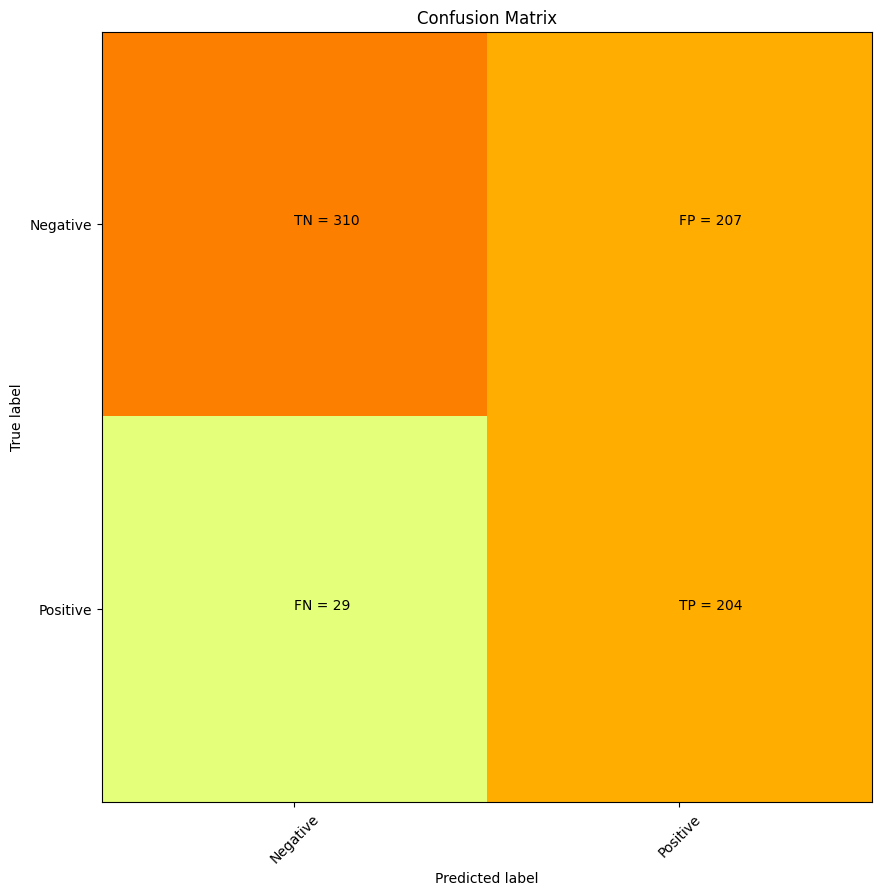

In [202]:
plot_cm(y_test,ypred_xgb2 )

In [203]:
print(classification_report(y_test, ypred_xgb2))

              precision    recall  f1-score   support

         0.0       0.91      0.60      0.72       517
         1.0       0.50      0.88      0.63       233

    accuracy                           0.69       750
   macro avg       0.71      0.74      0.68       750
weighted avg       0.78      0.69      0.70       750



In [204]:
ypred_xgb2_train = rf_xgb2.predict(x_train_xgb)
ypred_xgb2_train = pd.DataFrame(ypred_xgb2_train)
print(classification_report(y_train, ypred_xgb2_train))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95      1206
         1.0       0.91      0.88      0.89       542

    accuracy                           0.94      1748
   macro avg       0.93      0.92      0.92      1748
weighted avg       0.94      0.94      0.94      1748



In [205]:
# print('rf train r oc- auc: {}'.format(roc_auc_score(y_train,ypred_xgb2)))
print('rf test roc-auc: {}'.format(roc_auc_score(y_test,ypred_xgb2)))

rf test roc-auc: 0.7375748167456688


In [206]:
ypred_xgb2_train= rf_xgb2.predict(x_train_xgb)
ypred_xgb2_train = pd.DataFrame(ypred_xgb2_train)
print('rf train roc-auc: {}'.format(roc_auc_score(y_train,ypred_xgb2_train)))

rf train roc-auc: 0.9205509965547416


In [207]:
param_grid = {
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 5, 10],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0],
    
}

In [208]:
# grid_search = GridSearchCV(estimator=rf_xgb2, param_grid=param_grid, scoring='accuracy', cv=5, verbose = 1)
# grid_search.fit(x_train_xgb, y_train)


In [209]:
# print(grid_search.best_params_)

In [210]:
# {'gamma': 0, 'learning_rate': 0.01, 'n_estimators': 400, 'scale_pos_weight': 1, 'subsample': 0.8}
#'colsample_bytree': 0.9, 'max_depth': 3, 'min_child_weight': 10, 'reg_alpha': 1.0, 'reg_lambda': 0}

In [211]:
y_test

,DEPARTMENT_NUTRITION
2288,0.0
751,0.0
1260,0.0
426,1.0
1275,0.0
...,...
1350,0.0
368,0.0
1157,0.0
725,0.0


In [212]:
pred=[]
pred.append(pd.Series(rf_xgb2.predict_proba(x_test_xgb)[:,1]))
pred = pd.concat(pred,axis =1)
# pred.sort_values(by=0,ascending= False, inplace=True)
pred

,0
0,0.384682
1,0.515539
2,0.593704
3,0.215427
4,0.431187
...,...
745,0.393760
746,0.377924
747,0.594820
748,0.605205


In [213]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
thresholds

array([1.7619783 , 0.76197827, 0.7539389 , 0.75258607, 0.7136588 ,
       0.6864262 , 0.62404627, 0.6228408 , 0.62218106, 0.62064296,
       0.61916494, 0.617363  , 0.6157111 , 0.6152572 , 0.61483186,
       0.61430824, 0.6130067 , 0.61243767, 0.612365  , 0.6123208 ,
       0.6119976 , 0.6119942 , 0.61198944, 0.6119385 , 0.6115675 ,
       0.61151266, 0.6111997 , 0.61116385, 0.6105561 , 0.61053854,
       0.60996854, 0.60981923, 0.6086652 , 0.60836995, 0.608135  ,
       0.60764414, 0.6075455 , 0.60749036, 0.6074606 , 0.60745996,
       0.607062  , 0.60681087, 0.606616  , 0.60650885, 0.6058095 ,
       0.6056575 , 0.60545576, 0.6053805 , 0.6053105 , 0.60522354,
       0.6052049 , 0.6050235 , 0.6048175 , 0.6044992 , 0.60432327,
       0.60426486, 0.6042381 , 0.6041366 , 0.60410976, 0.6038521 ,
       0.6037047 , 0.6034368 , 0.60305935, 0.60268545, 0.60267913,
       0.60267204, 0.60233426, 0.6022489 , 0.6020314 , 0.60187435,
       0.6018167 , 0.6016387 , 0.60157853, 0.6015226 , 0.60147

In [214]:
accuracy_ls = []
recall_ls = []
precision_ls = []
f1_ls = []

for thres in thresholds:
    y_pred = np.where(pred>thres,1,0)
    accuracy_ls.append(metrics.accuracy_score(y_test, y_pred, normalize = True))
    recall_ls.append(metrics.recall_score(y_test, y_pred))
    precision_ls.append(metrics.precision_score(y_test, y_pred))
    f1_ls.append(metrics.f1_score(y_test, y_pred))
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls), pd.Series(recall_ls), pd.Series(precision_ls), pd.Series(f1_ls)], axis = 1)
accuracy_ls.columns = ['thresholds', 'accuracy', 'recall', 'precision', 'f1']
accuracy_ls.sort_values(by="accuracy", ascending= False, inplace=True)

accuracy_ls

,thresholds,accuracy,recall,precision,f1
98,0.594757,0.732000,0.596567,0.565041,0.580376
115,0.582676,0.732000,0.703863,0.554054,0.620038
97,0.595196,0.732000,0.592275,0.565574,0.578616
99,0.593717,0.730667,0.596567,0.562753,0.579167
110,0.586116,0.730667,0.682403,0.554007,0.611538
...,...,...,...,...,...
257,0.208526,0.333333,1.000000,0.317872,0.482402
258,0.208259,0.332000,1.000000,0.317439,0.481903
259,0.204914,0.328000,1.000000,0.316147,0.480412
260,0.204466,0.326667,1.000000,0.315718,0.479918


In [215]:
max_pred_xgb = round(pd.DataFrame(np.amax(pred, axis=1), columns = ['pred']),2)
max_pred_xgb.head()

,pred
0,0.38
1,0.52
2,0.59
3,0.22
4,0.43


In [216]:
max_pred_xgb['Decile_rank_glm'] = pd.qcut(max_pred_xgb['pred'].rank(method= 'first'),10 , labels = False)
preds_xgb = pd.concat([max_pred_xgb, y_test.set_index(max_pred_xgb.index)], axis = 1)
preds_xgb.columns = ['pred', 'Decile_rank_glm', 'actual']
preds_xgb

,pred,Decile_rank_glm,actual
0,0.38,1,0.0
1,0.52,4,0.0
2,0.59,6,0.0
3,0.22,0,1.0
4,0.43,4,0.0
...,...,...,...
745,0.39,3,0.0
746,0.38,2,0.0
747,0.59,6,0.0
748,0.61,9,0.0


In [217]:
#rocauc score
#cf matrix
#create the table
max_pred_xgb = round(pd.DataFrame(np.amax(pred, axis=1), columns = ['pred']),2)
max_pred_xgb.head()
max_pred_xgb['Decile_rank_glm'] = pd.qcut(max_pred_xgb['pred'].rank(method= 'first'),10 , labels = False)
preds_xgb = pd.concat([max_pred_xgb, y_test.set_index(max_pred_xgb.index)], axis = 1)
preds_xgb.columns = ['pred', 'Decile_rank_glm', 'actual']
responses_xgb = preds_xgb.groupby('Decile_rank_glm', as_index = False).agg(TOTAL_COUNT = ('pred', 'count'),TOTAL_ACTUAL = ('actual', 'sum'))
responses_xgb["%_ACTUAL_RR"] = (responses_xgb["TOTAL_ACTUAL"]/responses_xgb["TOTAL_COUNT"])*100
responses_xgb["%_ACTUAL_RC"] = (responses_xgb["TOTAL_ACTUAL"]/responses_xgb['TOTAL_ACTUAL'].sum())*100
responses_xgb["CUMILATED_RC"] = responses_xgb['%_ACTUAL_RC'][::-1].cumsum()[::-1]
responses_xgb.to_csv('xgb_deciles.csv')
responses_xgb

,Decile_rank_glm,TOTAL_COUNT,TOTAL_ACTUAL,%_ACTUAL_RR,%_ACTUAL_RC,CUMILATED_RC
0,0,75,1.0,1.333333,0.429185,100.000000
1,1,75,5.0,6.666667,2.145923,99.570815
2,2,75,8.0,10.666667,3.433476,97.424893
3,3,75,11.0,14.666667,4.721030,93.991416
4,4,75,20.0,26.666667,8.583691,89.270386
5,5,75,24.0,32.000000,10.300429,80.686695
6,6,75,38.0,50.666667,16.309013,70.386266
7,7,75,42.0,56.000000,18.025751,54.077253
8,8,75,43.0,57.333333,18.454936,36.051502
9,9,75,41.0,54.666667,17.596567,17.596567


In [218]:
responses_xgb = preds_xgb.groupby('Decile_rank_glm', as_index = False).agg(TOTAL_COUNT = ('pred', 'count'),TOTAL_ACTUAL = ('actual', 'sum'))
responses_xgb["%_ACTUAL_RR"] = (responses_xgb["TOTAL_ACTUAL"]/responses_xgb["TOTAL_COUNT"])*100
responses_xgb["%_ACTUAL_RC"] = (responses_xgb["TOTAL_ACTUAL"]/responses_xgb['TOTAL_ACTUAL'].sum())*100
responses_xgb["CUMILATED_RC"] = responses_xgb['%_ACTUAL_RC'][::-1].cumsum()[::-1]
responses_xgb.to_csv('xgb_deciles.csv')
responses_xgb

,Decile_rank_glm,TOTAL_COUNT,TOTAL_ACTUAL,%_ACTUAL_RR,%_ACTUAL_RC,CUMILATED_RC
0,0,75,1.0,1.333333,0.429185,100.000000
1,1,75,5.0,6.666667,2.145923,99.570815
2,2,75,8.0,10.666667,3.433476,97.424893
3,3,75,11.0,14.666667,4.721030,93.991416
4,4,75,20.0,26.666667,8.583691,89.270386
5,5,75,24.0,32.000000,10.300429,80.686695
6,6,75,38.0,50.666667,16.309013,70.386266
7,7,75,42.0,56.000000,18.025751,54.077253
8,8,75,43.0,57.333333,18.454936,36.051502
9,9,75,41.0,54.666667,17.596567,17.596567


In [219]:
rf_clf2= RandomForestClassifier(oob_score=True, random_state=31, min_samples_split = 75, max_depth = 15)
#, bootstrap= True, class_weight= None, max_depth= 5, max_features= 'sqrt', min_samples_leaf= 10, min_samples_split= 30, n_estimators= 300, oob_score= True)
rf_clf2.fit(x_train_final, y_train)


RandomForestClassifier(max_depth=15, min_samples_split=75, oob_score=True,
                       random_state=31)

In [220]:
# from sklearn.model_selection import RandomizedSearchCV
# param_dist = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [5, 10, 15, None],
#     'min_samples_split': [ 2, 5, 10, 50, 100],
#     'min_samples_leaf': [1, 2, 6, 8],
#     'max_features': ['auto', 'sqrt', 'log2', None],
#     'bootstrap': [True, False]
# }
# rf_clf2= RandomForestClassifier(random_state = 31, oob_score= True)
# random_search = RandomizedSearchCV(
#     rf_clf2,
#     param_distributions=param_dist,
#     n_iter=100,            # Number of random combinations to try
#     scoring='neg_brier_score',   # Use an appropriate metric for your problem
#     cv=5,                 # Number of cross-validation folds
#     random_state=42
# )
# random_search.fit(x_train_final, y_train)
# best_params = random_search.best_params_
# best_model = random_search.best_estimator_

In [221]:
# print(best_model)

In [222]:
y_pred_rf2 = rf_clf2.predict(x_test_final)
y_pred_rf2 = pd.DataFrame(y_pred_rf2)
y_pred_rf2

,0
0,0.0
1,1.0
2,1.0
3,0.0
4,1.0
...,...
745,0.0
746,0.0
747,1.0
748,1.0


In [223]:
print(classification_report(y_test, y_pred_rf2))

              precision    recall  f1-score   support

         0.0       0.92      0.52      0.66       517
         1.0       0.46      0.90      0.60       233

    accuracy                           0.64       750
   macro avg       0.69      0.71      0.63       750
weighted avg       0.77      0.64      0.64       750



In [224]:
y_pred_rf2 = rf_clf2.predict(x_train_final)
y_pred_rf2 = pd.DataFrame(y_pred_rf2)
print(classification_report(y_train, y_pred_rf2))

              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89      1206
         1.0       0.83      0.58      0.68       542

    accuracy                           0.83      1748
   macro avg       0.83      0.76      0.79      1748
weighted avg       0.83      0.83      0.82      1748



In [225]:
pred_rf = []
pred_rf.append(pd.Series(rf_clf2.predict_proba(x_test_final)[:,1]))
pred_rf = pd.concat(pred_rf,axis =1)

In [226]:
rf_train_pred = rf_clf2.predict_proba(x_train_final)
print('rf train r oc- auc: {}'.format(roc_auc_score(y_train,rf_train_pred[:,1])))
rf_test_pred = rf_clf2.predict_proba(x_test_final)
print('rf test roc-auc: {}'.format(roc_auc_score(y_test,rf_test_pred[:,1])))

rf train r oc- auc: 0.9019539449125835
rf test roc-auc: 0.6281742638696342


In [227]:
max_pred_rf = round(pd.DataFrame(np.amax(pred_rf, axis=1), columns = ['pred']),2)
max_pred_rf.head()

,pred
0,0.45
1,0.53
2,0.53
3,0.45
4,0.51


In [228]:
max_pred_rf['Decile_rank_glm'] = pd.qcut(max_pred_rf['pred'].rank(method= 'first'),10 , labels = False)
preds_rf = pd.concat([max_pred_rf, y_test.set_index(max_pred_rf.index)], axis = 1)
preds_rf.columns = ['pred', 'Decile_rank_glm', 'actual']
# preds_rf
max_pred_rf

,pred,Decile_rank_glm
0,0.45,0
1,0.53,7
2,0.53,7
3,0.45,0
4,0.51,4
...,...,...
745,0.45,3
746,0.45,3
747,0.53,9
748,0.53,9


In [229]:
responses_rf = preds_rf.groupby('Decile_rank_glm').agg(TOTAL_COUNT = ('pred', 'count'),TOTAL_ACTUAL = ('actual', 'sum'))
responses_rf["%_ACTUAL_RR"] = (responses_rf["TOTAL_ACTUAL"]/responses_rf["TOTAL_COUNT"])*100
responses_rf["%_ACTUAL_RC"] = (responses_rf["TOTAL_ACTUAL"]/responses_rf['TOTAL_ACTUAL'].sum())*100
responses_rf["CUMILATED_RC"] = responses_rf['%_ACTUAL_RC'][::-1].cumsum()[::-1]
responses_rf.to_csv('rf_deciles.csv')
responses_rf

,TOTAL_COUNT,TOTAL_ACTUAL,%_ACTUAL_RR,%_ACTUAL_RC,CUMILATED_RC
Decile_rank_glm,,,,,
0,75,4.0,5.333333,1.716738,100.000000
1,75,10.0,13.333333,4.291845,98.283262
2,75,7.0,9.333333,3.004292,93.991416
3,75,12.0,16.000000,5.150215,90.987124
4,75,50.0,66.666667,21.459227,85.836910
5,75,41.0,54.666667,17.596567,64.377682
6,75,35.0,46.666667,15.021459,46.781116
7,75,30.0,40.000000,12.875536,31.759657
8,75,23.0,30.666667,9.871245,18.884120


In [230]:
pred_train = rf_xgb2.predict_proba(x_train_xgb)
max_pred = round(pd.DataFrame(np.amax(pred_train, axis=1), columns = ['pred']),2)
max_pred.head()

,pred
0,0.82
1,0.83
2,0.82
3,0.89
4,0.97


In [231]:
max_pred['Decile_rank_glm'] = pd.qcut(max_pred['pred'].rank(method= 'first'),10 , labels = False)
preds = pd.concat([max_pred, y_train.set_index(max_pred.index)], axis = 1)
preds.columns = ['pred', 'Decile_rank_glm', 'actual']
preds

,pred,Decile_rank_glm,actual
0,0.82,4,0.0
1,0.83,5,1.0
2,0.82,4,0.0
3,0.89,6,1.0
4,0.97,9,1.0
...,...,...,...
1743,0.81,4,0.0
1744,0.81,4,0.0
1745,0.95,9,0.0
1746,0.93,8,0.0


In [232]:
responses = preds.groupby('Decile_rank_glm', as_index = False).agg(TOTAL_COUNT = ('pred', 'count'),TOTAL_ACTUAL = ('actual', 'sum'))
responses["%_ACTUAL_RR"] = (responses["TOTAL_ACTUAL"]/responses["TOTAL_COUNT"])*100
responses["%_ACTUAL_RC"] = (responses["TOTAL_ACTUAL"]/responses['TOTAL_ACTUAL'].sum())*100
responses["CUMILATED_RC"] = responses['%_ACTUAL_RC'][::-1].cumsum()[::-1]
responses

,Decile_rank_glm,TOTAL_COUNT,TOTAL_ACTUAL,%_ACTUAL_RR,%_ACTUAL_RC,CUMILATED_RC
0,0,175,69.0,39.428571,12.730627,100.000000
1,1,175,64.0,36.571429,11.808118,87.269373
2,2,175,49.0,28.000000,9.040590,75.461255
3,3,174,32.0,18.390805,5.904059,66.420664
4,4,175,27.0,15.428571,4.981550,60.516605
5,5,175,22.0,12.571429,4.059041,55.535055
6,6,174,29.0,16.666667,5.350554,51.476015
7,7,175,35.0,20.000000,6.457565,46.125461
8,8,175,66.0,37.714286,12.177122,39.667897
9,9,175,149.0,85.142857,27.490775,27.490775


In [233]:
from sklearn.feature_selection import SelectFromModel
xgb_sel = SelectFromModel(xgb.XGBClassifier(objective = 'binary:logistic' ,seed = 31, gamma = 0, learning_rate=  0.01, 
                           n_estimators = 400, scale_pos_weight = 2.333, subsample = 0.8,
                          colsample_bytree=1,reg_alpha=0.03,reg_lambda=0.2, eval_metric= 'logloss'))
xgb_sel.fit(x_train_xgb, y_train)


SelectFromModel(estimator=XGBClassifier(base_score=None, booster=None,
                                        callbacks=None, colsample_bylevel=None,
                                        colsample_bynode=None,
                                        colsample_bytree=1,
                                        early_stopping_rounds=None,
                                        enable_categorical=False,
                                        eval_metric='logloss',
                                        feature_types=None, gamma=0,
                                        gpu_id=None, grow_policy=None,
                                        importance_type=None,
                                        interaction_constraints=None,
                                        learning_rate=0.01, max_bin=None,
                                        max_cat_threshold=None,
                                        max_cat_to_onehot=None,
                                        max_delta_step=None, max_depth=None,
                                        max_leaves=None, min_child_weight=None,
                                        missing=nan, monotone_constraints=None,
                                        n_estimators=400, n_jobs=None,
                                        num_parallel_tree=None, predictor=None,
                                        random_state=None, ...))

In [234]:
feature_scores_xgb = pd.Series(rf_xgb2.feature_importances_, index=x_train_xgb.columns).sort_values(ascending=False)
feature_scores_xgb

NUTRITION_PRICE             0.275445
SINCE_LAST_BOUGHT           0.145553
AVG_TIME_P_VISIT            0.073308
PRICE_PAID                  0.073075
QUANTITY                    0.065861
TOTAL_VISITS_L_THREE        0.065855
HOMEOWNER_DESC_Homeowner    0.065221
DAY_count                   0.061628
NUTRI_PER_KID               0.060459
KID_CATEGORY_DESC           0.059317
COUPON_DISC_pd              0.054277
dtype: float32

In [235]:
x_train_lr = x_train_scaled[['RETAIL_DISC', 'COUPON_DISC', 'SALES_VALUE_pd', 'RETAIL_DISC_pw',
        'NUTRITION_PRICE', 'cent_NUTRITION',
       'NUTRI_PER_HOUSEHOLD', 'SINCE_LAST_BOUGHT',
       '%_BOUGHT_VISIT_TWELVE', 'TOTAL_VISITS_L_THREE']]
x_test_lr = x_test[['RETAIL_DISC', 'COUPON_DISC', 'SALES_VALUE_pd', 'RETAIL_DISC_pw',
        'NUTRITION_PRICE', 'cent_NUTRITION',
       'NUTRI_PER_HOUSEHOLD', 'SINCE_LAST_BOUGHT',
       '%_BOUGHT_VISIT_TWELVE', 'TOTAL_VISITS_L_THREE']]

In [236]:
log_clf2= LogisticRegression(random_state=31)  
log_clf2.fit(x_train_lr, y_train)

LogisticRegression(random_state=31)

In [237]:
y_pred_lr2= log_clf2.predict(x_test_lr)
y_pred_lr2 = pd.DataFrame(y_pred_lr2)
y_pred_lr2

,0
0,0.0
1,1.0
2,1.0
3,0.0
4,1.0
...,...
745,0.0
746,0.0
747,0.0
748,1.0


In [238]:
print(classification_report(y_test, y_pred_lr2))

              precision    recall  f1-score   support

         0.0       0.87      0.75      0.80       517
         1.0       0.57      0.75      0.65       233

    accuracy                           0.75       750
   macro avg       0.72      0.75      0.73       750
weighted avg       0.78      0.75      0.76       750



In [239]:
pred_train_lr1 = log_clf2.predict_proba(x_test_lr)
pred_train_lr1


array([[1.00000000e+000, 4.70269320e-150],
       [2.16270317e-008, 9.99999978e-001],
       [0.00000000e+000, 1.00000000e+000],
       ...,
       [1.00000000e+000, 2.04999551e-026],
       [7.33790806e-012, 1.00000000e+000],
       [1.00000000e+000, 7.69724245e-110]])

In [240]:
max_pred_lr['Decile_rank_glm'] = pd.qcut(max_pred_lr['pred'].rank(method= 'first'),10 , labels = False)
preds_lr = pd.concat([max_pred_lr, y_test.set_index(max_pred_lr.index)], axis = 1)
preds_lr.columns = ['pred', 'Decile_rank_glm', 'actual']
preds_lr

NameError: name 'max_pred_lr' is not defined

In [ ]:
responses = preds.groupby('Decile_rank_glm', as_index = False).agg(TOTAL_COUNT = ('pred', 'count'),TOTAL_ACTUAL = ('actual', 'sum'))
responses["%_ACTUAL_RR"] = (responses["TOTAL_ACTUAL"]/responses["TOTAL_COUNT"])*100
responses["%_ACTUAL_RC"] = (responses["TOTAL_ACTUAL"]/responses['TOTAL_ACTUAL'].sum())*100
responses["CUMILATED_RC"] = responses['%_ACTUAL_RC'][::-1].cumsum()[::-1]
responses

In [ ]:
['SALES_VALUE', 'PRICE_PAID', 'TOTAL_SHELF_PRICE', 'PRICE_PAID_pd',
       'cent_SAVED', 'QUANTITY', 'DEPARTMENT_NUTRITION', 'NUTRITION_PRICE',
       'NUTRI_PER_HOUSEHOLD', 'NUTRI_PER_ADULT', 'SINCE_LAST_BOUGHT',
       '%_BOUGHT_VISIT_TWELVE']

In [241]:
X = x_train_scaled[['PRICE_PAID', 'PRICE_PAID_pd',
       'cent_SAVED', 'QUANTITY','NUTRI_PER_ADULT', 'NUTRITION_PRICE',
       'NUTRI_PER_HOUSEHOLD', 'SINCE_LAST_BOUGHT',
       '%_BOUGHT_VISIT_TWELVE']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                 feature       VIF
0             PRICE_PAID  2.701987
1          PRICE_PAID_pd  1.390035
2             cent_SAVED  1.052757
3               QUANTITY  1.802658
4        NUTRI_PER_ADULT  9.143620
5        NUTRITION_PRICE  6.509458
6    NUTRI_PER_HOUSEHOLD  7.093213
7      SINCE_LAST_BOUGHT  1.786995
8  %_BOUGHT_VISIT_TWELVE  2.678902


In [242]:
#validation dataset
#reduce overfitting/ check hyperparameters
#use bigger model

In [287]:

data_features1 = x.drop(['SALES_VALUE_pw','DAY_nb','RETAIL_DISC_pw',
                             'TOTAL_VISITS_L_TWELVE',
                             'SALES_VALUE_pd',
                             'RETAIL_DISC_pd',
                             'COUPON_DISC_pd','AVG_INC_K','HOMEOWNER_DESC_Homeowner',
                             'TOTAL_VISITS_L_SIX','AVG_AGE','RETAIL_DISC',
                             'TOTAL_WEEK_VISITED','%_BOUGHT_VISIT_TOTAL'],axis=1)
 
X_train, X_test, y_train, y_test = train_test_split(data_features1, y,
                                                    stratify=y,
                                                    test_size=0.30)
X_train.head()
 

,SALES_VALUE,COUPON_DISC,PRICE_PAID,TOTAL_SHELF_PRICE,PRICE_PAID_pd,Use_coupon,nb_coupon,cent_SAVED,MARITAL_STATUS_CODE,HH_COMP_DESC,...,RECENCY,NUTRI_PER_HOUSEHOLD,NUTRI_PER_ADULT,NUTRI_PER_KID,SINCE_LAST_BOUGHT,TOTAL_VISITS,%_BOUGHT_VISIT_TWELVE,%_BOUGHT_VISIT_SIX,%_BOUGHT_VISIT_THREE,TOTAL_VISITS_L_THREE
1353,1610.45,5.50,1604.95,1931.50,29.18,1,6.0,16.91,1.0,0.0,...,1,1.5,1.5,0.0,156.0,55,4.17,4.17,0.0,14.0
2139,3889.10,18.99,3870.11,4443.02,60.47,1,4.0,12.89,1.0,0.0,...,0,0.0,0.0,0.0,544.0,64,0.00,0.00,0.0,10.0
1538,45.69,0.00,45.69,51.32,11.42,0,0.0,10.97,2.0,2.0,...,3,1.0,0.5,-1.0,153.0,4,33.33,33.33,0.0,1.0
1091,587.16,0.65,586.51,709.10,21.72,1,1.0,17.29,1.0,0.0,...,7,0.0,0.0,0.0,544.0,27,0.00,0.00,0.0,3.0
24,2302.96,29.88,2273.08,2741.91,36.66,1,5.0,17.10,0.0,0.0,...,1,1.0,1.0,0.0,113.0,62,2.33,3.45,0.0,13.0


In [291]:
# params = {'max_depth': [3, 5, 7],
#           'learning_rate': [0.1, 0.01, 0.001],
#           'subsample': [0.7, 0.8, 0.9],
#           'colsample_bytree': [0.7, 0.8, 0.9]}
# 'colsample_bytree': 0.7,
#  'learning_rate': 0.01,
#  'max_depth': 3,
#  'subsample': 0.7}
params = {'reg_alpha':[0, 0.3, 0.65, 1],'reg_lambda':[0,0.2,0.4,0.6,0.8,1]}
xgb_model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, random_state=42, colsample_bytree= 0.75,
 learning_rate= 0.01,
 max_depth=3,
 subsample= 0.7, scale_pos_weight = 2.33)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, scoring='roc_auc', n_jobs=-1, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_params

{'reg_alpha': 0.3, 'reg_lambda': 0}

0.8
0.6781115879828327
0.6781115879828327
0.7665219448618225
0.8243707093821511
0.7638376383763837
0.6981450252951096
0.8077065472147259


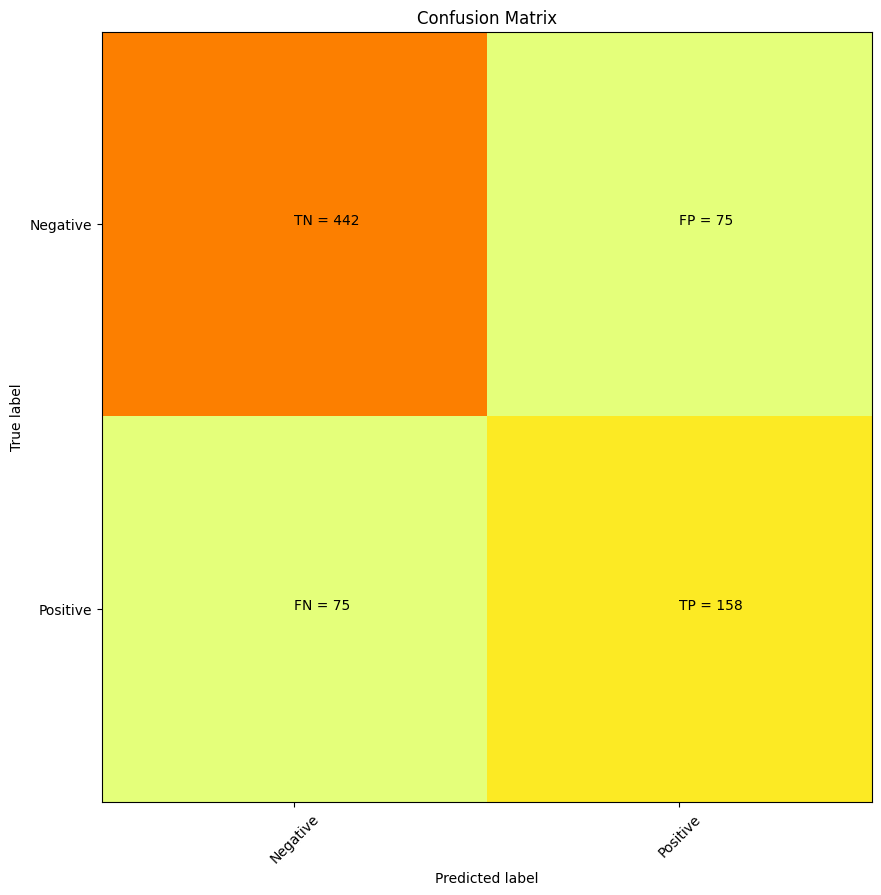

In [313]:
from sklearn.metrics import accuracy_score,recall_score, precision_score,roc_auc_score
##creating_model
 
learn = xgb.XGBClassifier(colsample_bytree= 0.75,
 learning_rate= 0.01,
 max_depth=3, n_estimators = 350,
 subsample= 0.7, scale_pos_weight = 2.33,reg_alpha = 0.2,  seed=1712)
learn.fit(X_train, y_train)
 
##prediction on test
pred = learn.predict(X_test)
sci_pred = [round(value) for value in pred]
pred_proba = learn.predict_proba(X_test)
pred_proba = pd.DataFrame(pred_proba[:,1])
 
print(accuracy_score(y_test,pred))
print(recall_score(y_test,pred))
print(precision_score(y_test,pred))
print(roc_auc_score(y_test,pred))
 
##prediction on train
pred_tr = learn.predict(X_train)
sci_pred_tr = [round(value) for value in pred_tr]
pred_proba_tr = learn.predict_proba(X_train)
pred_proba_tr = pd.DataFrame(pred_proba_tr[:,1])
 
 
print(accuracy_score(y_train,pred_tr))
print(recall_score(y_train,pred_tr))
print(precision_score(y_train,pred_tr))
print(roc_auc_score(y_train,pred_tr))
plot_cm(y_test,pred) 

In [314]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85       517
         1.0       0.68      0.68      0.68       233

    accuracy                           0.80       750
   macro avg       0.77      0.77      0.77       750
weighted avg       0.80      0.80      0.80       750



In [322]:
print(classification_report(y_train, pred_tr))

              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87      1206
         1.0       0.70      0.76      0.73       542

    accuracy                           0.82      1748
   macro avg       0.79      0.81      0.80      1748
weighted avg       0.83      0.82      0.83      1748



In [315]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
f1_reca_prec = {}
xg_pred_prob = pd.DataFrame(pred_proba[0])
for i in range(45,55,1):
    j = i/100
    y_pred2 = np.where(xg_pred_prob > j, 1,0)
    f1_reca_prec[j] = [f1_score
                       (y_test, y_pred2),recall_score(y_test, y_pred2),precision_score(y_test, y_pred2),accuracy_score(y_test, y_pred2)]
 
x_test = pd.DataFrame(f1_reca_prec,index=['f1_score','recall_score','Precison_Score','accuracy_score'])

In [316]:
##Feature importance of variables
feature_important = learn.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())
 
f_imp = pd.DataFrame(data=values, index=keys, columns=["Gains"]).sort_values(by = "Gains", ascending=False)
f_imp["%imp"] = (f_imp["Gains"]/f_imp["Gains"].sum())*100
 
f_imp

,Gains,%imp
NUTRITION_PRICE,86.683601,14.997078
NUTRI_PER_ADULT,71.576218,12.383358
DEPARTMENT_NUTRITION,46.716999,8.082480
SINCE_LAST_BOUGHT,29.498272,5.103478
NUTRI_PER_HOUSEHOLD,26.563154,4.595675
%_BOUGHT_VISIT_TWELVE,20.269274,3.506775
%_BOUGHT_VISIT_THREE,18.803432,3.253171
RECENCY,15.332148,2.652606
PRICE_PAID,12.170963,2.105691
TOTAL_VISITS_L_THREE,10.870249,1.880655


In [317]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
 
df_vif = x.drop(['SALES_VALUE_pw','DAY_nb','RETAIL_DISC_pw',
                             'TOTAL_VISITS_L_TWELVE',
                             'SALES_VALUE_pd',
                             'RETAIL_DISC_pd',
                             'COUPON_DISC_pd','AVG_INC_K','HOMEOWNER_DESC_Homeowner',
                             'TOTAL_VISITS_L_SIX','AVG_AGE','RETAIL_DISC',
                             'TOTAL_WEEK_VISITED','%_BOUGHT_VISIT_TOTAL'],axis=1)
df_vif.fillna(18, inplace = True)
#df_vif = pd.get_dummies(df_vif,columns = list(for_vif[for_vif['cats']==1]['Original']),dummy_na=False,drop_first=False )
 
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_vif.columns
 
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i)
                          for i in range(len(df_vif.columns))]
 
vif_data

,feature,VIF
0,SALES_VALUE,inf
1,COUPON_DISC,inf
2,PRICE_PAID,inf
3,TOTAL_SHELF_PRICE,723.461540
4,PRICE_PAID_pd,29.340458
5,Use_coupon,5.235485
6,nb_coupon,9.191994
7,cent_SAVED,14.657821
8,MARITAL_STATUS_CODE,6.684105
9,HH_COMP_DESC,3.244227


In [318]:
oot_y = pd.read_csv('oot_y.csv')
oot_x = pd.read_csv('oot_x.csv')
oot_x

,Unnamed: 0,SALES_VALUE,RETAIL_DISC,COUPON_DISC,PRICE_PAID,DAY_nb,TOTAL_SHELF_PRICE,SALES_VALUE_pd,PRICE_PAID_pd,RETAIL_DISC_pd,...,NUTRI_PER_KID,SINCE_LAST_BOUGHT,%_BOUGHT_VISIT_TOTAL,TOTAL_VISITS,%_BOUGHT_VISIT_TWELVE,TOTAL_VISITS_L_TWELVE,%_BOUGHT_VISIT_SIX,TOTAL_VISITS_L_SIX,%_BOUGHT_VISIT_THREE,TOTAL_VISITS_L_THREE
0,0,3582.15,597.21,72.27,3509.88,66,4251.63,54.28,53.18,9.05,...,0.0,47.0,19.70,66,24.07,54.0,34.29,35.0,24.00,25.0
1,1,1823.45,318.96,9.00,1814.45,44,2151.41,41.44,41.24,7.25,...,0.0,150.0,6.82,44,3.45,29.0,6.25,16.0,7.69,13.0
2,2,2554.98,650.88,61.19,2493.79,43,3267.05,59.42,58.00,15.14,...,0.0,544.0,0.00,43,0.00,32.0,0.00,15.0,0.00,7.0
3,3,1200.11,115.65,2.50,1197.61,30,1318.26,40.00,39.92,3.86,...,0.0,274.0,3.33,30,3.85,26.0,0.00,8.0,0.00,6.0
4,4,749.09,118.33,0.00,749.09,31,867.42,24.16,24.16,3.82,...,0.0,39.0,6.45,31,9.52,21.0,15.38,13.0,25.00,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2486,2486,4010.90,1028.30,48.75,3962.15,45,5087.95,89.13,88.05,22.85,...,3.0,257.0,4.44,45,5.13,39.0,3.85,26.0,0.00,16.0
2487,2487,5993.82,1179.68,16.84,5976.98,169,7190.34,35.47,35.37,6.98,...,0.0,544.0,0.00,169,0.00,133.0,0.00,78.0,0.00,48.0
2488,2488,2381.57,255.61,0.00,2381.57,126,2637.18,18.90,18.90,2.03,...,0.0,40.0,6.35,126,6.61,121.0,8.57,70.0,12.50,40.0
2489,2489,2755.03,377.83,0.00,2755.03,74,3132.86,37.23,37.23,5.11,...,4.0,57.0,5.41,74,7.02,57.0,11.11,36.0,7.41,27.0


In [319]:
dx = oot_x.drop(['Unnamed: 0','SALES_VALUE_pw','DAY_nb','RETAIL_DISC_pw',
                             'TOTAL_VISITS_L_TWELVE',
                             'SALES_VALUE_pd',
                             'RETAIL_DISC_pd',
                             'COUPON_DISC_pd','AVG_INC_K','HOMEOWNER_DESC_Homeowner',
                             'TOTAL_VISITS_L_SIX','AVG_AGE','RETAIL_DISC',
                             'TOTAL_WEEK_VISITED','%_BOUGHT_VISIT_TOTAL'],axis=1)
dy = oot_y.drop('Unnamed: 0', axis = 1)

In [320]:
dy_pred = learn.predict(dx)
dy_pred

array([1, 0, 0, ..., 1, 1, 1])

In [321]:
print(accuracy_score(dy,dy_pred))
print(recall_score(dy,dy_pred))
print(precision_score(dy,dy_pred))
print(roc_auc_score(dy,dy_pred))

0.7727820152549177
0.7206068268015171
0.6229508196721312
0.7588328251654645


In [1]:
dy.sum()/len(dy)

NameError: name 'dy' is not defined